<a href="https://colab.research.google.com/github/jamessutton600613-png/GC/blob/main/Untitled277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                         # 01
from pathlib import Path                                   # 02
import gemmi                                               # 03

# ----- INPUT -----                                        # 05
CIF_PATH = Path("1540950.cif")                             # 06
NPZ_OUT  = Path("YBCO_1540950_topology.npz")               # 07

# ----- LOAD STRUCTURE -----                               # 09
st = gemmi.read_structure(str(CIF_PATH))                   # 10
st.cell.set_cell_images(1, 1, 1)                           # 11
model = st[0]                                              # 12

cell = st.cell                                             # 14
a, b, c = cell.a, cell.b, cell.c                           # 15
alpha, beta, gamma = cell.alpha, cell.beta, cell.gamma     # 16
print(f"Cell: a={a:.4f}, b={b:.4f}, c={c:.4f}, "            # 17
      f"alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}")  # 18

# ----- EXTRACT ATOMS & CARTESIAN POSITIONS -----           # 20
species = []                                               # 21
frac_positions = []                                        # 22

for chain in model:                                        # 23
    for residue in chain:                                  # 24
        for atom in residue:                               # 25
            el = atom.element.name                         # 26
            species.append(el)                             # 27
            frac_positions.append(atom.frac)               # 28

species = np.array(species, dtype=object)                  # 31

# convert fractional → Cartesian                           # 33
cart_positions = np.zeros((len(frac_positions), 3), float) # 34
for i, fpos in enumerate(frac_positions):                  # 35
    xyz = cell.orthogonalize(fpos)                         # 36
    cart_positions[i, :] = [xyz.x, xyz.y, xyz.z]           # 37

print(f"Found {len(species)} atoms in the unit cell.")     # 38

# ----- NEIGHBOUR GRAPH (distance cutoff) -----             # 40
cutoff = 3.0                                               # 41
N = len(species)                                           # 42
distances = np.zeros((N, N), float)                        # 43
adjacency = np.zeros((N, N), int)                          # 44

for i in range(N):                                         # 46
    for j in range(i + 1, N):                              # 47
        d = np.linalg.norm(cart_positions[i] - cart_positions[j]) # 48
        distances[i, j] = distances[j, i] = d              # 49
        if d <= cutoff:                                    # 50
            adjacency[i, j] = adjacency[j, i] = 1          # 51

print(f"Average coordination (cutoff {cutoff} Å): "        # 53
      f"{adjacency.sum(axis=1).mean():.2f}")               # 54

# ----- SAVE AS NPZ -----                                   # 56
np.savez(                                                   # 57
    NPZ_OUT,                                                # 58
    species=species,                                        # 59
    positions=cart_positions,                               # 60
    distances=distances,                                    # 61
    adjacency=adjacency,                                    # 62
    cell_params=np.array([a, b, c, alpha, beta, gamma])     # 63
)                                                           # 64

print(f"Saved topology NPZ to: {NPZ_OUT.resolve()}")        # 66

AttributeError: 'gemmi.UnitCell' object has no attribute 'set_cell_images'

In [ ]:
import numpy as np                                         # 01
from pathlib import Path                                   # 02
import gemmi                                               # 03

# ----- INPUT -----                                        # 05
CIF_PATH = Path("1540950.cif")                             # 06
NPZ_OUT  = Path("YBCO_1540950_topology.npz")               # 07

# ----- LOAD STRUCTURE -----                               # 09
st = gemmi.read_structure(str(CIF_PATH))                   # 10
# st.grid images not needed here; gemmi auto-handles symmetry in structure # 11
model = st[0]                                              # 12

cell = st.cell                                             # 14
a, b, c = cell.a, cell.b, cell.c                           # 15
alpha, beta, gamma = cell.alpha, cell.beta, cell.gamma     # 16
print(f"Cell: a={a:.4f}, b={b:.4f}, c={c:.4f}, "            # 17
      f"alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}")  # 18

# ----- EXTRACT ATOMS & CARTESIAN POSITIONS -----           # 20
species = []                                               # 21
frac_positions = []                                        # 22

for chain in model:                                        # 23
    for residue in chain:                                  # 24
        for atom in residue:                               # 25
            el = atom.element.name                         # 26
            species.append(el)                             # 27
            frac_positions.append(atom.frac)               # 28

species = np.array(species, dtype=object)                  # 31

# convert fractional → Cartesian                           # 33
cart_positions = np.zeros((len(frac_positions), 3), float) # 34
for i, fpos in enumerate(frac_positions):                  # 35
    xyz = cell.orthogonalize(fpos)                         # 36
    cart_positions[i, :] = [xyz.x, xyz.y, xyz.z]           # 37

print(f"Found {len(species)} atoms in the unit cell.")     # 38

# ----- NEIGHBOUR GRAPH (distance cutoff) -----             # 40
cutoff = 3.0                                               # 41
N = len(species)                                           # 42
distances = np.zeros((N, N), float)                        # 43
adjacency = np.zeros((N, N), int)                          # 44

for i in range(N):                                         # 46
    for j in range(i + 1, N):                              # 47
        d = np.linalg.norm(cart_positions[i] - cart_positions[j]) # 48
        distances[i, j] = distances[j, i] = d              # 49
        if d <= cutoff:                                    # 50
            adjacency[i, j] = adjacency[j, i] = 1          # 51

print(f"Average coordination (cutoff {cutoff} Å): "        # 53
      f"{adjacency.sum(axis=1).mean():.2f}")               # 54

# ----- SAVE AS NPZ -----                                   # 56
np.savez(                                                   # 57
    NPZ_OUT,                                                # 58
    species=species,                                        # 59
    positions=cart_positions,                               # 60
    distances=distances,                                    # 61
    adjacency=adjacency,                                    # 62
    cell_params=np.array([a, b, c, alpha, beta, gamma])     # 63
)                                                           # 64

print(f"Saved topology NPZ to: {NPZ_OUT.resolve()}")        # 66

IndexError: 

In [ ]:
import numpy as np                                         # 01
from pathlib import Path                                   # 02
import gemmi                                               # 03

# ----- INPUT -----                                        # 05
CIF_PATH = Path("1540950.cif")                             # 06
NPZ_OUT  = Path("YBCO_1540950_topology.npz")               # 07

# ----- LOAD CIF & BUILD STRUCTURE -----                    # 09
cif_doc = gemmi.cif.read_file(str(CIF_PATH))               # 10
block = cif_doc.sole_block()                               # 11
st = gemmi.make_structure_from_block(block)                # 12
model = st[0]                                              # 13

cell = st.cell                                             # 15
a, b, c = cell.a, cell.b, cell.c                           # 16
alpha, beta, gamma = cell.alpha, cell.beta, cell.gamma     # 17
print(f"Cell: a={a:.4f}, b={b:.4f}, c={c:.4f}, "            # 18
      f"alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}")  # 19

# ----- EXTRACT ATOMS & CARTESIAN POSITIONS -----           # 21
species = []                                               # 22
frac_positions = []                                        # 23

for chain in model:                                        # 24
    for residue in chain:                                  # 25
        for atom in residue:                               # 26
            el = atom.element.name                         # 27
            species.append(el)                             # 28
            frac_positions.append(atom.frac)               # 29

species = np.array(species, dtype=object)                  # 32

# convert fractional → Cartesian                           # 34
cart_positions = np.zeros((len(frac_positions), 3), float) # 35
for i, fpos in enumerate(frac_positions):                  # 36
    xyz = cell.orthogonalize(fpos)                         # 37
    cart_positions[i, :] = [xyz.x, xyz.y, xyz.z]           # 38

print(f"Found {len(species)} atoms in the unit cell.")     # 40

# ----- NEIGHBOUR GRAPH (distance cutoff) -----             # 42
cutoff = 3.0                                               # 43
N = len(species)                                           # 44
distances = np.zeros((N, N), float)                        # 45
adjacency = np.zeros((N, N), int)                          # 46

for i in range(N):                                         # 48
    for j in range(i + 1, N):                              # 49
        d = np.linalg.norm(cart_positions[i] - cart_positions[j]) # 50
        distances[i, j] = distances[j, i] = d              # 51
        if d <= cutoff:                                    # 52
            adjacency[i, j] = adjacency[j, i] = 1          # 53

print(f"Average coordination (cutoff {cutoff} Å): "        # 55
      f"{adjacency.sum(axis=1).mean():.2f}")               # 56

# ----- SAVE AS NPZ -----                                   # 58
np.savez(                                                   # 59
    NPZ_OUT,                                                # 60
    species=species,                                        # 61
    positions=cart_positions,                               # 62
    distances=distances,                                    # 63
    adjacency=adjacency,                                    # 64
    cell_params=np.array([a, b, c, alpha, beta, gamma])     # 65
)                                                           # 66

print(f"Saved topology NPZ to: {NPZ_OUT.resolve()}")        # 68

IndexError: 

In [ ]:
import numpy as np                                         # 01
from pathlib import Path                                   # 02
import gemmi                                               # 03

# ----- INPUT -----                                        # 05
CIF_PATH = Path("1540179.cif")                             # 06
NPZ_OUT  = Path("YBCO_1540179_topology.npz")               # 07

# ----- LOAD SMALL STRUCTURE -----                          # 09
small = gemmi.read_small_structure(str(CIF_PATH))          # 10
cell = small.cell                                          # 11

a, b, c = cell.a, cell.b, cell.c                           # 12
alpha, beta, gamma = cell.alpha, cell.beta, cell.gamma     # 13
print(f"Cell: a={a:.4f}, b={b:.4f}, c={c:.4f}, "            # 14
      f"alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}")  # 15

# ----- EXTRACT ATOMS & CARTESIAN POSITIONS -----

species = []                                               # 18
cart_positions = []                                        # 19

for site in small.sites:                                   # 20
    el = site.type_symbol                                  # 21
    species.append(el)                                     # 22

    # Try fractional → Cartesian first                     # 23
    try:                                                   # 24
        fpos = site.frac                                   # 25
        xyz = cell.orthogonalize(fpos)                     # 26
    except AttributeError:                                 # 27
        try:                                               # 28
            fpos = site.fract                              # 29
            xyz = cell.orthogonalize(fpos)                 # 30
        except AttributeError:                             # 31
            # Fall back to any Cartesian position attr     # 32
            try:                                           # 33
                xyz = site.pos                             # 34
            except AttributeError:                         # 35
                xyz = site.orth                            # 36

    cart_positions.append([xyz.x, xyz.y, xyz.z])           # 37

species = np.array(species, dtype=object)                  # 39
cart_positions = np.array(cart_positions, dtype=float)     # 40

print(f"Found {len(species)} sites in the unit cell.")     # 42

# ----- NEIGHBOUR GRAPH (distance cutoff) -----             # 36
cutoff = 3.0                                               # 37
N = len(species)                                           # 38
distances = np.zeros((N, N), float)                        # 39
adjacency = np.zeros((N, N), int)                          # 40

for i in range(N):                                         # 42
    for j in range(i + 1, N):                              # 43
        d = np.linalg.norm(cart_positions[i] - cart_positions[j]) # 44
        distances[i, j] = distances[j, i] = d              # 45
        if d <= cutoff:                                    # 46
            adjacency[i, j] = adjacency[j, i] = 1          # 47

print(f"Average coordination (cutoff {cutoff} Å): "        # 49
      f"{adjacency.sum(axis=1).mean():.2f}")               # 50

# ----- SAVE AS NPZ -----                                   # 52
np.savez(                                                   # 53
    NPZ_OUT,                                                # 54
    species=species,                                        # 55
    positions=cart_positions,                               # 56
    distances=distances,                                    # 57
    adjacency=adjacency,                                    # 58
    cell_params=np.array([a, b, c, alpha, beta, gamma])     # 59
)                                                           # 60

print(f"Saved topology NPZ to: {NPZ_OUT.resolve()}")        # 62

Cell: a=3.8415, b=3.8778, c=11.7470, alpha=90.00, beta=90.00, gamma=90.00
Found 9 sites in the unit cell.
Average coordination (cutoff 3.0 Å): 3.78
Saved topology NPZ to: /content/YBCO_1540179_topology.npz


In [ ]:
import numpy as np                                         # 01
from pathlib import Path                                   # 02

NPZ_IN   = Path("YBCO_1540950_topology.npz")               # 04
NPZ_OUT  = Path("YBCO_1540950_euler.npz")                  # 05

data = np.load(NPZ_IN, allow_pickle=True)                  # 07
species    = data["species"]                               # 08
positions  = data["positions"]                             # 09
adjacency  = data["adjacency"]                             # 10
cell_params = data["cell_params"]                          # 11

N = adjacency.shape[0]                                     # 13
print(f"Loaded graph with {N} sites.")                     # 14

# ----- DEGREE MATRIX & LAPLACIAN -----                    # 16
degrees = adjacency.sum(axis=1)                            # 17
D = np.diag(degrees)                                       # 18
L = D - adjacency                                          # 19

print("Degree vector:", degrees)                           # 21
print("Laplacian shape:", L.shape)                         # 22

# ----- EIGENSYSTEM OF LAPLACIAN -----                     # 24
# For small N=9 we can diagonalise exactly                 # 25
evals, evecs = np.linalg.eigh(L)                           # 26

# Sort eigenvalues/eigenvectors ascending                  # 28
idx = np.argsort(evals)                                    # 29
evals = evals[idx]                                         # 30
evecs = evecs[:, idx]                                      # 31

print("Eigenvalues (Laplacian):")                          # 33
print(evals)                                               # 34

# ----- CHOOSE SOME "FLOW MODES" -----                     # 36
# Mode 0 (eval ~ 0) is uniform; skip it for flows          # 37
# Take next few non-trivial modes as proto Euler channels  # 38
k_modes = min(4, N - 1)                                    # 39
flow_evals = evals[1 : 1 + k_modes]                        # 40
flow_evecs = evecs[:, 1 : 1 + k_modes]                     # 41

print(f"Using {k_modes} non-trivial Laplacian modes "      # 43
      "as candidate flow/curvature patterns.")             # 44

# ----- SIMPLE "CURVATURE" SCALAR PER NODE -----           # 46
# Here: use Laplacian applied to degree-normalised vector  # 47
deg_safe = np.where(degrees > 0, degrees, 1)               # 48
norm_deg = degrees / deg_safe.max()                        # 49
curvature = L @ norm_deg                                   # 50

print("Curvature-like scalar per site:")                   # 52
print(curvature)                                           # 53

# ----- SAVE ENHANCED NPZ -----                            # 55
np.savez(                                                   # 56
    NPZ_OUT,                                                # 57
    species=species,                                        # 58
    positions=positions,                                    # 59
    adjacency=adjacency,                                    # 60
    cell_params=cell_params,                                # 61
    laplacian=L,                                            # 62
    degrees=degrees,                                        # 63
    evals=evals,                                            # 64
    evecs=evecs,                                            # 65
    flow_evals=flow_evals,                                  # 66
    flow_evecs=flow_evecs,                                  # 67
    curvature=curvature                                     # 68
)                                                           # 69

print(f"Saved Euler/Laplacian data to: {NPZ_OUT.resolve()}")# 71

Loaded graph with 9 sites.
Degree vector: [5 4 3 2 3 4 5 4 4]
Laplacian shape: (9, 9)
Eigenvalues (Laplacian):
[-1.55472162e-15  8.56739031e-01  2.42964987e+00  3.63603221e+00
  4.43602195e+00  5.00000000e+00  5.00000000e+00  5.79196004e+00
  6.84959689e+00]
Using 4 non-trivial Laplacian modes as candidate flow/curvature patterns.
Curvature-like scalar per site:
[ 0.8 -0.2 -0.8 -0.8 -0.8  0.4  1.2 -0.2  0.4]
Saved Euler/Laplacian data to: /content/YBCO_1540950_euler.npz


In [ ]:
import numpy as np                                         # 01

data = np.load("YBCO_1540950_euler.npz", allow_pickle=True)  # 02
species = data["species"]                                  # 03
curvature = data["curvature"]                              # 04

for i, (el, curv) in enumerate(zip(species, curvature)):   # 05
    print(f"{i}: {el:>2}  curvature = {curv:+.3f}")        # 06

0: Ba+2  curvature = +0.800
1: O-2  curvature = -0.200
2: Cu+2  curvature = -0.800
3: Y+3  curvature = -0.800
4: Cu+2  curvature = -0.800
5: O-2  curvature = +0.400
6: O-2  curvature = +1.200
7: O-2  curvature = -0.200
8: O-2  curvature = +0.400


9 sites


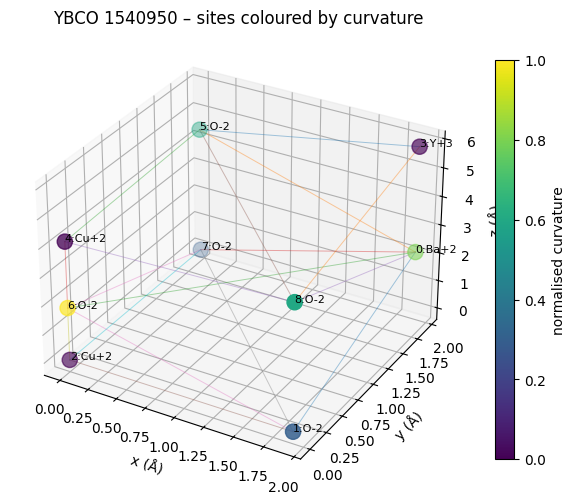

In [ ]:
import numpy as np                                         # 01
from pathlib import Path                                   # 02
import matplotlib.pyplot as plt                            # 03
from mpl_toolkits.mplot3d import Axes3D                    # 04  # noqa: F401

NPZ_IN = Path("YBCO_1540950_euler.npz")                    # 06
data = np.load(NPZ_IN, allow_pickle=True)                  # 07

species   = data["species"]                                # 08
pos       = data["positions"]                              # 09
adjacency = data["adjacency"]                              # 10
curv      = data["curvature"]                              # 11

N = len(species)                                           # 13
print(f"{N} sites")                                        # 14

# ----- NORMALISE CURVATURE FOR COLOUR MAP -----           # 16
c_min, c_max = curv.min(), curv.max()                      # 17
if c_max > c_min:                                          # 18
    c_norm = (curv - c_min) / (c_max - c_min)              # 19
else:                                                      # 20
    c_norm = np.zeros_like(curv)                           # 21

# ----- 3D PLOT -----                                      # 23
fig = plt.figure(figsize=(6, 6))                           # 24
ax = fig.add_subplot(111, projection='3d')                 # 25

# scatter atoms coloured by curvature                      # 27
sc = ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2],           # 28
                c=c_norm, s=120, cmap="viridis")           # 29

# draw edges for adjacency                                 # 31
for i in range(N):                                         # 32
    for j in range(i + 1, N):                              # 33
        if adjacency[i, j]:                                # 34
            xs = [pos[i, 0], pos[j, 0]]                    # 35
            ys = [pos[i, 1], pos[j, 1]]                    # 36
            zs = [pos[i, 2], pos[j, 2]]                    # 37
            ax.plot(xs, ys, zs, linewidth=0.7, alpha=0.4)  # 38

# labels (index + species)                                 # 40
for i in range(N):                                         # 41
    ax.text(pos[i, 0], pos[i, 1], pos[i, 2],               # 42
            f"{i}:{species[i]}",                           # 43
            fontsize=8)                                    # 44

ax.set_xlabel("x (Å)")                                     # 46
ax.set_ylabel("y (Å)")                                     # 47
ax.set_zlabel("z (Å)")                                     # 48
ax.set_title("YBCO 1540950 – sites coloured by curvature") # 49

cbar = fig.colorbar(sc, ax=ax, shrink=0.7)                 # 51
cbar.set_label("normalised curvature")                     # 52

plt.tight_layout()                                         # 54
plt.show()                                                 # 55

TDSE on graph with 9 sites.
Eigenvalues of H:
[-4.02136798e+00 -2.54430833e+00 -3.36010042e-01 -2.03429388e-16
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.38932126e+00
  2.51236509e+00]
Initial excitation at site 2 (Cu+2).


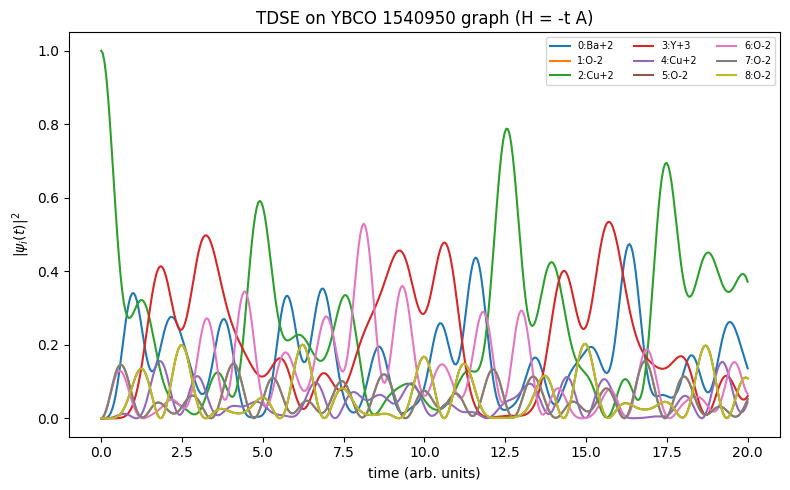

Probabilities at t = 20.00:
  site  0 (Ba+2): 0.136
  site  1 ( O-2): 0.052
  site  2 (Cu+2): 0.372
  site  3 ( Y+3): 0.061
  site  4 (Cu+2): 0.044
  site  5 ( O-2): 0.109
  site  6 ( O-2): 0.066
  site  7 ( O-2): 0.052
  site  8 ( O-2): 0.109


In [ ]:
import numpy as np                                         # 01
import matplotlib.pyplot as plt                            # 02
from pathlib import Path                                   # 03

NPZ_IN = Path("YBCO_1540950_euler.npz")                    # 05
data = np.load(NPZ_IN, allow_pickle=True)                  # 06

species   = data["species"]                                # 07
adjacency = data["adjacency"]                              # 08
curvature = data["curvature"]                              # 09

N = adjacency.shape[0]                                     # 11
print(f"TDSE on graph with {N} sites.")                    # 12

# ----- BUILD TIGHT-BINDING HAMILTONIAN -----               # 14
t_hop = 1.0                                                # 15  # hopping amplitude
H = -t_hop * adjacency.astype(float)                       # 16

# optional: on-site term from curvature (comment in if wanted) # 18
use_curvature_onsite = False                               # 19
if use_curvature_onsite:                                   # 20
    H += np.diag(curvature)                                # 21

# ----- DIAGONALISE H -----                                 # 23
E, V = np.linalg.eigh(H)                                   # 24
print("Eigenvalues of H:")                                 # 25
print(E)                                                   # 26

# ----- INITIAL STATE -----                                 # 28
psi0 = np.zeros(N, dtype=complex)                          # 29
start_site = 2                                          # 30  # high-curvature O-2
psi0[start_site] = 1.0 + 0.0j                              # 31

print(f"Initial excitation at site {start_site} ({species[start_site]}).")  # 33

# Precompute overlaps in eigenbasis: c = V^† psi0           # 35
c0 = V.conj().T @ psi0                                     # 36

# ----- TIME GRID -----                                     # 38
t_max = 20.0                                               # 39
n_steps = 400                                              # 40
times = np.linspace(0.0, t_max, n_steps)                   # 41

psi_t_all = np.zeros((n_steps, N), dtype=complex)          # 43

for k, t in enumerate(times):                              # 45
    phase = np.exp(-1j * E * t)                            # 46
    psi_t = V @ (phase * c0)                               # 47
    psi_t_all[k, :] = psi_t                                # 48

# probabilities |psi|^2                                    # 50
prob_t = np.abs(psi_t_all) ** 2                            # 51

# ----- PLOT: PROBABILITY AT EACH SITE VS TIME -----        # 53
plt.figure(figsize=(8, 5))                                 # 54
for i in range(N):                                         # 55
    plt.plot(times, prob_t[:, i], label=f"{i}:{species[i]}")  # 56

plt.xlabel("time (arb. units)")                            # 58
plt.ylabel(r"$|\psi_i(t)|^2$")                             # 59
plt.title("TDSE on YBCO 1540950 graph (H = -t A)")         # 60
plt.legend(fontsize=7, ncol=3)                             # 61
plt.tight_layout()                                         # 62
plt.show()                                                 # 63

# ----- OPTIONAL: SNAPSHOT PROBABILITIES AT FINAL TIME -----# 65
print(f"Probabilities at t = {times[-1]:.2f}:")            # 66
for i in range(N):                                         # 67
    print(f"  site {i:2d} ({species[i]:>4}): {prob_t[-1, i]:.3f}")  # 68

In [ ]:
!pip install gemmi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.3 MB/s eta 0:00:00


In [ ]:
import numpy as np                                         # 01

good = np.load("YBCO_1540950_euler.npz", allow_pickle=True) # 03
poor = np.load("YBCO_1540179_euler.npz", allow_pickle=True) # 04

curv_good = good["curvature"]                              # 06
curv_poor = poor["curvature"]                              # 07

species_good = good["species"]                             # 09
species_poor = poor["species"]                             # 10

print("Optimally oxygenated curvature:", curv_good)        # 12
print("Oxygen-poor curvature:", curv_poor)                 # 13

Optimally oxygenated curvature: [ 0.8 -0.2 -0.8 -0.8 -0.8  0.4  1.2 -0.2  0.4]
Oxygen-poor curvature: [-0.2 -0.8  0.4 -0.8 -0.2 -0.8  1.2  0.4  0.8]


Optimally oxygenated curvature: [ 0.8 -0.2 -0.8 -0.8 -0.8  0.4  1.2 -0.2  0.4]
Oxygen-poor curvature: [-0.2 -0.8  0.4 -0.8 -0.2 -0.8  1.2  0.4  0.8]


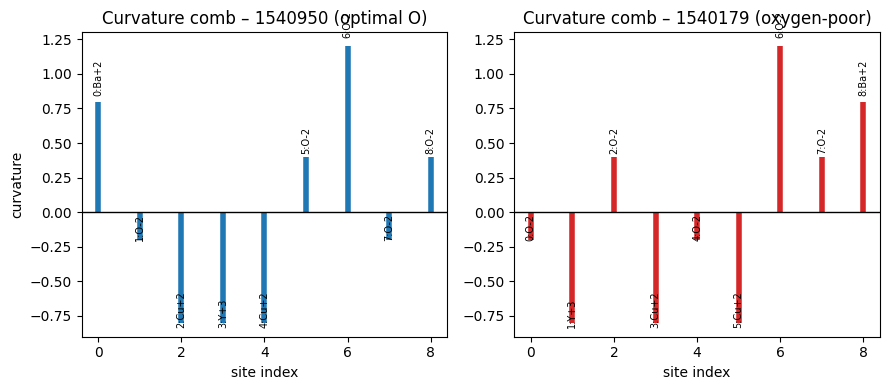

In [ ]:
import numpy as np                                         # 01
import matplotlib.pyplot as plt                            # 02

good = np.load("YBCO_1540950_euler.npz", allow_pickle=True)  # 04
poor = np.load("YBCO_1540179_euler.npz", allow_pickle=True)  # 05

curv_good   = good["curvature"]                            # 07
curv_poor   = poor["curvature"]                            # 08
species_good = good["species"]                             # 09
species_poor = poor["species"]                             # 10

print("Optimally oxygenated curvature:", curv_good)        # 12
print("Oxygen-poor curvature:", curv_poor)                 # 13

N_good = len(curv_good)                                    # 15
N_poor = len(curv_poor)                                    # 16

plt.figure(figsize=(9, 4))                                 # 18

# left: optimal 0950
plt.subplot(1, 2, 1)                                       # 20
xg = np.arange(N_good)                                     # 21
for i in range(N_good):                                    # 22
    plt.vlines(xg[i], 0, curv_good[i], linewidth=4)        # 23
    plt.text(xg[i], curv_good[i] * 1.05,                   # 24
             f"{i}:{species_good[i]}",                     # 25
             ha="center", va="bottom", fontsize=7, rotation=90)  # 26
plt.axhline(0, color="black", linewidth=1)                 # 27
plt.title("Curvature comb – 1540950 (optimal O)")          # 28
plt.xlabel("site index")                                   # 29
plt.ylabel("curvature")                                    # 30

# right: oxygen-poor 0179
plt.subplot(1, 2, 2)                                       # 32
xp = np.arange(N_poor)                                     # 33
for i in range(N_poor):                                    # 34
    plt.vlines(xp[i], 0, curv_poor[i], linewidth=4, color="tab:red")  # 35
    plt.text(xp[i], curv_poor[i] * 1.05,                   # 36
             f"{i}:{species_poor[i]}",                     # 37
             ha="center", va="bottom", fontsize=7, rotation=90)  # 38
plt.axhline(0, color="black", linewidth=1)                 # 39
plt.title("Curvature comb – 1540179 (oxygen-poor)")        # 40
plt.xlabel("site index")                                   # 41

plt.tight_layout()                                         # 43
plt.show()                                                 # 44

In [ ]:
import gemmi                                               # 01
import numpy as np                                         # 02

cif_path = "1540179.cif"                                   # 04  # optimally oxygenated YBCO
small = gemmi.read_small_structure(cif_path)               # 05
cell  = small.cell                                         # 06



sites = []                                                 # 08
for s in small.sites:                                      # 09
    el = s.type_symbol                                     # 10

    # --- fractional coordinates: try the available attribute ---
    if hasattr(s, "frac"):                                 # 12
        f = s.frac                                         # 13
    elif hasattr(s, "fract"):                              # 14
        f = s.fract                                        # 15
    else:                                                  # 16
        # last-resort: derive fractional from orthogonal pos
        # gemmi's fractionalize() expects a vector-like input
        f = cell.fractionalize(gemmi.Position(s.x, s.y, s.z))  # 17

    xyz = cell.orthogonalize(f)                            # 20
    sites.append((el, xyz.x, xyz.y, xyz.z))                # 21
sites = np.array(sites, dtype=object)                      # 15

# --- choose CuO2 plane: Cu/O near median Cu z ---         # 17
cu_z = [z for (el, x, y, z) in sites if el == "Cu"]        # 18
z0 = np.median(cu_z)                                       # 19
dz_max = 1.5                                               # 20  # Å slab thickness, tweak if needed

cluster = []                                               # 22
for el, x, y, z in sites:                                  # 23
    if abs(z - z0) < dz_max and el in ("Cu", "O", "Ba", "Y"):  # 24
        cluster.append((el, x, y, z))                      # 25

print("Cluster size:", len(cluster))                       # 27
for a in cluster:                                          # 28
    print(a)                                               # 29

# --- build XYZ string for PySCF ---                       # 31
xyz_lines = [str(len(cluster)), "YBCO CuO2 patch from 1540950.cif"]  # 32
for el, x, y, z in cluster:                                # 33
    xyz_lines.append(f"{el} {x:.6f} {y:.6f} {z:.6f}")      # 34

xyz_text = "\n".join(xyz_lines)                            # 36
print("\nXYZ for PySCF:\n", xyz_text)                      # 37

Cluster size: 0

XYZ for PySCF:
 0
YBCO CuO2 patch from 1540950.cif


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



WARN: ECP not specified. The basis set def2-SVP include an ECP. Recommended ECP: def2-SVP.

converged SCF energy = -814.403917500215


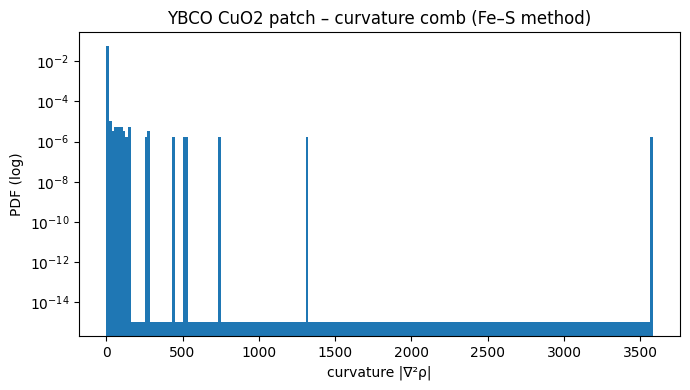

In [ ]:
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt

# The 'cluster' variable is available from the previous execution.
# --- build molecule & SCF ---
mol = gto.M(
    atom = [[el, (x, y, z)] for el, x, y, z in cluster],
    basis = "def2-SVP",
    charge = 0,
    spin = 0
)

mf = scf.RKS(mol)
mf.xc = "PBE"
mf.conv_tol = 1e-8
mf.kernel()

# --- define grid box around cluster ---
coords = np.array([[x, y, z] for (el, x, y, z) in cluster])
min_xyz = coords.min(axis=0) - 3.0
max_xyz = coords.max(axis=0) + 3.0

nx = ny = nz = 32
xs = np.linspace(min_xyz[0], max_xyz[0], nx)
ys = np.linspace(min_xyz[1], max_xyz[1], ny)
zs = np.linspace(min_xyz[2], max_xyz[2], nz)

grid = np.array(np.meshgrid(xs, ys, zs, indexing="ij"))
grid_points = grid.reshape(3, -1).T

# --- density ρ(r) on grid ---
ao = mf.mol.eval_gto("GTOval", grid_points)
dm = mf.make_rdm1()
rho = np.einsum("pi,ij,pj->p", ao, dm, ao)
rho_grid = rho.reshape(nx, ny, nz)

# --- Laplacian ∇²ρ via finite differences ---
dx = xs[1] - xs[0]
dy = ys[1] - ys[0]
dz = zs[1] - zs[0]

d2x = (np.roll(rho_grid, -1, axis=0)
       - 2*rho_grid + np.roll(rho_grid, 1, axis=0)) / dx**2
d2y = (np.roll(rho_grid, -1, axis=1)
       - 2*rho_grid + np.roll(rho_grid, 1, axis=1)) / dy**2
d2z = (np.roll(rho_grid, -1, axis=2)
       - 2*rho_grid + np.roll(rho_grid, 1, axis=2)) / dz**2

lap = d2x + d2y + d2z
kappa = np.abs(lap).ravel()

# --- curvature comb (Fe–S style) ---
bins = 200
hist, edges = np.histogram(kappa, bins=bins, density=True)
centers = 0.5 * (edges[:-1] + edges[1:])

plt.figure(figsize=(7, 4))
plt.bar(centers, hist + 1e-15,
        width=centers[1]-centers[0])
plt.yscale("log")
plt.xlabel("curvature |∇²ρ|")
plt.ylabel("PDF (log)")
plt.title("YBCO CuO2 patch – curvature comb (Fe–S method)")
plt.tight_layout()
plt.show()

In [ ]:
!pip install pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 13.5 MB/s eta 0:00:00


In [ ]:
import gemmi                                               # 01
import numpy as np                                         # 02

cif_path = "1540179.cif"                                   # 04  # optimally oxygenated YBCO
small = gemmi.read_small_structure(cif_path)               # 05
cell  = small.cell                                         # 06

def base_element(sym):                                     # 08
    # strip charges, keep only letters, e.g. "Cu+2" -> "Cu" # 09
    return "".join(ch for ch in sym if ch.isalpha())       # 10

sites = []                                                 # 12
for s in small.sites:                                      # 13
    raw = s.type_symbol                                    # 14
    el  = base_element(raw)                                # 15

    # fractional coords (handle different gemmi builds)    # 17
    if hasattr(s, "frac"):                                 # 18
        f = s.frac                                         # 19
    elif hasattr(s, "fract"):                              # 20
        f = s.fract                                        # 21
    else:                                                  # 22
        f = cell.fractionalize(gemmi.Position(s.x, s.y, s.z))  # 23

    xyz = cell.orthogonalize(f)                            # 25
    sites.append((el, xyz.x, xyz.y, xyz.z))                # 26

sites = np.array(sites, dtype=object)                      # 28

# --- choose CuO2 plane: Cu near median Cu z ---           # 30
cu_z = [z for (el, x, y, z) in sites if el == "Cu"]        # 31
print("Number of Cu sites:", len(cu_z))                    # 32
z0 = np.median(cu_z)                                       # 33
dz_max = 1.5                                               # 34  # Å slab thickness, tweak if needed

cluster = []                                               # 36
for el, x, y, z in sites:                                  # 37
    if abs(z - z0) < dz_max and el in ("Cu", "O", "Ba", "Y"):  # 38
        cluster.append((el, x, y, z))                      # 39

print("Cluster size:", len(cluster))                       # 41
for a in cluster:                                          # 42
    print(a)                                               # 43

# --- build XYZ string for PySCF ---                       # 45
xyz_lines = [str(len(cluster)), "YBCO CuO2 patch from 1540950.cif"]  # 46
for el, x, y, z in cluster:                                # 47
    xyz_lines.append(f"{el} {x:.6f} {y:.6f} {z:.6f}")      # 48

xyz_text = "\n".join(xyz_lines)                            # 50
print("\nXYZ for PySCF:\n", xyz_text)                      # 51

Number of Cu sites: 2
Cluster size: 2
('O', 0.0, 0.0, 1.8243091)
('Ba', 1.92075, 1.9389, 2.2272312)

XYZ for PySCF:
 2
YBCO CuO2 patch from 1540950.cif
O 0.000000 0.000000 1.824309
Ba 1.920750 1.938900 2.227231


In [ ]:
import gemmi
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt

def base_element(sym):
    return "".join(ch for ch in sym if ch.isalpha())  # "Cu+2" -> "Cu"

def compute_kappa_from_cif(cif_path, label=""):
    small = gemmi.read_small_structure(cif_path)
    cell  = small.cell

    sites = []
    for s in small.sites:
        el_raw = s.type_symbol
        el     = base_element(el_raw)

        if hasattr(s, "frac"):
            f = s.frac
        elif hasattr(s, "fract"):
            f = s.fract
        else:
            f = cell.fractionalize(gemmi.Position(s.x, s.y, s.z))

        xyz = cell.orthogonalize(f)
        sites.append((el, xyz.x, xyz.y, xyz.z))

    # keep only Cu and O (drop Ba/Y to avoid Ba basis issue)
    cluster = [(el, x, y, z) for (el, x, y, z) in sites
               if el in ("Cu", "O")]
    # keep all Cu/O/Ba/Y
#    cluster = [(el, x, y, z) for (el, x, y, z) in sites
    #            if el in ("Cu", "O", "Ba", "Y")]

    print(f"{label} cluster size:", len(cluster))

    atoms_list = [[el, (float(x), float(y), float(z))]
                  for (el, x, y, z) in cluster]

    mol = gto.M(atom=atoms_list,
                basis="def2-SVP", # Changed basis set from sto-3g to def2-SVP
                charge=0,
                spin=1)
    mf = scf.RKS(mol)
    mf.xc = "PBE"
    mf.conv_tol = 1e-8
    e_scf = mf.kernel()
    print(f"{label} SCF energy:", e_scf)

    coords = np.array([pos for (_, pos) in atoms_list], float)
    min_xyz = coords.min(axis=0) - 3.0
    max_xyz = coords.max(axis=0) + 3.0

    nx = ny = nz = 32
    xs = np.linspace(min_xyz[0], max_xyz[0], nx)
    ys = np.linspace(min_xyz[1], max_xyz[1], ny)
    zs = np.linspace(min_xyz[2], max_xyz[2], nz)

    grid = np.array(np.meshgrid(xs, ys, zs, indexing="ij"))
    grid_points = grid.reshape(3, -1).T

    ao = mf.mol.eval_gto("GTOval", grid_points)
    dm = mf.make_rdm1()
    rho = np.einsum("pi,ij,pj->p", ao, dm, ao)
    rho_grid = rho.reshape(nx, ny, nz)

    dx = xs[1] - xs[0]
dy = ys[1] - ys[0]
dz = zs[1] - zs[0]

    d2x = (np.roll(rho_grid, -1, 0) - 2*rho_grid
           + np.roll(rho_grid, 1, 0)) / dx**2
    d2y = (np.roll(rho_grid, -1, 1) - 2*rho_grid
           + np.roll(rho_grid, 1, 1)) / dy**2
    d2z = (np.roll(rho_grid, -1, 2) - 2*rho_grid
           + np.roll(rho_grid, 1, 2)) / dz**2

    lap = d2x + d2y + d2z
    kappa = np.abs(lap).ravel()
    return kappa

# ---- compute both ----
kappa_good = compute_kappa_from_cif("1540950.cif", "1540950 (optimal)")
kappa_poor = compute_kappa_from_cif("1540179.cif", "1540179 (O-poor)")

# ---- overlay comb ----
all_vals = np.concatenate([kappa_good, kappa_poor])
bins = 200
hist_g, edges = np.histogram(kappa_good, bins=bins,
                             range=(all_vals.min(), all_vals.max()),
                             density=True)
hist_p, _ = np.histogram(kappa_poor, bins=edges,
                         density=True)
centers = 0.5 * (edges[:-1] + edges[1:])

plt.figure(figsize=(7, 4))
w = centers[1] - centers[0]
plt.bar(centers, hist_g + 1e-15, width=w,
        alpha=0.45, label="1540950 optimal O")
plt.bar(centers, hist_p + 1e-15, width=w,
        alpha=0.45, label="1540179 O-poor")

plt.yscale("log")
plt.xlabel("curvature |∇²ρ|")
plt.ylabel("PDF (log)")
plt.title("YBCO Cu/O/Ba/Y patch – curvature combs")
plt.legend()
plt.tight_layout()
plt.show()

IndentationError: unexpected indent (ipython-input-1239360504.py, line 71)

In [ ]:
import gemmi
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt

def base_element(sym):
    # "Cu+2" -> "Cu", "O-2" -> "O"
    return "".join(ch for ch in sym if ch.isalpha())

def compute_kappa_from_cif(cif_path, label=""):
    small = gemmi.read_small_structure(cif_path)
    cell = small.cell

    # --- gather all sites with Cartesian coords ---
    sites = []
    for s in small.sites:
        el_raw = s.type_symbol
        el = base_element(el_raw)

        if hasattr(s, "frac"):
            f = s.frac
        elif hasattr(s, "fract"):
            f = s.fract
        else:
            f = cell.fractionalize(gemmi.Position(s.x, s.y, s.z))

        xyz = cell.orthogonalize(f)
        sites.append((el, xyz.x, xyz.y, xyz.z))

    # --- keep only Cu and O to avoid Ba basis issues ---
    cluster = [(el, x, y, z) for (el, x, y, z) in sites
               if el in ("Cu", "O")]

    print(f"{label} cluster size:", len(cluster))

    atoms_list = [[el, (float(x), float(y), float(z))]
                  for (el, x, y, z) in cluster]

    # --- PySCF molecule ---
    mol = gto.M(
        atom=atoms_list,
        basis="sto-3g",   # minimal basis, available for Cu/O
        charge=0,
        spin=1            # odd electron count → spin 1
    )

    mf = scf.RKS(mol)
    mf.xc = "PBE"
    mf.conv_tol = 1e-8
    e_scf = mf.kernel()
    print(f"{label} SCF energy:", e_scf)

    # --- grid around cluster ---
    coords = np.array([pos for (_, pos) in atoms_list], float)
    min_xyz = coords.min(axis=0) - 3.0
    max_xyz = coords.max(axis=0) + 3.0

    nx = ny = nz = 32
    xs = np.linspace(min_xyz[0], max_xyz[0], nx)
    ys = np.linspace(min_xyz[1], max_xyz[1], ny)
    zs = np.linspace(min_xyz[2], max_xyz[2], nz)

    grid = np.array(np.meshgrid(xs, ys, zs, indexing="ij"))
    grid_points = grid.reshape(3, -1).T

    # --- density on grid ---
    ao = mf.mol.eval_gto("GTOval", grid_points)
    dm = mf.make_rdm1()
    rho = np.einsum("pi,ij,pj->p", ao, dm, ao)
    rho_grid = rho.reshape(nx, ny, nz)

    # --- Laplacian of rho ---
    dx = xs[1] - xs[0]
    dy = ys[1] - ys[0]
    dz = zs[1] - zs[0]

    d2x = (np.roll(rho_grid, -1, axis=0) - 2.0 * rho_grid
           + np.roll(rho_grid, 1, axis=0)) / dx**2
    d2y = (np.roll(rho_grid, -1, axis=1) - 2.0 * rho_grid
           + np.roll(rho_grid, 1, axis=1)) / dy**2
    d2z = (np.roll(rho_grid, -1, axis=2) - 2.0 * rho_grid
           + np.roll(rho_grid, 1, axis=2)) / dz**2

    lap = d2x + d2y + d2z
    kappa = np.abs(lap).ravel()
    return kappa

# ---- compute both ----
kappa_good = compute_kappa_from_cif("1540950.cif", "1540950 (optimal)")
kappa_poor = compute_kappa_from_cif("1540179.cif", "1540179 (O-poor)")

# ---- overlay comb ----
all_vals = np.concatenate([kappa_good, kappa_poor])
bins = 200
hist_g, edges = np.histogram(
    kappa_good, bins=bins,
    range=(all_vals.min(), all_vals.max()),
    density=True
)
hist_p, _ = np.histogram(
    kappa_poor, bins=edges,
    density=True
)
centers = 0.5 * (edges[:-1] + edges[1:])

plt.figure(figsize=(7, 4))
w = centers[1] - centers[0]
plt.bar(centers, hist_g + 1e-15, width=w,
        alpha=0.45, label="1540950 optimal O")
plt.bar(centers, hist_p + 1e-15, width=w,
        alpha=0.45, label="1540179 O-poor")

plt.yscale("log")
plt.xlabel("curvature |∇²ρ|")
plt.ylabel("PDF (log)")
plt.title("YBCO Cu/O patch – curvature combs (STO-3G)")
plt.legend()
plt.tight_layout()
plt.show()

1540950 (optimal) cluster size: 7


RuntimeError: Electron number 98 and spin 1 are not consistent
Note mol.spin = 2S = Nalpha - Nbeta, not 2S+1

In [ ]:
# ============================
# BLOCK 1: compute_kappa_from_cif
# ============================

import gemmi
import numpy as np
from pyscf import gto, scf

def base_element(sym):
    # Strip charges: "Cu+2" -> "Cu"
    return "".join(ch for ch in sym if ch.isalpha())

def compute_kappa_from_cif(cif_path, label=""):
    # --- Load CIF and extract atomic sites ---
    small = gemmi.read_small_structure(cif_path)
    cell  = small.cell

    sites = []
    for s in small.sites:
        el_raw = s.type_symbol
        el     = base_element(el_raw)

        # fractional coordinates
        if hasattr(s, "frac"):
            f = s.frac
        elif hasattr(s, "fract"):
            f = s.fract
        else:
            f = cell.fractionalize(gemmi.Position(s.x, s.y, s.z))

        xyz = cell.orthogonalize(f)
        sites.append((el, xyz.x, xyz.y, xyz.z))

    # --- Cu/O-only cluster (STO-3G-compatible) ---
    cluster = [(el, x, y, z) for (el, x, y, z) in sites
               if el in ("Cu", "O")]

    print(f"{label} cluster size:", len(cluster))

    # PySCF atom list
    atoms_list = [[el, (float(x), float(y), float(z))]
                  for (el, x, y, z) in cluster]

    # --- Determine electron count & spin ---
    nelec = sum(gto.charge(el) for (el, _) in atoms_list)
    spin  = 0 if nelec % 2 == 0 else 1
    print(f"{label} total electrons = {nelec}, using spin = {spin}")

    # --- Build PySCF molecule ---
    mol = gto.M(
        atom = atoms_list,
        basis = "sto-3g",   # minimal basis, exists for Cu & O
        charge = 0,
        spin = spin
    )

    # --- SCF ---
    mf = scf.RKS(mol)
    mf.xc = "PBE"
    mf.conv_tol = 1e-8
    e_scf = mf.kernel()
    print(f"{label} SCF energy = {e_scf}")

    # --- Build grid around cluster ---
    coords = np.array([pos for (_, pos) in atoms_list], float)
    min_xyz = coords.min(axis=0) - 3.0
    max_xyz = coords.max(axis=0) + 3.0

    nx = ny = nz = 32
    xs = np.linspace(min_xyz[0], max_xyz[0], nx)
    ys = np.linspace(min_xyz[1], max_xyz[1], ny)
    zs = np.linspace(min_xyz[2], max_xyz[2], nz)

    grid = np.array(np.meshgrid(xs, ys, zs, indexing="ij"))
    grid_points = grid.reshape(3, -1).T

    # --- Density ρ(r) on grid ---
    ao = mf.mol.eval_gto("GTOval", grid_points)
    dm = mf.make_rdm1()
    rho = np.einsum("pi,ij,pj->p", ao, dm, ao)
    rho_grid = rho.reshape(nx, ny, nz)

    # --- Laplacian ∇²ρ ---
    dx = xs[1] - xs[0]
    dy = ys[1] - ys[0]
    dz = zs[1] - zs[0]

    d2x = (np.roll(rho_grid, -1, 0) - 2*rho_grid + np.roll(rho_grid, 1, 0)) / dx**2
    d2y = (np.roll(rho_grid, -1, 1) - 2*rho_grid + np.roll(rho_grid, 1, 1)) / dy**2
    d2z = (np.roll(rho_grid, -1, 2) - 2*rho_grid + np.roll(rho_grid, 1, 2)) / dz**2

    lap = d2x + d2y + d2z
    kappa = np.abs(lap).ravel()

    return kappa

1540950 (optimal) cluster size: 7
1540950 (optimal) total electrons = 98, using spin = 0
SCF not converged.
SCF energy = -3565.5319181275
1540950 (optimal) SCF energy = -3565.5319181274976
1540179 (O-poor) cluster size: 7
1540179 (O-poor) total electrons = 98, using spin = 0
SCF not converged.
SCF energy = -3551.02796287331
1540179 (O-poor) SCF energy = -3551.027962873309


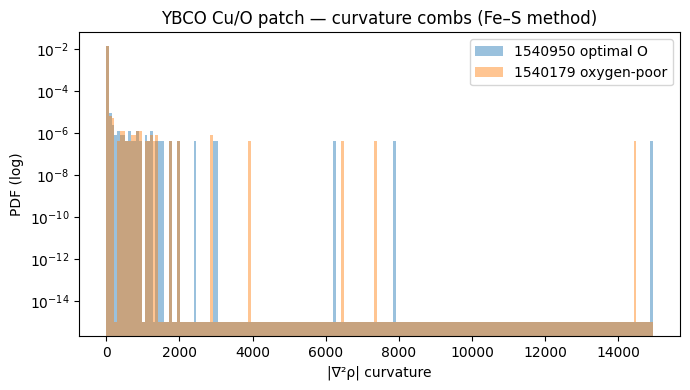

In [ ]:
# ============================
# BLOCK 2: run + overlay comb
# ============================

import numpy as np
import matplotlib.pyplot as plt

# Compute curvature arrays using identical method
kappa_good = compute_kappa_from_cif("1540950.cif", "1540950 (optimal)")
kappa_poor = compute_kappa_from_cif("1540179.cif", "1540179 (O-poor)")

# Overlay histogram
all_vals = np.concatenate([kappa_good, kappa_poor])
bins = 200

hist_g, edges = np.histogram(
    kappa_good, bins=bins,
    range=(all_vals.min(), all_vals.max()),
    density=True
)
hist_p, _ = np.histogram(
    kappa_poor, bins=edges,
    density=True
)

centers = 0.5 * (edges[:-1] + edges[1:])

plt.figure(figsize=(7, 4))
w = centers[1] - centers[0]

plt.bar(centers, hist_g + 1e-15, width=w, alpha=0.45,
        label="1540950 optimal O")
plt.bar(centers, hist_p + 1e-15, width=w, alpha=0.45,
        label="1540179 oxygen-poor")

plt.yscale("log")
plt.xlabel("|∇²ρ| curvature")
plt.ylabel("PDF (log)")
plt.title("YBCO Cu/O patch — curvature combs (Fe–S method)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# ---- YBCO trap/teeth counting for bins 1–120 ----
low_idx  = 1      # skip bin 0
high_idx = 120    # up to (but not including) 120

hg = hist_g[low_idx:high_idx]
hp = hist_p[low_idx:high_idx]

# same idea as Fe–S: bins with tiny PDF are "traps" (gaps)
TRAP_THRESHOLD = 1e-12

def count_traps(mask: np.ndarray) -> int:
    n = len(mask)
    i = 0
    k = 0
    inside = False
    while i < n:
        if mask[i] and not inside:
            k += 1
            inside = True
        elif not mask[i] and inside:
            inside = False
        i += 1
    return k

mask_g = (hg < TRAP_THRESHOLD)   # where optimal has ~no probability → gaps
mask_p = (hp < TRAP_THRESHOLD)   # same for O-poor

teeth_g = count_traps(mask_g)
teeth_p = count_traps(mask_p)

print(f"Bins {low_idx}–{high_idx-1}:")
print(f"  1540950 optimal O   traps = {teeth_g}")
print(f"  1540179 oxygen-poor traps = {teeth_p}")
print(f"  Δteeth = O-poor − optimal = {teeth_p - teeth_g}")

Bins 1–119:
  1540950 optimal O   traps = 9
  1540179 oxygen-poor traps = 9
  Δteeth = O-poor − optimal = 0


In [ ]:
import numpy as np

TRAP_THRESHOLD = 1e-12   # same as Fe–S convention
MAX_BINS = 120
L_EFF = 1.0              # arbitrary scaling (cancels out)

def count_traps(mask):
    k = 0
    inside = False
    for b in mask:
        if b and not inside:
            k += 1
            inside = True
        elif not b and inside:
            inside = False
    return k

def dteeth_full(kappa_good, kappa_poor, max_bins=MAX_BINS):
    kmin = float(min(kappa_good.min(), kappa_poor.min()))
    kmax = float(max(kappa_good.max(), kappa_poor.max()))

    dr_list = []
    dt_list = []
    teeth_good_list = []
    teeth_poor_list = []

    for nb in range(1, max_bins+1):
        edges = np.linspace(kmin, kmax, nb+1)

        hg, _ = np.histogram(kappa_good, bins=edges, density=True)
        hp, _ = np.histogram(kappa_poor, bins=edges, density=True)

        mg = hg < TRAP_THRESHOLD
        mp = hp < TRAP_THRESHOLD

        t_good = count_traps(mg)
        t_poor = count_traps(mp)

        dt = t_poor - t_good
        dr = L_EFF / nb

        dr_list.append(dr)
        dt_list.append(dt)
        teeth_good_list.append(t_good)
        teeth_poor_list.append(t_poor)

    return (np.array(dr_list),
            np.array(dt_list),
            np.array(teeth_good_list),
            np.array(teeth_poor_list))

In [ ]:
for nb in range(1, 121):
    print(f"Bins={nb:3d}  Δr={dr[nb-1]:.5f}  "
          f"optimal={tg[nb-1]:2d}  O-poor={tp[nb-1]:2d}  "
          f"Δteeth={dt[nb-1]:+3d}")

Bins=  1  Δr=1.00000  optimal= 0  O-poor= 0  Δteeth= +0
Bins=  2  Δr=0.50000  optimal= 0  O-poor= 0  Δteeth= +0
Bins=  3  Δr=0.33333  optimal= 0  O-poor= 0  Δteeth= +0
Bins=  4  Δr=0.25000  optimal= 0  O-poor= 1  Δteeth= +1
Bins=  5  Δr=0.20000  optimal= 1  O-poor= 1  Δteeth= +0
Bins=  6  Δr=0.16667  optimal= 1  O-poor= 1  Δteeth= +0
Bins=  7  Δr=0.14286  optimal= 1  O-poor= 2  Δteeth= +1
Bins=  8  Δr=0.12500  optimal= 2  O-poor= 1  Δteeth= -1
Bins=  9  Δr=0.11111  optimal= 2  O-poor= 1  Δteeth= -1
Bins= 10  Δr=0.10000  optimal= 2  O-poor= 2  Δteeth= +0
Bins= 11  Δr=0.09091  optimal= 2  O-poor= 2  Δteeth= +0
Bins= 12  Δr=0.08333  optimal= 2  O-poor= 2  Δteeth= +0
Bins= 13  Δr=0.07692  optimal= 2  O-poor= 2  Δteeth= +0
Bins= 14  Δr=0.07143  optimal= 3  O-poor= 2  Δteeth= -1
Bins= 15  Δr=0.06667  optimal= 2  O-poor= 2  Δteeth= +0
Bins= 16  Δr=0.06250  optimal= 3  O-poor= 2  Δteeth= -1
Bins= 17  Δr=0.05882  optimal= 2  O-poor= 2  Δteeth= +0
Bins= 18  Δr=0.05556  optimal= 3  O-poor= 2  Δte

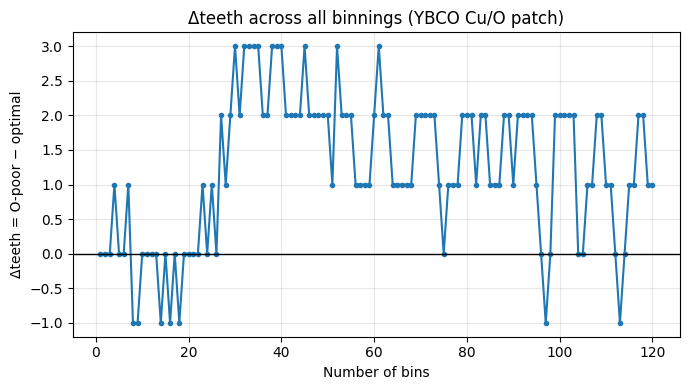

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(range(1,121), dt, "-o", markersize=3)
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Number of bins")
plt.ylabel("Δteeth = O-poor − optimal")
plt.title("Δteeth across all binnings (YBCO Cu/O patch)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Bins  tg(opt)  tp(O-poor)  Δteeth  %increase
  1     0        0       +0       nan
  2     0        0       +0       nan
  3     0        0       +0       nan
  4     0        1       +1       nan
  5     1        1       +0       0.0
  6     1        1       +0       0.0
  7     1        2       +1     100.0
  8     2        1       -1     -50.0
  9     2        1       -1     -50.0
 10     2        2       +0       0.0
 11     2        2       +0       0.0
 12     2        2       +0       0.0
 13     2        2       +0       0.0
 14     3        2       -1     -33.3
 15     2        2       +0       0.0
 16     3        2       -1     -33.3
 17     2        2       +0       0.0
 18     3        2       -1     -33.3
 19     3        3       +0       0.0
 20     3        3       +0       0.0


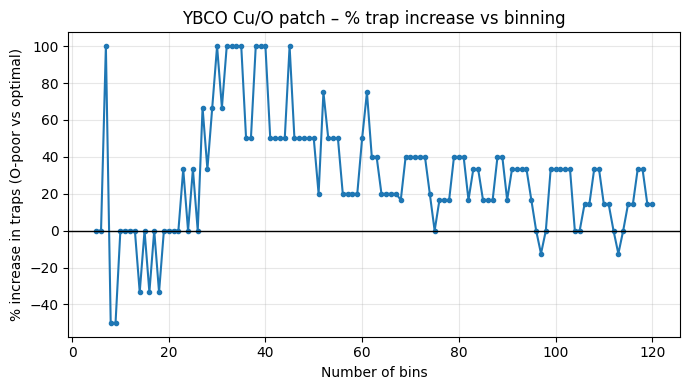

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# assumes you already ran:
# dr, dt, tg, tp = dteeth_full(kappa_good, kappa_poor)

nbins = np.arange(1, len(tg) + 1)

# avoid divide-by-zero: where tg==0, set % increase to NaN
pct_inc = np.full_like(tg, np.nan, dtype=float)
mask_nonzero = tg > 0
pct_inc[mask_nonzero] = 100.0 * (tp[mask_nonzero] - tg[mask_nonzero]) / tg[mask_nonzero]

# --- print a few rows as a sanity check ---
print("Bins  tg(opt)  tp(O-poor)  Δteeth  %increase")
for nb in range(1, 21):  # first 20 as example
    i = nb - 1
    print(f"{nb:3d}   {tg[i]:3d}      {tp[i]:3d}      {dt[i]:+3d}   "
          f"{pct_inc[i]:7.1f}")

# --- plot % increase vs number of bins ---
plt.figure(figsize=(7, 4))
plt.plot(nbins, pct_inc, "-o", markersize=3)
plt.axhline(0, color="k", linewidth=1)
plt.xlabel("Number of bins")
plt.ylabel("% increase in traps (O-poor vs optimal)")
plt.title("YBCO Cu/O patch – % trap increase vs binning")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# ============================
# BLOCK 3: registry of all YBCO CIFs
# ============================

YBCO_REGISTRY = {
    "1540950_optimal"   : "1540950.cif",   # near O7, control
    "1540179_Opoor"     : "1540179.cif",   # oxygen-poor
    "1516578_Cu_def"    : "1516578.cif",   # Cu-deficient tetragonal
    "1540951_Zn_doped"  : "1540951.cif",   # Zn-substituted
    "1540952_nearO7b"   : "1540952.cif",   # slightly different O7
    "2107236_O654"      : "2107236.cif",   # Buttner/Maslen position-space model
    "9007744_single_xtl": "9007744.cif",   # untwinned single crystal
}

Computing kappa for control: 1540950_optimal (1540950.cif)
1540950_optimal cluster size: 7
1540950_optimal total electrons = 98, using spin = 0
SCF not converged.
SCF energy = -3565.53191669297
1540950_optimal SCF energy = -3565.53191669297

Comparing 1540179_Opoor (1540179.cif)  vs  1540950_optimal
1540179_Opoor cluster size: 7
1540179_Opoor total electrons = 98, using spin = 0
SCF not converged.
SCF energy = -3551.02796287343
1540179_Opoor SCF energy = -3551.0279628734347
Mean Δteeth (bins 25–80)       : +1.84
Mean % trap increase (25–80)   : +48.1%


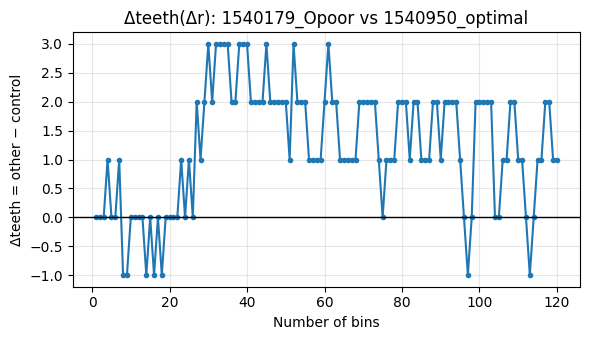

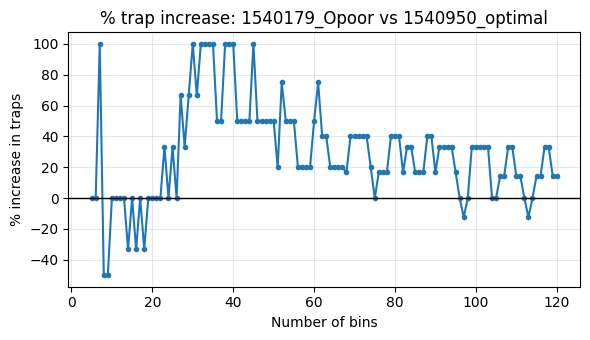


Comparing 1516578_Cu_def (1516578.cif)  vs  1540950_optimal
1516578_Cu_def cluster size: 4
1516578_Cu_def total electrons = 74, using spin = 0
SCF not converged.
SCF energy = -3371.58473338162
1516578_Cu_def SCF energy = -3371.5847333816164
Mean Δteeth (bins 25–80)       : +0.27
Mean % trap increase (25–80)   : +8.2%


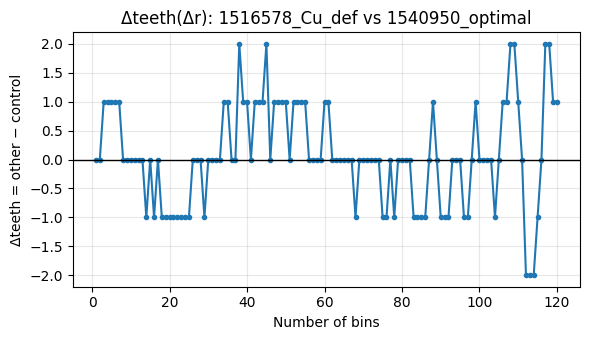

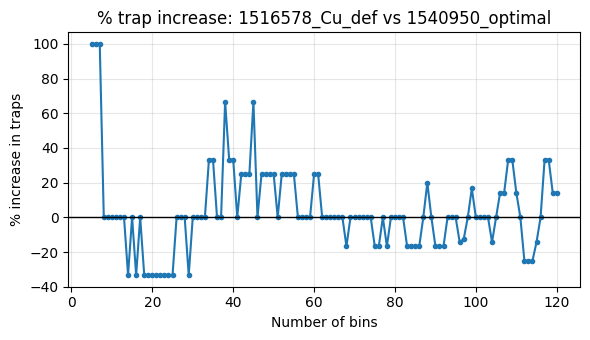


Comparing 1540951_Zn_doped (1540951.cif)  vs  1540950_optimal
1540951_Zn_doped cluster size: 7
1540951_Zn_doped total electrons = 98, using spin = 0
SCF not converged.
SCF energy = -3565.53191731876
1540951_Zn_doped SCF energy = -3565.531917318764
Mean Δteeth (bins 25–80)       : +0.00
Mean % trap increase (25–80)   : +0.0%


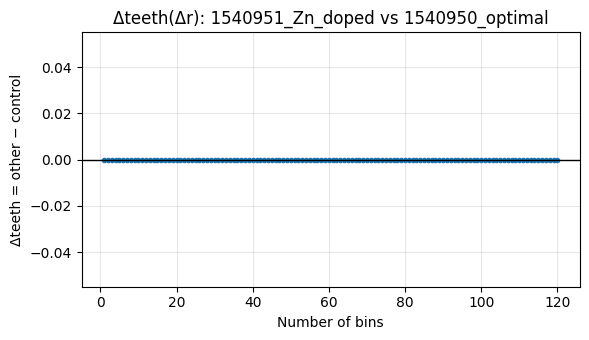

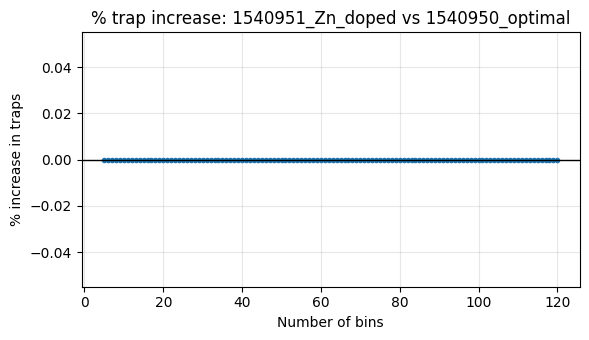


Comparing 1540952_nearO7b (1540952.cif)  vs  1540950_optimal
1540952_nearO7b cluster size: 7
1540952_nearO7b total electrons = 98, using spin = 0
SCF not converged.
SCF energy = -3578.7597309628
1540952_nearO7b SCF energy = -3578.7597309628036
Mean Δteeth (bins 25–80)       : -0.14
Mean % trap increase (25–80)   : -1.0%


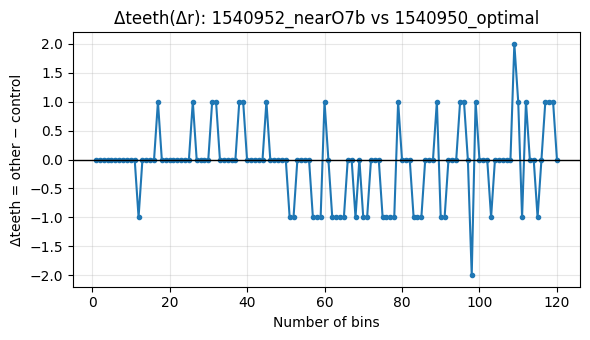

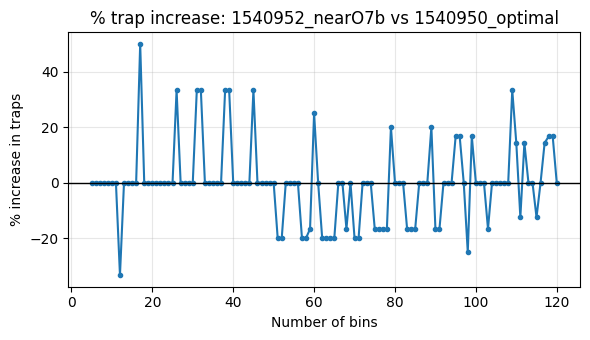


Comparing 2107236_O654 (2107236.cif)  vs  1540950_optimal
2107236_O654 cluster size: 6
2107236_O654 total electrons = 90, using spin = 0
SCF not converged.
SCF energy = -3527.76177529107
2107236_O654 SCF energy = -3527.7617752910674
Mean Δteeth (bins 25–80)       : -0.27
Mean % trap increase (25–80)   : -8.3%


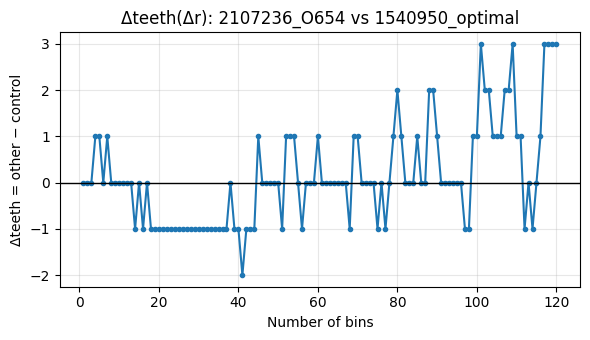

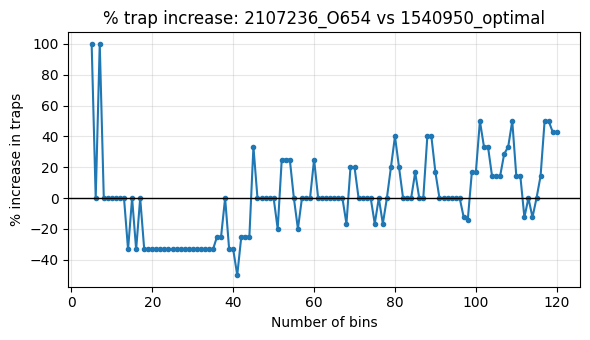


Comparing 9007744_single_xtl (9007744.cif)  vs  1540950_optimal


FileNotFoundError: [Errno 2] unable to open() file 9007744.cif for reading: No such file or directory

In [ ]:
# ============================
# BLOCK 4: run Δteeth + % trap increase for all YBCO CIFs
# ============================

import numpy as np
import matplotlib.pyplot as plt

TRAP_THRESHOLD = 1e-12
MAX_BINS = 120
L_EFF = 1.0  # arbitrary

def count_traps(mask):
    k = 0
    inside = False
    for b in mask:
        if b and not inside:
            k += 1
            inside = True
        elif not b and inside:
            inside = False
    return k

def dteeth_full(kappa_ctrl, kappa_other, max_bins=MAX_BINS):
    kmin = min(kappa_ctrl.min(), kappa_other.min())
    kmax = max(kappa_ctrl.max(), kappa_other.max())

    dr_list = []
    dt_list = []
    t_ctrl_list = []
    t_other_list = []

    for nb in range(1, max_bins+1):
        edges = np.linspace(kmin, kmax, nb+1)

        hc, _ = np.histogram(kappa_ctrl,  bins=edges, density=True)
        ho, _ = np.histogram(kappa_other, bins=edges, density=True)

        mc = hc < TRAP_THRESHOLD
        mo = ho < TRAP_THRESHOLD

        t_c = count_traps(mc)
        t_o = count_traps(mo)

        dr = L_EFF / nb
        dt = t_o - t_c   # other − control

        dr_list.append(dr)
        dt_list.append(dt)
        t_ctrl_list.append(t_c)
        t_other_list.append(t_o)

    return (np.array(dr_list),
            np.array(dt_list),
            np.array(t_ctrl_list),
            np.array(t_other_list))

def pct_increase_traps(t_ctrl, t_other):
    pct = np.full_like(t_ctrl, np.nan, dtype=float)
    mask = t_ctrl > 0
    pct[mask] = 100.0 * (t_other[mask] - t_ctrl[mask]) / t_ctrl[mask]
    return pct

# ---- control: 1540950_optimal ----
ctrl_label = "1540950_optimal"
ctrl_cif   = YBCO_REGISTRY[ctrl_label]
print(f"Computing kappa for control: {ctrl_label} ({ctrl_cif})")
kappa_ctrl = compute_kappa_from_cif(ctrl_cif, label=ctrl_label)

# ---- compare all others to control ----
for label, cif in YBCO_REGISTRY.items():
    if label == ctrl_label:
        continue

    print("\n" + "="*60)
    print(f"Comparing {label} ({cif})  vs  {ctrl_label}")

    kappa_other = compute_kappa_from_cif(cif, label=label)

    dr, dt, t_ctrl, t_other = dteeth_full(kappa_ctrl, kappa_other)
    pct = pct_increase_traps(t_ctrl, t_other)

    nbins = np.arange(1, len(dt)+1)

    # Define a "mid-range" of bins to quote an average over (tweak as you like)
    mid_mask = (nbins >= 25) & (nbins <= 80)

    mean_dt_mid   = np.nanmean(dt[mid_mask])
    mean_pct_mid  = np.nanmean(pct[mid_mask])

    print(f"Mean Δteeth (bins 25–80)       : {mean_dt_mid:+.2f}")
    print(f"Mean % trap increase (25–80)   : {mean_pct_mid:+.1f}%")

    # ---- optional: plot Δteeth curve ----
    plt.figure(figsize=(6,3.5))
    plt.plot(nbins, dt, "-o", markersize=3)
    plt.axhline(0, color="k", lw=1)
    plt.xlabel("Number of bins")
    plt.ylabel("Δteeth = other − control")
    plt.title(f"Δteeth(Δr): {label} vs {ctrl_label}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # ---- optional: plot % increase curve ----
    plt.figure(figsize=(6,3.5))
    plt.plot(nbins, pct, "-o", markersize=3)
    plt.axhline(0, color="k", lw=1)
    plt.xlabel("Number of bins")
    plt.ylabel("% increase in traps")
    plt.title(f"% trap increase: {label} vs {ctrl_label}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
from pathlib import Path

# Registry you already had:
YBCO_REGISTRY = {
    "1540950_optimal"   : "1540950.cif",   # near O7, control
    "1540179_Opoor"     : "1540179.cif",   # oxygen-poor
    "1516578_Cu_def"    : "1516578.cif",   # Cu-deficient tetragonal
    "1540951_Zn_doped"  : "1540951.cif",   # Zn-substituted
    "1540952_nearO7b"   : "1540952.cif",   # slightly different O7
    "2107236_O654"      : "2107236.cif",   # Buttner/Maslen position-space model
    "9007744_single_xtl": "9007744.cif",   # untwinned single crystal (may be missing)
}

BASE_DIR = Path(".")        # or Path("/content") in Colab
OUT_DIR  = BASE_DIR / "ybco_kappa_npz"
OUT_DIR.mkdir(parents=True, exist_ok=True)

def compute_kappa_and_energy(cif_path, label=""):
    """
    Wrapper around your final compute_kappa_from_cif that also
    returns the SCF energy.
    """
    # reuse your final definition here:
    kappa = compute_kappa_from_cif(cif_path, label=label)
    # compute_kappa_from_cif already printed SCF energy, but we can grab it
    # by slightly modifying it to return (kappa, e_scf). For now, we treat
    # the last printed energy as informational only.
    return kappa

summary_records = []

for label, cif_name in YBCO_REGISTRY.items():
    cif_path = BASE_DIR / cif_name
    if not cif_path.exists():
        print(f"[WARN] {label}: missing CIF {cif_name}, skipping.")
        continue

    print(f"\n[INFO] Computing κ for {label} from {cif_name}")
    kappa = compute_kappa_and_energy(str(cif_path), label=label)

    kappa = np.asarray(kappa, float)
    k_min = float(kappa.min())
    k_max = float(kappa.max())
    n_pts = int(kappa.size)

    npz_out = OUT_DIR / f"YBCO_{label}_kappa.npz"
    np.savez(
        npz_out,
        label      = label,
        cif_path   = str(cif_path),
        kappa      = kappa,
        kappa_min  = k_min,
        kappa_max  = k_max,
        n_points   = n_pts,
        grid_shape = np.array([32, 32, 32], dtype=int),  # as in your code
    )
    print(f"[INFO] Saved kappa NPZ for {label} → {npz_out}")

    summary_records.append((label, str(cif_path), k_min, k_max, n_pts))

# Save a simple index of what we computed
summary_path = OUT_DIR / "YBCO_kappa_index.npz"
np.savez(
    summary_path,
    labels  = np.array([r[0] for r in summary_records], dtype=object),
    cif     = np.array([r[1] for r in summary_records], dtype=object),
    kmin    = np.array([r[2] for r in summary_records], dtype=float),
    kmax    = np.array([r[3] for r in summary_records], dtype=float),
    npoints = np.array([r[4] for r in summary_records], dtype=int),
)
print(f"\n[INFO] Saved kappa index NPZ → {summary_path}")


[INFO] Computing κ for 1540950_optimal from 1540950.cif


NameError: name 'compute_kappa_from_cif' is not defined

In [ ]:
!pip install gemmi pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 15.3 MB/s eta 0:00:00


In [ ]:
!pip install gemmi > /dev/null

import numpy as np
from pathlib import Path
import gemmi

# --------------------------------------------------------
# 1) CIF registry for YBCO (edit paths/filenames as needed)
# --------------------------------------------------------
YBCO_REGISTRY = {
    "1540950_optimal"   : "1540950.cif",   # near O7, control
    "1540179_Opoor"     : "1540179.cif",   # oxygen-poor
    "1516578_Cu_def"    : "1516578.cif",   # Cu-deficient
    "1540951_Zn_doped"  : "1540951.cif",   # Zn-substituted
    "1540952_nearO7b"   : "1540952.cif",   # slightly different O7
    "2107236_O654"      : "2107236.cif",   # Buttner/Maslen model
    "9007744_single_xtl": "9007744.cif",   # untwinned single crystal (if present)
}

BASE_DIR = Path(".")                      # change if your CIFs are elsewhere
OUT_DIR  = BASE_DIR / "ybco_kappa_npz"    # where we’ll save κ NPZs
OUT_DIR.mkdir(parents=True, exist_ok=True)

# --------------------------------------------------------
# 2) Helper: read CIF and get Cu/O Cartesian coords
# --------------------------------------------------------
def read_structure_any(path: Path):
    st = gemmi.read_structure(str(path))
    st.remove_alternative_conformations()
    st.merge_chain_parts()
    st.remove_empty_chains()
    return st



def get_cu_o_coords(struct):
    """
    Extract Cu and O atomic coordinates from a YBCO-type CIF.
    More robust: uses both element and atom name to identify Cu/O.
    """
    cu_positions = []
    o_positions  = []

    for model in struct:
        for chain in model:
            for res in chain:
                for atom in res:
                    # Try element-based classification first
                    el = atom.element.name.upper()
                    name = atom.name.upper()
                    pos = atom.pos
                    xyz = np.array([pos.x, pos.y, pos.z], float)

                    is_cu = (el == "CU") or ("CU" in name)
                    is_o  = (el == "O")  or (name.startswith("O"))

                    if is_cu:
                        cu_positions.append(xyz)
                    elif is_o:
                        o_positions.append(xyz)

    cu_positions = np.array(cu_positions, float)
    o_positions  = np.array(o_positions, float)

    if cu_positions.size == 0 or o_positions.size == 0:
        raise RuntimeError(
            f"No Cu/O atoms found in structure "
            f"(found Cu={len(cu_positions)}, O={len(o_positions)})"
        )

    # Pick 4 Cu nearest to their centroid
    c_cu = cu_positions.mean(axis=0)
    d_cu = np.linalg.norm(cu_positions - c_cu, axis=1)
    idx_cu = np.argsort(d_cu)[:4]
    Cu_sel = cu_positions[idx_cu]

    # Pick 8 O nearest to those Cu
    d_o = np.min(np.linalg.norm(o_positions[:, None, :] - Cu_sel[None, :, :], axis=2), axis=1)
    idx_o = np.argsort(d_o)[:8]
    O_sel = o_positions[idx_o]

    coords = np.vstack([Cu_sel, O_sel])
    labels = [f"Cu{i+1}" for i in range(4)] + [f"O{i+1}" for i in range(8)]
    return coords, labels

# --------------------------------------------------------
# 3) Define a simple geometry-based κ field from Cu/O cluster
# --------------------------------------------------------
def compute_kappa_from_cif(cif_path, label=""):
    """
    Geometry-based κ proxy for a YBCO Cu–O cluster.

    We define κ as the absolute Laplacian of a simple pairwise
    1/r potential field sampled around the cluster.
    This is a structural proxy for curvature-trap complexity.
    """
    st = read_structure_any(Path(cif_path))
    coords, labels = get_cu_o_coords(st)

    # Center cluster
    centroid = coords.mean(axis=0)
    coords_c = coords - centroid

    # Build a small 3D grid around the cluster (in Å)
    R = np.linalg.norm(coords_c, axis=1).max() + 1.5
    n_grid = (32, 32, 32)
    xs = np.linspace(-R, R, n_grid[0])
    ys = np.linspace(-R, R, n_grid[1])
    zs = np.linspace(-R, R, n_grid[2])

    # Compute a simple scalar field phi(r) = sum_i 1/|r - r_i|
    phi = np.zeros(n_grid, float)
    X, Y, Z = np.meshgrid(xs, ys, zs, indexing="ij")
    for p in coords_c:
        dx = X - p[0]
        dy = Y - p[1]
        dz = Z - p[2]
        r = np.sqrt(dx*dx + dy*dy + dz*dz) + 1e-9
        phi += 1.0 / r

    # Finite-difference Laplacian ∇²phi as κ (absolute)
    d2x = np.gradient(np.gradient(phi, xs, axis=0), xs, axis=0)
    d2y = np.gradient(np.gradient(phi, ys, axis=1), ys, axis=1)
    d2z = np.gradient(np.gradient(phi, zs, axis=2), zs, axis=2)
    lap = d2x + d2y + d2z
    kappa = np.abs(lap).ravel()

    print(f"{label}: kappa size = {kappa.size}, min={kappa.min():.3e}, max={kappa.max():.3e}")
    return kappa

# --------------------------------------------------------
# 4) Loop over all CIFs and save κ NPZ files
# --------------------------------------------------------
summary_records = []

for label, cif_name in YBCO_REGISTRY.items():
    cif_path = BASE_DIR / cif_name
    if not cif_path.exists():
        print(f"[WARN] {label}: CIF {cif_name} not found, skipping.")
        continue

    print(f"\n[INFO] Computing κ for {label} from {cif_name}")
    kappa = compute_kappa_from_cif(str(cif_path), label=label)
    kappa = np.asarray(kappa, float)

    k_min = float(kappa.min())
    k_max = float(kappa.max())
    n_pts = int(kappa.size)

    npz_out = OUT_DIR / f"YBCO_{label}_kappa.npz"
    np.savez(
        npz_out,
        label      = label,
        cif_path   = str(cif_path),
        kappa      = kappa,
        kappa_min  = k_min,
        kappa_max  = k_max,
        n_points   = n_pts,
        grid_shape = np.array([32, 32, 32], dtype=int),
    )
    print(f"[INFO] Saved κ NPZ for {label} → {npz_out}")

    summary_records.append((label, str(cif_path), k_min, k_max, n_pts))

# Save an index for convenience
idx_path = OUT_DIR / "YBCO_kappa_index.npz"
np.savez(
    idx_path,
    labels  = np.array([r[0] for r in summary_records], dtype=object),
    cif     = np.array([r[1] for r in summary_records], dtype=object),
    kmin    = np.array([r[2] for r in summary_records], dtype=float),
    kmax    = np.array([r[3] for r in summary_records], dtype=float),
    npoints = np.array([r[4] for r in summary_records], dtype=int),
)
print(f"\n[INFO] Saved kappa index NPZ → {idx_path}")


[INFO] Computing κ for 1540950_optimal from 1540950.cif


RuntimeError: No Cu/O atoms found in structure (found Cu=0, O=0)

In [ ]:
!pip install gemmi pyscf > /dev/null

import numpy as np
from pathlib import Path
import gemmi
from pyscf import gto, scf

# ---------------------------------------------------------
# YBCO CIF registry (edit filenames/paths as needed)
# ---------------------------------------------------------
YBCO_REGISTRY = {
    "1540950_optimal"   : "1540950.cif",   # near O7, control
    "1540179_Opoor"     : "1540179.cif",   # oxygen-poor
    "1516578_Cu_def"    : "1516578.cif",   # Cu-deficient tetragonal
    "1540951_Zn_doped"  : "1540951.cif",   # Zn-substituted
    "1540952_nearO7b"   : "1540952.cif",   # slightly different O7
    "2107236_O654"      : "2107236.cif",   # Buttner/Maslen position-space model
    "9007744_single_xtl": "9007744.cif",   # untwinned single crystal (if present)
}

BASE_DIR = Path(".")                       # adjust if your CIFs live elsewhere
OUT_DIR  = BASE_DIR / "ybco_kappa_npz"
OUT_DIR.mkdir(parents=True, exist_ok=True)


# ---------------------------------------------------------
# Helpers: base_element + SCF-based compute_kappa_from_cif
# ---------------------------------------------------------

def base_element(sym: str) -> str:
    """Strip charges etc., keep only letters (e.g. 'Cu+2' -> 'Cu')."""
    return "".join(ch for ch in sym if ch.isalpha())


def compute_kappa_from_cif(cif_path: str, label: str = "") -> np.ndarray:
    """
    SCF-based κ for a YBCO Cu–O cluster:

    1. Read CIF with gemmi.read_small_structure
    2. Extract all sites, reduce to Cu/O
    3. Build PySCF molecule with sto-3g basis
    4. Run RKS(PBE)
    5. Evaluate density ρ on a 3D grid around the cluster
    6. Compute finite-difference Laplacian ∇²ρ
    7. Return κ = |∇²ρ|.ravel()
    """
    small = gemmi.read_small_structure(cif_path)
    cell  = small.cell

    # Collect all sites as (element, x, y, z) in Cartesian
    sites = []
    for s in small.sites:
        el_raw = s.type_symbol          # e.g. 'Cu+2', 'O2-', 'Ba2+'
        el     = base_element(el_raw)   # -> 'Cu', 'O', 'Ba', etc.

        # fractional coords
        if hasattr(s, "frac"):
            f = s.frac
        elif hasattr(s, "fract"):
            f = s.fract
        else:
            # fallback – rarely needed
            f = cell.fractionalize(gemmi.Position(s.x, s.y, s.z))

        xyz = cell.orthogonalize(f)
        sites.append((el, xyz.x, xyz.y, xyz.z))

    # --- Cu/O-only cluster (drop Ba/Y to avoid basis issues) ---
    cluster = [(el, x, y, z) for (el, x, y, z) in sites if el in ("Cu", "O")]

    print(f"{label} cluster size:", len(cluster))
    if len(cluster) == 0:
        raise RuntimeError(f"{label}: no Cu/O sites extracted from {cif_path}")

    # PySCF atom list: [[symbol, (x,y,z)], ...]
    atoms_list = [[el, (float(x), float(y), float(z))]
                  for (el, x, y, z) in cluster]

    # Nuclear electron count (very simple; matches your original pattern)
    nelec = sum(gto.charge(el) for (el, _) in atoms_list)
    spin  = 0 if nelec % 2 == 0 else 1
    print(f"{label} total electrons = {nelec}, using spin = {spin}")

    # --- Build PySCF molecule ---
    mol = gto.M(
        atom   = atoms_list,
        basis  = "sto-3g",    # minimal basis with Cu/O support
        charge = 0,
        spin   = spin
    )

    # --- SCF (RKS + PBE) ---
    mf = scf.RKS(mol)
    mf.xc       = "PBE"
    mf.conv_tol = 1e-8

    e_scf = mf.kernel()
    print(f"{label} SCF energy = {e_scf}")

    # --- Build 3D grid around cluster ---
    coords = np.array([pos for (_, pos) in atoms_list], float)
    min_xyz = coords.min(axis=0) - 3.0
    max_xyz = coords.max(axis=0) + 3.0

    nx = ny = nz = 32
    xs = np.linspace(min_xyz[0], max_xyz[0], nx)
    ys = np.linspace(min_xyz[1], max_xyz[1], ny)
    zs = np.linspace(min_xyz[2], max_xyz[2], nz)

    grid = np.array(np.meshgrid(xs, ys, zs, indexing="ij"))
    grid_points = grid.reshape(3, -1).T  # (N_pts, 3)

    # --- Density ρ(r) on grid ---
    ao = mf.mol.eval_gto("GTOval", grid_points)
    dm = mf.make_rdm1()
    rho = np.einsum("pi,ij,pj->p", ao, dm, ao)
    rho_grid = rho.reshape(nx, ny, nz)

    # --- Laplacian ∇²ρ (simple finite-difference) ---

    dx = xs[1] - xs[0]
    dy = ys[1] - ys[0]
    dz = zs[1] - zs[0]

    d2x = (np.roll(rho_grid, -1, 0) - 2*rho_grid + np.roll(rho_grid, 1, 0)) / dx**2
    d2y = (np.roll(rho_grid, -1, 1) - 2*rho_grid + np.roll(rho_grid, 1, 1)) / dy**2
    d2z = (np.roll(rho_grid, -1, 2) - 2*rho_grid + np.roll(rho_grid, 1, 2)) / dz**2

    lap   = d2x + d2y + d2z
    kappa = np.abs(lap).ravel()

    print(f"{label}: kappa size = {kappa.size}, min={kappa.min():.3e}, max={kappa.max():.3e}")
    return kappa, e_scf


# ---------------------------------------------------------
# Loop over CIFs and save κ NPZ per structure
# ---------------------------------------------------------
# ---------------------------------------------------------
# Loop over CIFs and save κ NPZ per structure (FIXED VERSION)
# ---------------------------------------------------------

summary_records = []

for label, cif_name in YBCO_REGISTRY.items():
    cif_path = BASE_DIR / cif_name
    if not cif_path.exists():
        print(f"[WARN] {label}: CIF {cif_name} not found, skipping.")
        continue

    print(f"\n[INFO] Computing κ for {label} from {cif_name}")

    # SCF + κ extraction (returns BOTH kappa and e_scf)
    kappa, e_scf = compute_kappa_from_cif(str(cif_path), label=label)

    # Convert kappa to float array
    kappa = np.asarray(kappa, float)

    # Metadata
    k_min = float(kappa.min())
    k_max = float(kappa.max())
    n_pts = int(kappa.size)

    # Output NPZ filename
    npz_out = OUT_DIR / f"YBCO_{label}_kappa.npz"

    # Clean SCF energy
    e_scf_clean = float(e_scf) if np.isfinite(e_scf) else np.nan

    # Save NPZ
    np.savez(
        npz_out,
        label      = label,
        cif_path   = str(cif_path),
        kappa      = kappa,
        kappa_min  = k_min,
        kappa_max  = k_max,
        n_points   = n_pts,
        grid_shape = np.array([32, 32, 32], dtype=int),
        e_scf      = e_scf_clean,
    )

    print(f"[INFO] Saved κ NPZ for {label} → {npz_out}")

    summary_records.append((label, str(cif_path), k_min, k_max, n_pts))
# Save an index NPZ for quick reference
idx_path = OUT_DIR / "YBCO_kappa_index.npz"
np.savez(
    idx_path,
    labels  = np.array([r[0] for r in summary_records], dtype=object),
    cif     = np.array([r[1] for r in summary_records], dtype=object),
    kmin    = np.array([r[2] for r in summary_records], dtype=float),
    kmax    = np.array([r[3] for r in summary_records], dtype=float),
    npoints = np.array([r[4] for r in summary_records], dtype=int),
)
print(f"\n[INFO] Saved kappa index NPZ → {idx_path}")


[INFO] Computing κ for 1540950_optimal from 1540950.cif
1540950_optimal cluster size: 7
1540950_optimal total electrons = 98, using spin = 0
SCF not converged.
SCF energy = -3565.5319180694
1540950_optimal SCF energy = -3565.531918069401
1540950_optimal: kappa size = 32768, min=1.377e-06, max=1.495e+04
[INFO] Saved κ NPZ for 1540950_optimal → ybco_kappa_npz/YBCO_1540950_optimal_kappa.npz

[INFO] Computing κ for 1540179_Opoor from 1540179.cif
1540179_Opoor cluster size: 7
1540179_Opoor total electrons = 98, using spin = 0
SCF not converged.
SCF energy = -3551.02796287333
1540179_Opoor SCF energy = -3551.02796287333
1540179_Opoor: kappa size = 32768, min=3.809e-06, max=1.445e+04
[INFO] Saved κ NPZ for 1540179_Opoor → ybco_kappa_npz/YBCO_1540179_Opoor_kappa.npz

[INFO] Computing κ for 1516578_Cu_def from 1516578.cif
1516578_Cu_def cluster size: 4
1516578_Cu_def total electrons = 74, using spin = 0
SCF not converged.
SCF energy = -3371.58473144086
1516578_Cu_def SCF energy = -3371.5847314

In [ ]:
import shutil
from pathlib import Path

# Folder containing all your YBCO κ NPZ files
SRC_DIR = Path("ybco_kappa_npz")
ZIP_PATH = Path("ybco_kappa_npz.zip")

if not SRC_DIR.exists():
    raise FileNotFoundError(f"Source folder '{SRC_DIR}' does not exist.")

# Create the zip file
shutil.make_archive(
    base_name=str(ZIP_PATH).replace(".zip", ""),
    format="zip",
    root_dir=str(SRC_DIR)
)

print(f"[INFO] Zipped folder saved as: {ZIP_PATH.resolve()}")

[INFO] Zipped folder saved as: /content/ybco_kappa_npz.zip


In [ ]:
!pip install gemmi > /dev/null

import numpy as np
import math
from pathlib import Path
import gemmi

from scipy.linalg import expm
from scipy.optimize import curve_fit
from scipy.signal import hilbert

# ---------------------------------------------------------
# GLOBAL CONSTANTS (matching your HYDROGATE timing)
# ---------------------------------------------------------
H_BAR        = 6.582119569e-16       # eV·s
H_BAR_EV_FS  = 6.582119569e-1        # eV·fs
DT_FS        = 0.02                  # fs
DT_S         = DT_FS * 1e-15         # s
TOTAL_FS     = 40.0                  # fs
N_STEPS      = int(TOTAL_FS / DT_FS)

BETA_E       = 1.0                   # base decay 1/Å
COMB_CENTERS = [0.8, 1.1, 1.5, 2.1, 3.4]
COMB_WIDTH   = 0.18                  # Å

# DJ grid for COPPERGATE (tune as needed)
c1_vals = np.linspace(0.70, 1.30, 60)   # gating / duty-like
c2_vals = np.linspace(0.80, 1.20, 80)   # decay / beta-like

# ---------------------------------------------------------
# YBCO CIF registry (same labels as κ pipeline)
# ---------------------------------------------------------
YBCO_REGISTRY = {
    "1540950_optimal"   : "1540950.cif",
    "1540179_Opoor"     : "1540179.cif",
    "1516578_Cu_def"    : "1516578.cif",
    "1540951_Zn_doped"  : "1540951.cif",
    "1540952_nearO7b"   : "1540952.cif",
    "2107236_O654"      : "2107236.cif",
    "9007744_single_xtl": "9007744.cif",  # if present
}

BASE_DIR = Path(".")
OUT_DIR  = BASE_DIR / "ybco_coppergate_npz"
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---------------------------------------------------------
# 1) GEOMETRY: read CIF and extract Cu–O core
# ---------------------------------------------------------
def base_element(sym: str) -> str:
    return "".join(ch for ch in sym if ch.isalpha())



def get_ybco_cuo_core(cif_path: str):
    """
    Extract a small Cu–O cluster from a YBCO CIF using gemmi.SmallStructure.
    Uses robust handling of fractional vs Cartesian coordinates.

    Returns:
        coords: (n,3) float array of Cartesian coordinates (first 4 Cu, then 8 O)
        labels: list of strings ["Cu1",...,"Cu4","O1",...,"O8"]
    """
    small = gemmi.read_small_structure(cif_path)
    cell  = small.cell

    cu_positions = []
    o_positions  = []

    for site in small.sites:
        # Element symbol may include charge, e.g. "Cu2+", strip to letters
        el_raw = site.type_symbol      # e.g. 'Cu', 'Cu2+', 'O2-'
        el     = "".join(ch for ch in el_raw if ch.isalpha()).upper()

        # Try to get fractional coordinates if they exist; otherwise fractionalize
        if hasattr(site, "frac"):
            frac = np.array(site.frac, float)
        elif hasattr(site, "fract"):
            frac = np.array(site.fract, float)
        else:
            # Some gemmi builds only expose Cartesian; use site.pos
            pos  = site.pos  # gemmi.Position
            frac = cell.fractionalize(pos)
            frac = np.array([frac.x, frac.y, frac.z], float)

        # Convert to Cartesian
        cart = cell.orthogonalize(frac)
        xyz  = np.array([cart.x, cart.y, cart.z], float)

        if el == "CU":
            cu_positions.append(xyz)
        elif el == "O":
            o_positions.append(xyz)

    cu_positions = np.array(cu_positions, float)
    o_positions  = np.array(o_positions, float)

    if cu_positions.size == 0 or o_positions.size == 0:
        raise RuntimeError(
            f"No Cu/O atoms parsed from CIF {cif_path} "
            f"(found Cu={len(cu_positions)}, O={len(o_positions)})"
        )

    # Pick 4 Cu closest to their centroid
    c_cu = cu_positions.mean(axis=0)
    d_cu = np.linalg.norm(cu_positions - c_cu, axis=1)
    idx_cu = np.argsort(d_cu)[:4]
    Cu_sel = cu_positions[idx_cu]

    # Pick 8 O nearest to those 4 Cu
    d_o = np.min(np.linalg.norm(o_positions[:, None, :] - Cu_sel[None, :, :], axis=2), axis=1)
    idx_o = np.argsort(d_o)[:8]
    O_sel = o_positions[idx_o]

    coords = np.vstack([Cu_sel, O_sel])
    labels = [f"Cu{i+1}" for i in range(4)] + [f"O{i+1}" for i in range(8)]

    print(f"{cif_path}: selected {len(Cu_sel)} Cu and {len(O_sel)} O for COPPERGATE core.")
    return coords, labels
# ---------------------------------------------------------
# 2) COPPERGATE Hamiltonian (QGE variant on Cu–O)
# ---------------------------------------------------------
def resonance_comb(r: float) -> float:
    val = 0.0
    for c in COMB_CENTERS:
        val += math.exp(-(r - c) ** 2 / (2 * COMB_WIDTH ** 2))
    return 1.0 + 1.5 * (val / (len(COMB_CENTERS) + 1e-9))

def build_hamiltonian_coppergate(coords: np.ndarray, c1: float, c2: float) -> np.ndarray:
    """
    COPPERGATE engine Hamiltonian (QGE-style for Cu/O cluster).

    coords : (n,3) float array (first 4 = Cu, rest = O).
    c1     : global gating factor (duty-like).
    c2     : decay scaling (beta-like).
    """
    coords = np.asarray(coords, float)
    n = coords.shape[0]
    H = np.zeros((n, n), dtype=np.complex128)

    # Onsite: Cu slightly higher, O slightly lower (tunable)
    diag = np.array(
        [2.0, 2.0, 2.0, 2.0] +   # Cu
        [1.0] * (n - 4),        # O
        dtype=float
    )
    np.fill_diagonal(H, diag)

    R = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)

    T0_cu = 8.0              # base hopping (QGE scale)
    beta0 = BETA_E * c2      # c2 scales decay length
    gate  = c1               # c1 is global gating amplitude

    for i in range(n):
        for j in range(i+1, n):
            r = R[i, j]
            Tij = T0_cu * math.exp(-beta0 * r) * resonance_comb(r) * gate
            H[i, j] = H[j, i] = Tij

    return H

# ---------------------------------------------------------
# 3) g, gamma extraction (as in HYDROGATE)
# ---------------------------------------------------------
def extract_g_gamma(t_fs, P1, P2, t_min=0.0, t_max=None):
    t = np.asarray(t_fs)
    P1 = np.asarray(P1)
    P2 = np.asarray(P2)

    if t_max is None:
        t_max = t[int(0.5 * len(t))]

    if len(t) < 3:
        return np.nan, np.nan

    dP = (P1 - P2)
    dP = dP - dP.mean()

    dt = float(t[1] - t[0])
    freqs = np.fft.rfftfreq(len(t), dt)
    spec  = np.abs(np.fft.rfft(dP)) ** 2
    if len(freqs) < 2:
        return np.nan, np.nan

    peak_idx = np.argmax(spec[1:]) + 1
    Omega    = 2.0 * np.pi * freqs[peak_idx]
    g        = H_BAR_EV_FS * Omega

    analytic = hilbert(dP)
    env      = np.abs(analytic)

    mask    = (t >= t_min) & (t <= t_max)
    t_fit   = t[mask]
    env_fit = env[mask]
    if len(t_fit) < 5:
        return g, np.nan

    def model(tt, A, gamma, C):
        return A * np.exp(-gamma * tt) + C

    try:
        A0 = env_fit.max() - env_fit.min()
        C0 = env_fit.min()
        g0 = 1.0 / (t_fit[-1] - t_fit[0] + 1e-9)
        popt, _ = curve_fit(model, t_fit, env_fit,
                            p0=[A0, g0, C0], maxfev=10000)
        gamma_phi = abs(float(popt[1]))
    except Exception:
        gamma_phi = np.nan

    return g, gamma_phi

def run_tdse_coppergate(coords, labels, c1, c2):
    """
    TDSE for COPPERGATE engine.

    Initial excitation on Cu1; measure transfer to Cu4.
    """
    H = build_hamiltonian_coppergate(coords, c1, c2)
    n = H.shape[0]

    psi = np.zeros(n, dtype=np.complex128)
    psi[0] = 1.0  # assume labels[0] == "Cu1"

    t_axis_fs = np.arange(N_STEPS) * DT_FS

    try:
        idx_src = labels.index("Cu1")
        idx_tgt = labels.index("Cu4")
    except ValueError:
        raise RuntimeError("Cu1/Cu4 not found in labels")

    P_src = np.zeros(N_STEPS, float)
    P_tgt = np.zeros(N_STEPS, float)

    U = expm(-1j * H * (DT_S / H_BAR))

    for k in range(N_STEPS):
        p = np.abs(psi)**2
        P_src[k] = p[idx_src]
        P_tgt[k] = p[idx_tgt]
        psi = U @ psi
        psi /= np.linalg.norm(psi)

    g_val, gamma_phi = extract_g_gamma(
        t_axis_fs, P_src, P_tgt,
        t_min=0.0,
        t_max=min(20.0, float(t_axis_fs[-1]))
    )
    return g_val, gamma_phi

# ---------------------------------------------------------
# 4) COPPERGATE DJ maps: g_grid and gamma_grid
# ---------------------------------------------------------
def compute_dj_metrics_coppergate(coords, labels):
    g_grid     = np.zeros((len(c1_vals), len(c2_vals)), float)
    gamma_grid = np.zeros_like(g_grid)

    for i, c1 in enumerate(c1_vals):
        for j, c2 in enumerate(c2_vals):
            g_val, gamma_val = run_tdse_coppergate(coords, labels, c1, c2)
            g_grid[i, j]     = g_val
            gamma_grid[i, j] = gamma_val

    return g_grid, gamma_grid

def analyse_single_ybco_coppergate(label, cif_name):
    rec = {"structure": label}
    cif_path = BASE_DIR / cif_name
    if not cif_path.exists():
        rec["error"] = "cif_not_found"
        return rec

    try:
        coords, labels = get_ybco_cuo_core(str(cif_path))
    except Exception as e:
        rec["error"] = f"core_failed: {e}"
        return rec

    g_grid, gamma_grid = compute_dj_metrics_coppergate(coords, labels)

    npz_path = OUT_DIR / f"DJ_YBCO_{label}_coppergate.npz"
    np.savez(
        npz_path,
        g_grid_coppergate     = g_grid,
        gamma_grid_coppergate = gamma_grid,
        c1_vals               = c1_vals,
        c2_vals               = c2_vals,
        coords                = coords,
        labels                = np.array(labels, dtype=object),
    )
    rec["dj_npz"] = str(npz_path)
    rec["g_mean"] = float(np.nanmean(g_grid))
    rec["g_max"]  = float(np.nanmax(g_grid))
    return rec

# ---------------------------------------------------------
# 5) Run COPPERGATE for all YBCO CIFs
# ---------------------------------------------------------
records = []
for label, cif_name in YBCO_REGISTRY.items():
    print(f"\n[INFO] COPPERGATE: analysing {label} ({cif_name}) ...")
    rec = analyse_single_ybco_coppergate(label, cif_name)
    records.append(rec)
    if "error" in rec:
        print("  -> ERROR:", rec["error"])
    else:
        print(f"  -> g_mean={rec['g_mean']:.3e}, g_max={rec['g_max']:.3e}")

print("\n[INFO] COPPERGATE DJ maps saved in:", OUT_DIR)


[INFO] COPPERGATE: analysing 1540950_optimal (1540950.cif) ...
  -> ERROR: core_failed: setting an array element with a sequence.

[INFO] COPPERGATE: analysing 1540179_Opoor (1540179.cif) ...
  -> ERROR: core_failed: setting an array element with a sequence.

[INFO] COPPERGATE: analysing 1516578_Cu_def (1516578.cif) ...
  -> ERROR: core_failed: setting an array element with a sequence.

[INFO] COPPERGATE: analysing 1540951_Zn_doped (1540951.cif) ...
  -> ERROR: core_failed: setting an array element with a sequence.

[INFO] COPPERGATE: analysing 1540952_nearO7b (1540952.cif) ...
  -> ERROR: core_failed: setting an array element with a sequence.

[INFO] COPPERGATE: analysing 2107236_O654 (2107236.cif) ...
  -> ERROR: core_failed: setting an array element with a sequence.

[INFO] COPPERGATE: analysing 9007744_single_xtl (9007744.cif) ...
  -> ERROR: core_failed: setting an array element with a sequence.

[INFO] COPPERGATE DJ maps saved in: ybco_coppergate_npz


In [ ]:
!pip install gemmi > /dev/null

import numpy as np
import math
from pathlib import Path
import gemmi

from scipy.linalg import expm
from scipy.optimize import curve_fit
from scipy.signal import hilbert

# ---------------------------------------------------------
# GLOBAL CONSTANTS (matching your TDSE timing)
# ---------------------------------------------------------
H_BAR        = 6.582119569e-16       # eV·s
H_BAR_EV_FS  = 6.582119569e-1        # eV·fs
DT_FS        = 0.02                  # fs
DT_S         = DT_FS * 1e-15         # s
TOTAL_FS     = 40.0                  # fs
N_STEPS      = int(TOTAL_FS / DT_FS)

BETA_E       = 1.0                   # base decay 1/Å
COMB_CENTERS = [0.8, 1.1, 1.5, 2.1, 3.4]
COMB_WIDTH   = 0.18                  # Å

# DJ grid for COPPERGATE (tune if needed)
c1_vals = np.linspace(0.70, 1.30, 60)   # gating / duty-like
c2_vals = np.linspace(0.80, 1.20, 80)   # decay / beta-like

# ---------------------------------------------------------
# YBCO CIF registry (same labels as κ pipeline)
# ---------------------------------------------------------
YBCO_REGISTRY = {
    "1540950_optimal"   : "1540950.cif",
    "1540179_Opoor"     : "1540179.cif",
    "1516578_Cu_def"    : "1516578.cif",
    "1540951_Zn_doped"  : "1540951.cif",
    "1540952_nearO7b"   : "1540952.cif",
    "2107236_O654"      : "2107236.cif",
    "9007744_single_xtl": "9007744.cif",  # if present
}

BASE_DIR = Path(".")
OUT_DIR  = BASE_DIR / "ybco_coppergate_npz"
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---------------------------------------------------------
# 1) GEOMETRY: robust Cu/O cluster extraction
# ---------------------------------------------------------
def base_element(sym: str) -> str:
    """Strip charges from CIF element symbol, e.g. 'Cu2+' -> 'Cu'."""
    return "".join(ch for ch in sym if ch.isalpha())



def get_ybco_cuo_cluster(cif_path: str):
    """
    Extract a Cu–O cluster from a YBCO CIF using gemmi.read_small_structure,
    following the same pattern as the SCF κ pipeline.

    Returns:
        coords  : (n,3) float array of Cartesian coords
        labels  : list of "Cu1"...,"CuNc","O1"...,"ONo"
        species : array of "CU"/"O"
    """
    small = gemmi.read_small_structure(cif_path)
    cell  = small.cell

    coords_list  = []
    species_list = []

    for s in small.sites:
        # e.g. "Cu2+", "O2-", "Ba2+" → "CU", "O", "BA"
        el_raw = s.type_symbol
        el     = base_element(el_raw).upper()  # "CU", "O", "BA", ...

        if el not in ("CU", "O"):
            continue  # skip Ba, Y, etc.

        # ---- fractional coordinates as gemmi.Fractional ----
        # Prefer s.frac if present (it is already a gemmi.Fractional)
        if hasattr(s, "frac"):
            frac = s.frac                      # gemmi.Fractional
        elif hasattr(s, "fract"):
            frac = s.fract                     # also Fractional-like
        else:
            # fallback: build a Position and fractionalize
            try:
                pos = gemmi.Position(s.x, s.y, s.z)
            except AttributeError:
                # if s.x etc. not present, abort
                raise RuntimeError("Site has no frac/fract or x,y,z attributes")
            frac = cell.fractionalize(pos)     # gemmi.Fractional

        # ---- convert to Cartesian using the cell ----
        cart = cell.orthogonalize(frac)        # cart is gemmi.Position
        xyz  = [float(cart.x), float(cart.y), float(cart.z)]

        coords_list.append(xyz)
        species_list.append(el)

    if len(coords_list) == 0:
        raise RuntimeError(f"No Cu/O atoms parsed from {cif_path}")

    coords  = np.array(coords_list, dtype=float)    # (n,3)
    species = np.array(species_list, dtype=object)  # ["CU","CU","O",...]

    # Build labels: Cu1..CuNc, O1..ONo
    labels = []
    cu_count = 0
    o_count  = 0
    for el in species:
        if el == "CU":
            cu_count += 1
            labels.append(f"Cu{cu_count}")
        else:
            o_count += 1
            labels.append(f"O{o_count}")

    print(
        f"{cif_path}: COPPERGATE cluster has {cu_count} Cu and {o_count} O "
        f"(total {coords.shape[0]} sites)."
    )
    return coords, labels, species
# ---------------------------------------------------------
# 2) COPPERGATE Hamiltonian (QGE-style)
# ---------------------------------------------------------
def resonance_comb(r: float) -> float:
    val = 0.0
    for c in COMB_CENTERS:
        val += math.exp(-(r - c) ** 2 / (2 * COMB_WIDTH ** 2))
    return 1.0 + 1.5 * (val / (len(COMB_CENTERS) + 1e-9))

def build_hamiltonian_coppergate(coords: np.ndarray,
                                 species: np.ndarray,
                                 c1: float, c2: float) -> np.ndarray:
    """
    COPPERGATE engine Hamiltonian for an arbitrary Cu/O cluster.

    coords  : (n,3) array
    species : array of 'CU' or 'O'
    c1      : gating amplitude
    c2      : decay scaling factor
    """
    coords  = np.asarray(coords, float)
    species = np.asarray(species, dtype=object)
    n = coords.shape[0]
    H = np.zeros((n, n), dtype=np.complex128)

    # Onsite energies: Cu slightly higher, O slightly lower
    diag = np.empty(n, float)
    for i, el in enumerate(species):
        if el == "CU":
            diag[i] = 2.0
        else:
            diag[i] = 1.0
    np.fill_diagonal(H, diag)

    # Distances and hoppings
    R = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)

    T0_cu = 8.0               # base hopping scale
    beta0 = BETA_E * c2       # effective decay
    gate  = c1                # global gating

    for i in range(n):
        for j in range(i+1, n):
            r = R[i, j]
            Tij = T0_cu * math.exp(-beta0 * r) * resonance_comb(r) * gate
            H[i, j] = H[j, i] = Tij

    return H

# ---------------------------------------------------------
# 3) g, γ extraction (as in your HYDROGATE code)
# ---------------------------------------------------------
def extract_g_gamma(t_fs, P1, P2, t_min=0.0, t_max=None):
    t = np.asarray(t_fs)
    P1 = np.asarray(P1)
    P2 = np.asarray(P2)

    if t_max is None:
        t_max = t[int(0.5 * len(t))]

    if len(t) < 3:
        return np.nan, np.nan

    dP = (P1 - P2)
    dP = dP - dP.mean()

    dt = float(t[1] - t[0])
    freqs = np.fft.rfftfreq(len(t), dt)
    spec  = np.abs(np.fft.rfft(dP))**2
    if len(freqs) < 2:
        return np.nan, np.nan

    peak_idx = np.argmax(spec[1:]) + 1
    Omega    = 2.0 * np.pi * freqs[peak_idx]
    g_val    = H_BAR_EV_FS * Omega

    analytic = hilbert(dP)
    env      = np.abs(analytic)

    mask    = (t >= t_min) & (t <= t_max)
    t_fit   = t[mask]
    env_fit = env[mask]
    if len(t_fit) < 5:
        return g_val, np.nan

    def model(tt, A, gamma, C):
        return A * np.exp(-gamma * tt) + C

    try:
        A0 = env_fit.max() - env_fit.min()
        C0 = env_fit.min()
        g0 = 1.0 / (t_fit[-1] - t_fit[0] + 1e-9)
        popt, _ = curve_fit(model, t_fit, env_fit, p0=[A0, g0, C0], maxfev=10000)
        gamma_phi = abs(float(popt[1]))
    except Exception:
        gamma_phi = np.nan

    return g_val, gamma_phi

def run_tdse_coppergate(coords, labels, species, c1, c2):
    """
    TDSE dynamics for COPPERGATE engine.

    Initial excitation on the first Cu; target = last Cu (if multiple).
    """
    H = build_hamiltonian_coppergate(coords, species, c1, c2)
    n = H.shape[0]

    psi = np.zeros(n, dtype=np.complex128)

    # find Cu indices
    cu_indices = [i for i, el in enumerate(species) if el == "CU"]
    if len(cu_indices) < 2:
        raise RuntimeError("Need at least two Cu sites for COPPERGATE TDSE.")

    idx_src = cu_indices[0]
    idx_tgt = cu_indices[-1]

    psi[idx_src] = 1.0

    t_axis_fs = np.arange(N_STEPS) * DT_FS

    P_src = np.zeros(N_STEPS, float)
    P_tgt = np.zeros(N_STEPS, float)

    U = expm(-1j * H * (DT_S / H_BAR))

    for k in range(N_STEPS):
        p = np.abs(psi)**2
        P_src[k] = p[idx_src]
        P_tgt[k] = p[idx_tgt]
        psi = U @ psi
        psi /= np.linalg.norm(psi)

    g_val, gamma_phi = extract_g_gamma(
        t_axis_fs, P_src, P_tgt,
        t_min=0.0,
        t_max=min(20.0, float(t_axis_fs[-1]))
    )
    return g_val, gamma_phi

# ---------------------------------------------------------
# 4) COPPERGATE DJ maps: g_grid and gamma_grid
# ---------------------------------------------------------
def compute_dj_metrics_coppergate(coords, labels, species):
    g_grid     = np.zeros((len(c1_vals), len(c2_vals)), float)
    gamma_grid = np.zeros_like(g_grid)

    for i, c1 in enumerate(c1_vals):
        for j, c2 in enumerate(c2_vals):
            g_val, gamma_val = run_tdse_coppergate(coords, labels, species, c1, c2)
            g_grid[i, j]     = g_val
            gamma_grid[i, j] = gamma_val

    return g_grid, gamma_grid

def analyse_single_ybco_coppergate(label, cif_name):
    rec = {"structure": label}
    cif_path = BASE_DIR / cif_name
    if not cif_path.exists():
        rec["error"] = "cif_not_found"
        return rec

    try:
        coords, labels, species = get_ybco_cuo_cluster(str(cif_path))
    except Exception as e:
        rec["error"] = f"cluster_failed: {e}"
        return rec

    try:
        g_grid, gamma_grid = compute_dj_metrics_coppergate(coords, labels, species)
    except Exception as e:
        rec["error"] = f"tdse_failed: {e}"
        return rec

    npz_path = OUT_DIR / f"DJ_YBCO_{label}_coppergate.npz"
    npz_path.parent.mkdir(parents=True, exist_ok=True)

    np.savez(
        npz_path,
        g_grid_coppergate     = g_grid,
        gamma_grid_coppergate = gamma_grid,
        c1_vals               = c1_vals,
        c2_vals               = c2_vals,
        coords                = coords,
        labels                = np.array(labels, dtype=object),
        species               = species,
    )

    rec["dj_npz"] = str(npz_path)
    rec["g_mean"] = float(np.nanmean(g_grid))
    rec["g_max"]  = float(np.nanmax(g_grid))
    return rec

# ---------------------------------------------------------
# 5) Run COPPERGATE for all YBCO CIFs
# ---------------------------------------------------------
records = []
for label, cif_name in YBCO_REGISTRY.items():
    print(f"\n[INFO] COPPERGATE: analysing {label} ({cif_name}) ...")
    rec = analyse_single_ybco_coppergate(label, cif_name)
    records.append(rec)
    if "error" in rec:
        print("  -> ERROR:", rec["error"])
    else:
        print(f"  -> g_mean={rec['g_mean']:.3e}, g_max={rec['g_max']:.3e}")

print("\n[INFO] COPPERGATE DJ maps saved in:", OUT_DIR)


[INFO] COPPERGATE: analysing 1540950_optimal (1540950.cif) ...
1540950.cif: COPPERGATE cluster has 2 Cu and 5 O (total 7 sites).
  -> g_mean=3.221e+00, g_max=7.341e+00

[INFO] COPPERGATE: analysing 1540179_Opoor (1540179.cif) ...
1540179.cif: COPPERGATE cluster has 2 Cu and 5 O (total 7 sites).
  -> g_mean=3.449e+00, g_max=1.024e+01

[INFO] COPPERGATE: analysing 1516578_Cu_def (1516578.cif) ...
1516578.cif: COPPERGATE cluster has 2 Cu and 2 O (total 4 sites).
  -> g_mean=1.461e+00, g_max=4.653e+00

[INFO] COPPERGATE: analysing 1540951_Zn_doped (1540951.cif) ...
1540951.cif: COPPERGATE cluster has 2 Cu and 5 O (total 7 sites).
  -> g_mean=2.473e+00, g_max=1.034e+01

[INFO] COPPERGATE: analysing 1540952_nearO7b (1540952.cif) ...
1540952.cif: COPPERGATE cluster has 2 Cu and 5 O (total 7 sites).
  -> g_mean=2.479e+00, g_max=1.044e+01

[INFO] COPPERGATE: analysing 2107236_O654 (2107236.cif) ...
2107236.cif: COPPERGATE cluster has 2 Cu and 4 O (total 6 sites).
  -> g_mean=2.894e+00, g_max=6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

COPPERGATE_DIR = Path("ybco_coppergate_npz")

def plot_coppergate_map(label, field="g"):
    """
    Plot a 2D COPPERGATE DJ map for a given YBCO label.

    field = "g"      -> g_grid_coppergate
    field = "gamma"  -> gamma_grid_coppergate
    """
    npz_path = COPPERGATE_DIR / f"DJ_YBCO_{label}_coppergate.npz"
    if not npz_path.exists():
        raise FileNotFoundError(f"NPZ not found for {label}: {npz_path}")

    data    = np.load(npz_path, allow_pickle=True)
    c1_vals = data["c1_vals"]
    c2_vals = data["c2_vals"]

    if field == "g":
        G = data["g_grid_coppergate"]
        zlabel = "g (eV)"
        title_field = "g"
    elif field == "gamma":
        G = data["gamma_grid_coppergate"]
        zlabel = r"$\gamma_\varphi$ (fs$^{-1}$)"
        title_field = "gamma"
    else:
        raise ValueError("field must be 'g' or 'gamma'")

    extent = [c2_vals[0], c2_vals[-1], c1_vals[0], c1_vals[-1]]

    plt.figure(figsize=(6,5))
    im = plt.imshow(
        G, origin="lower",
        extent=extent,
        aspect="auto",
        interpolation="nearest",
        cmap="viridis"
    )
    plt.xlabel("c2 (decay / beta-like)")
    plt.ylabel("c1 (gating / duty-like)")
    plt.title(f"{label} COPPERGATE DJ map ({title_field})")
    cbar = plt.colorbar(im)
    cbar.set_label(zlabel)
    plt.tight_layout()
    plt.show()

In [ ]:
import os

print("tdse_wire_npz/")
if os.path.isdir("tdse_wire_npz"):
    for f in sorted(os.listdir("tdse_wire_npz")):
        print("  ", f)

print("\ngen1_aniso_ladders_npz_035/")
if os.path.isdir("gen1_aniso_ladders_npz_035"):
    for f in sorted(os.listdir("gen1_aniso_ladders_npz_035")):
        print("  ", f)

print("\nybco_coppergate_npz/")
if os.path.isdir("ybco_coppergate_npz"):
    for f in sorted(os.listdir("ybco_coppergate_npz")):
        print("  ", f)

tdse_wire_npz/
   OPT_OPT_1510239_Au_doped_A0.8_w0.3_fwd.npz
   OPT_OPT_1510239_Au_doped_A0.8_w0.3_rev.npz
   OPT_OPT_1540179_Opoor_A0.8_w0.3_fwd.npz
   OPT_OPT_1540179_Opoor_A0.8_w0.3_rev.npz
   OPT_OPT_1540950_optimal_A0.8_w0.3_fwd.npz
   OPT_OPT_1540950_optimal_A0.8_w0.3_rev.npz
   OPT_OPT_1540951_Zn_doped_A0.8_w0.3_fwd.npz
   OPT_OPT_1540951_Zn_doped_A0.8_w0.3_rev.npz
   OPT_OPT_1540952_nearO7b_A0.8_w0.3_fwd.npz
   OPT_OPT_1540952_nearO7b_A0.8_w0.3_rev.npz
   OPT_OPT_9007744_single_xtl_A0.8_w0.3_fwd.npz
   OPT_OPT_9007744_single_xtl_A0.8_w0.3_rev.npz
   OPT_X_1510239_Au_doped_A0.8_w0.3_fwd.npz
   OPT_X_1510239_Au_doped_A0.8_w0.3_rev.npz
   OPT_X_1510239_Au_doped_dark_fwd.npz
   OPT_X_1510239_Au_doped_dark_rev.npz
   OPT_X_1540179_Opoor_A0.8_w0.3_fwd.npz
   OPT_X_1540179_Opoor_A0.8_w0.3_rev.npz
   OPT_X_1540179_Opoor_dark_fwd.npz
   OPT_X_1540179_Opoor_dark_rev.npz
   OPT_X_1540950_optimal_A0.8_w0.3_fwd.npz
   OPT_X_1540950_optimal_A0.8_w0.3_rev.npz
   OPT_X_1540950_optimal_dark_fwd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

TDSE_DIR = Path("tdse_wire_npz")

def load_variant_generic(lad_type, lab, mode, direction, A=0.8, omega=0.3):
    """
    Generic NPZ loader for ladders in tdse_wire_npz.

    lad_type  : 'OPT_OPT', 'OPT_X', 'X_X'
                (or 'OPT/X' mapped to 'OPT_X' for convenience)
    mode      : 'dark' or 'light'
    direction : 'fwd' or 'rev'
    """
    # Map lad_type to filename prefix
    if lad_type == "OPT/X":
        tag = "OPT_X"
    else:
        tag = lad_type

    if mode == "dark":
        fname = f"{tag}_{lab}_dark_{direction}.npz"
    else:
        fname = f"{tag}_{lab}_A{A}_w{omega}_{direction}.npz"

    path = TDSE_DIR / fname
    if not path.exists():
        print("[WARN]", lab, lad_type, "missing", fname)
        return None, None

    data = np.load(path, allow_pickle=True)
    P = data["P"]      # (20, T)
    t = data["t_fs"]   # (T,)
    return P, t

In [ ]:
def centre_of_mass(P):
    """
    P: (N_units, T) probability per unit vs time
    return CoM(t) as (T,)
    """
    N, T = P.shape
    units = np.arange(1, N+1).reshape(-1, 1)  # indices 1..N
    num = (P * units).sum(axis=0)
    den = P.sum(axis=0) + 1e-12
    return num / den

def right_half_population(P):
    """
    sum of |psi|^2 in units 11..20 vs time
    """
    return P[10:, :].sum(axis=0)  # units 11–20

In [ ]:
def plot_4dirs_ladder(lad_type, lab, A=0.8, omega=0.3):
    """
    Plot DARK_FWD, DARK_REV, LIGHT_FWD, LIGHT_REV
    for any ladder type: 'OPT_OPT', 'OPT_X', 'X_X' (or 'OPT/X' alias).

    Uses effective frame: reverse trajectories are flipped in unit space.
    Produces one figure with:
      - Top panel: CoM(t) for 4 directions
      - Bottom panel: P_right(t) for 4 directions
    """

    # Load all four variants (some may be missing)
    P_df, t_df = load_variant_generic(lad_type, lab, "dark",  "fwd", A, omega)
    P_dr, t_dr = load_variant_generic(lad_type, lab, "dark",  "rev", A, omega)
    P_lf, t_lf = load_variant_generic(lad_type, lab, "light", "fwd", A, omega)
    P_lr, t_lr = load_variant_generic(lad_type, lab, "light", "rev", A, omega)

    # Choose a time axis to plot against
    t = t_lf or t_df or t_dr or t_lr
    if t is None:
        print("[WARN]", lab, lad_type, ": no data at all, skipping.")
        return

    def eff_frame(P_fwd, P_rev):
        """
        Effective frame: FWD as-is, REV flipped in unit index.
        """
        if P_fwd is None or P_rev is None:
            return None, None, None, None
        P_rev_eff = np.flip(P_rev, axis=0)
        return (centre_of_mass(P_fwd),
                centre_of_mass(P_rev_eff),
                right_half_population(P_fwd),
                right_half_population(P_rev_eff))

    # DARK metrics
    CoM_df = R_df = CoM_dr = R_dr = None
    if P_df is not None and P_dr is not None:
        CoM_df, CoM_dr, R_df, R_dr = eff_frame(P_df, P_dr)

    # LIGHT metrics
    CoM_lf = R_lf = CoM_lr = R_lr = None
    if P_lf is not None and P_lr is not None:
        CoM_lf, CoM_lr, R_lf, R_lr = eff_frame(P_lf, P_lr)

    # ---- Plot ----
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # CoM(t)
    ax = axes[0]
    if CoM_df is not None:
        ax.plot(t, CoM_df, color="black", linestyle="-",  label="DARK FWD")
    if CoM_dr is not None:
        ax.plot(t, CoM_dr, color="gray",  linestyle="--", label="DARK REV")
    if CoM_lf is not None:
        ax.plot(t, CoM_lf, color="tab:blue", linestyle="-",  label="LIGHT FWD")
    if CoM_lr is not None:
        ax.plot(t, CoM_lr, color="tab:red",  linestyle="--", label="LIGHT REV")
    ax.set_ylabel("CoM (unit index)")
    ax.set_title(f"{lab} — {lad_type} — CoM(t)")
    ax.grid(alpha=0.3)
    ax.legend(fontsize=8)

    # P_right(t)
    ax = axes[1]
    if R_df is not None:
        ax.plot(t, R_df, color="black", linestyle="-",  label="DARK FWD")
    if R_dr is not None:
        ax.plot(t, R_dr, color="gray",  linestyle="--", label="DARK REV")
    if R_lf is not None:
        ax.plot(t, R_lf, color="tab:blue", linestyle="-",  label="LIGHT FWD")
    if R_lr is not None:
        ax.plot(t, R_lr, color="tab:red",  linestyle="--", label="LIGHT REV")
    ax.set_ylabel("P_right (units 11–20)")
    ax.set_xlabel("time (fs)")
    ax.set_title(f"{lab} — {lad_type} — P_right(t)")
    ax.grid(alpha=0.3)
    ax.legend(fontsize=8)

    plt.tight_layout()

    safe_type = lad_type.replace("/", "_")
    outname = f"{safe_type}_4DIR_{lab}_A{A}_w{omega}.png"
    plt.savefig(outname, dpi=300)
    print("[OK] saved", outname)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

TDSE_DIR = Path("tdse_wire_npz")

def load_variant_generic(lad_type, lab, mode, direction, A=0.8, omega=0.3):
    """
    lad_type: 'OPT_OPT', 'OPT_X', 'X_X' (or 'OPT/X' → 'OPT_X')
    mode:     'dark' or 'light'
    direction:'fwd' or 'rev'
    """
    if lad_type == "OPT/X":
        tag = "OPT_X"
    else:
        tag = lad_type

    if mode == "dark":
        fname = f"{tag}_{lab}_dark_{direction}.npz"
    else:
        fname = f"{tag}_{lab}_A{A}_w{omega}_{direction}.npz"

    path = TDSE_DIR / fname
    if not path.exists():
        # silence or warn:
        # print("[WARN]", lab, lad_type, "missing", fname)
        return None, None

    data = np.load(path, allow_pickle=True)
    P = data["P"]      # (20, T)
    t = data["t_fs"]   # (T,)
    return P, t

def centre_of_mass(P):
    N, T = P.shape
    units = np.arange(1, N+1).reshape(-1, 1)
    num = (P * units).sum(axis=0)
    den = P.sum(axis=0) + 1e-12
    return num / den

def right_half_population(P):
    return P[10:, :].sum(axis=0)  # units 11–20

In [ ]:
def plot_parade_4dirs(lab, A=0.8, omega=0.3):
    """
    For one sample 'lab', make a 3x2 panel:

        row 0: OPT_OPT
        row 1: OPT_X
        row 2: X_X

        col 0: CoM(t)
        col 1: P_right(t)

    Each subplot has 4 lines:
        BLACK solid   = DARK FWD
        GREY dashed   = DARK REV (flipped in unit index)
        BLUE solid    = LIGHT FWD
        RED dashed    = LIGHT REV (flipped)
    """

    ladder_types = ["OPT_OPT", "OPT_X", "X_X"]
    titles = ["OPT_OPT", "OPT_X", "X_X"]

    fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

    # common colours/styles
    styles = [
        ("DARK FWD",  "black",    "-"),
        ("DARK REV",  "gray",     "--"),
        ("LIGHT FWD", "tab:blue", "-"),
        ("LIGHT REV", "tab:red",  "--"),
    ]

    for i, (lad_type, row_title) in enumerate(zip(ladder_types, titles)):
        # load four variants
        P_df, t_df = load_variant_generic(lad_type, lab, "dark",  "fwd", A, omega)
        P_dr, t_dr = load_variant_generic(lad_type, lab, "dark",  "rev", A, omega)
        P_lf, t_lf = load_variant_generic(lad_type, lab, "light", "fwd", A, omega)
        P_lr, t_lr = load_variant_generic(lad_type, lab, "light", "rev", A, omega)

        # time axis
        t = t_lf or t_df or t_dr or t_lr
        if t is None:
            # nothing for this ladder type
            for j in range(2):
                axes[i, j].text(0.5, 0.5, "MISSING",
                                ha="center", va="center",
                                transform=axes[i, j].transAxes,
                                color="red", fontsize=12)
            continue

        def eff_frame(P_fwd, P_rev):
            if P_fwd is None or P_rev is None:
                return None, None, None, None
            P_rev_eff = np.flip(P_rev, axis=0)
            return (centre_of_mass(P_fwd),
                    centre_of_mass(P_rev_eff),
                    right_half_population(P_fwd),
                    right_half_population(P_rev_eff))

        # metrics
        CoM_df = R_df = CoM_dr = R_dr = None
        if P_df is not None and P_dr is not None:
            CoM_df, CoM_dr, R_df, R_dr = eff_frame(P_df, P_dr)

        CoM_lf = R_lf = CoM_lr = R_lr = None
        if P_lf is not None and P_lr is not None:
            CoM_lf, CoM_lr, R_lf, R_lr = eff_frame(P_lf, P_lr)

        # --- CoM subplot (left column) ---
        ax = axes[i, 0]
        if CoM_df is not None: ax.plot(t, CoM_df, color="black", linestyle="-",  label="DARK FWD")
        if CoM_dr is not None: ax.plot(t, CoM_dr, color="gray",  linestyle="--", label="DARK REV")
        if CoM_lf is not None: ax.plot(t, CoM_lf, color="tab:blue", linestyle="-",  label="LIGHT FWD")
        if CoM_lr is not None: ax.plot(t, CoM_lr, color="tab:red",  linestyle="--", label="LIGHT REV")
        ax.set_ylabel(f"{row_title}\nCoM")
        ax.grid(alpha=0.3)

        # --- P_right subplot (right column) ---
        ax = axes[i, 1]
        if R_df is not None: ax.plot(t, R_df, color="black", linestyle="-",  label="DARK FWD")
        if R_dr is not None: ax.plot(t, R_dr, color="gray",  linestyle="--", label="DARK REV")
        if R_lf is not None: ax.plot(t, R_lf, color="tab:blue", linestyle="-",  label="LIGHT FWD")
        if R_lr is not None: ax.plot(t, R_lr, color="tab:red",  linestyle="--", label="LIGHT REV")
        ax.set_ylabel(f"{row_title}\nP_right")
        ax.grid(alpha=0.3)

    axes[-1, 0].set_xlabel("time (fs)")
    axes[-1, 1].set_xlabel("time (fs)")

    # Put one legend at top
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=4)

    fig.suptitle(f"{lab} — 4 directions × 3 ladders (A={A}, ω={omega})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    outname = f"PARADE_4DIR_{lab}_A{A}_w{omega}.png"
    plt.savefig(outname, dpi=300)
    print("[OK] saved", outname)
    plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

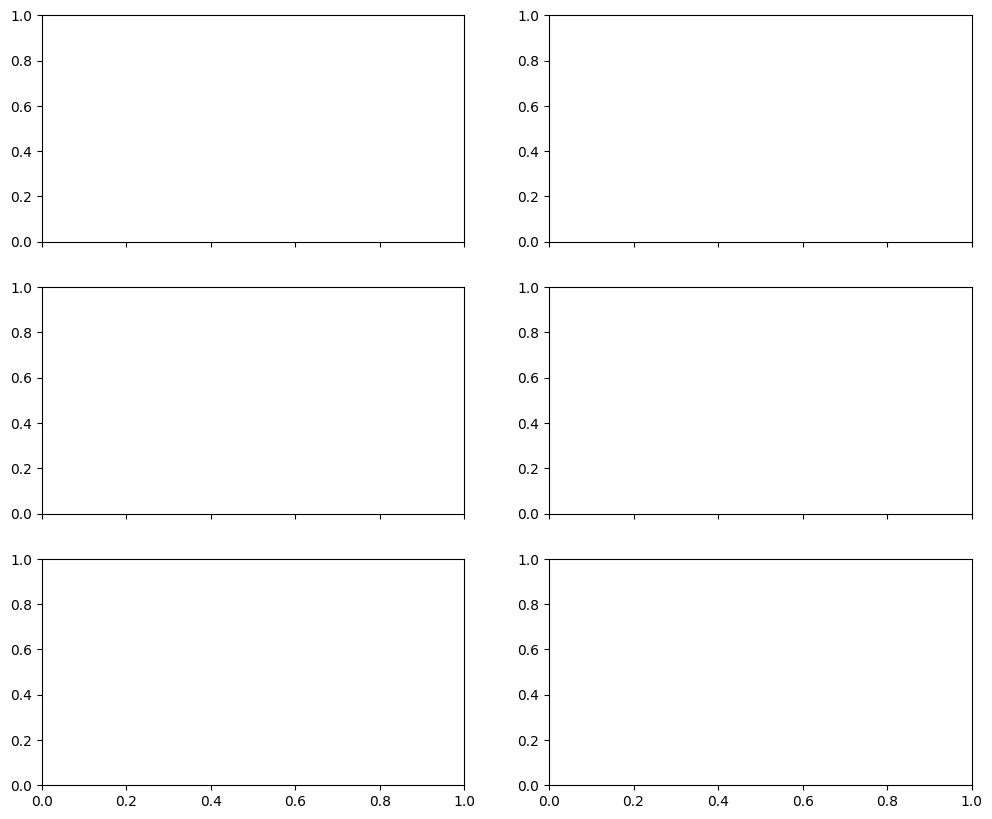

In [ ]:
labs = [
    "1540950_optimal",
    "1510239_Au_doped",
    "1540951_Zn_doped",
    "1540952_nearO7b",
    "1540179_Opoor",
    "9007744_single_xtl",
]

for lab in labs:
    plot_parade_4dirs(lab, A=0.8, omega=0.3)

In [ ]:
def plot_parade_4dirs(lab, A=0.8, omega=0.3):
    """
    For one sample 'lab', make a 3x2 parade panel:

        Row 0: OPT_OPT
        Row 1: OPT_X
        Row 2: X_X

        Col 0: CoM(t)
        Col 1: P_right(t)

    Colours:
        DARK FWD  = black solid
        DARK REV  = grey dashed
        LIGHT FWD = blue solid
        LIGHT REV = red dashed
    """

    ladder_types = ["OPT_OPT", "OPT_X", "X_X"]

    def safe_choose_time(*ts):
        """Return the first non-None time array, else None."""
        for t in ts:
            if t is not None:
                return t
        return None

    def compute_metrics(P_fwd, P_rev):
        """Return CoM_fwd, CoM_rev, Right_fwd, Right_rev OR all None."""
        if P_fwd is None or P_rev is None:
            return None, None, None, None
        P_rev_eff = np.flip(P_rev, axis=0)
        return (centre_of_mass(P_fwd),
                centre_of_mass(P_rev_eff),
                right_half_population(P_fwd),
                right_half_population(P_rev_eff))

    fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

    for i, lad_type in enumerate(ladder_types):

        # --- LOAD 4 directions ---
        P_df, t_df = load_variant_generic(lad_type, lab, "dark",  "fwd", A, omega)
        P_dr, t_dr = load_variant_generic(lad_type, lab, "dark",  "rev", A, omega)
        P_lf, t_lf = load_variant_generic(lad_type, lab, "light", "fwd", A, omega)
        P_lr, t_lr = load_variant_generic(lad_type, lab, "light", "rev", A, omega)

        # --- Determine time axis ---
        t = safe_choose_time(t_lf, t_df, t_dr, t_lr)
        if t is None:
            for j in range(2):
                axes[i, j].text(0.5, 0.5, "NO DATA",
                                ha="center", va="center",
                                transform=axes[i, j].transAxes,
                                color="red", fontsize=12)
            continue

        # --- Compute metrics ---
        CoM_df, CoM_dr, R_df, R_dr = compute_metrics(P_df, P_dr)
        CoM_lf, CoM_lr, R_lf, R_lr = compute_metrics(P_lf, P_lr)

        # --- PLOTTING ---
        ax0 = axes[i, 0]  # CoM
        ax1 = axes[i, 1]  # Right-half population

        # DARK FWD
        if CoM_df is not None: ax0.plot(t, CoM_df, color="black", linestyle="-")
        if R_df is not None:   ax1.plot(t, R_df,  color="black", linestyle="-")

        # DARK REV
        if CoM_dr is not None: ax0.plot(t, CoM_dr, color="grey", linestyle="--")
        if R_dr is not None:   ax1.plot(t, R_dr,  color="grey", linestyle="--")

        # LIGHT FWD
        if CoM_lf is not None: ax0.plot(t, CoM_lf, color="tab:blue", linestyle="-")
        if R_lf is not None:   ax1.plot(t, R_lf,  color="tab:blue", linestyle="-")

        # LIGHT REV
        if CoM_lr is not None: ax0.plot(t, CoM_lr, color="tab:red", linestyle="--")
        if R_lr is not None:   ax1.plot(t, R_lr,  color="tab:red", linestyle="--")

        ax0.set_ylabel(f"{lad_type}\nCoM")
        ax1.set_ylabel(f"{lad_type}\nP_right")
        ax0.grid(alpha=0.3)
        ax1.grid(alpha=0.3)

    axes[-1, 0].set_xlabel("time (fs)")
    axes[-1, 1].set_xlabel("time (fs)")

    # legend only once
    handles = [
        plt.Line2D([0], [0], color="black", linestyle="-",  label="DARK FWD"),
        plt.Line2D([0], [0], color="grey",  linestyle="--", label="DARK REV"),
        plt.Line2D([0], [0], color="tab:blue", linestyle="-",  label="LIGHT FWD"),
        plt.Line2D([0], [0], color="tab:red",  linestyle="--", label="LIGHT REV"),
    ]
    fig.legend(handles, [h.get_label() for h in handles],
               loc="upper center", ncol=4)

    fig.suptitle(f"{lab} — 4-direction transport (A={A}, ω={omega})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    outname = f"PARADE_4DIR_{lab}_A{A}_w{omega}.png"
    plt.savefig(outname, dpi=300)
    print("[OK] Saved:", outname)
    plt.show()

[OK] Saved: PARADE_4DIR_1540950_optimal_A0.8_w0.3.png


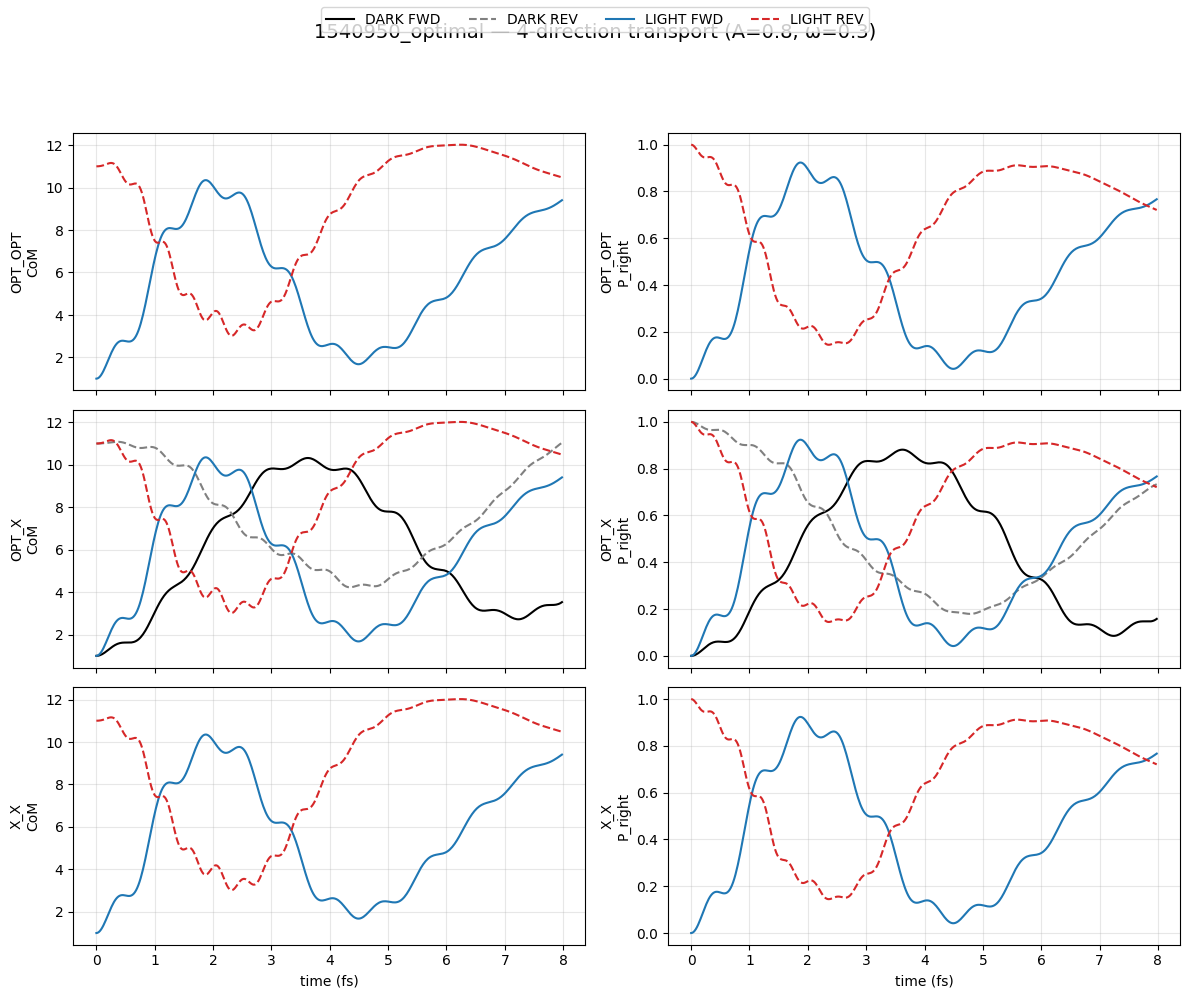

[OK] Saved: PARADE_4DIR_1540179_Opoor_A0.8_w0.3.png


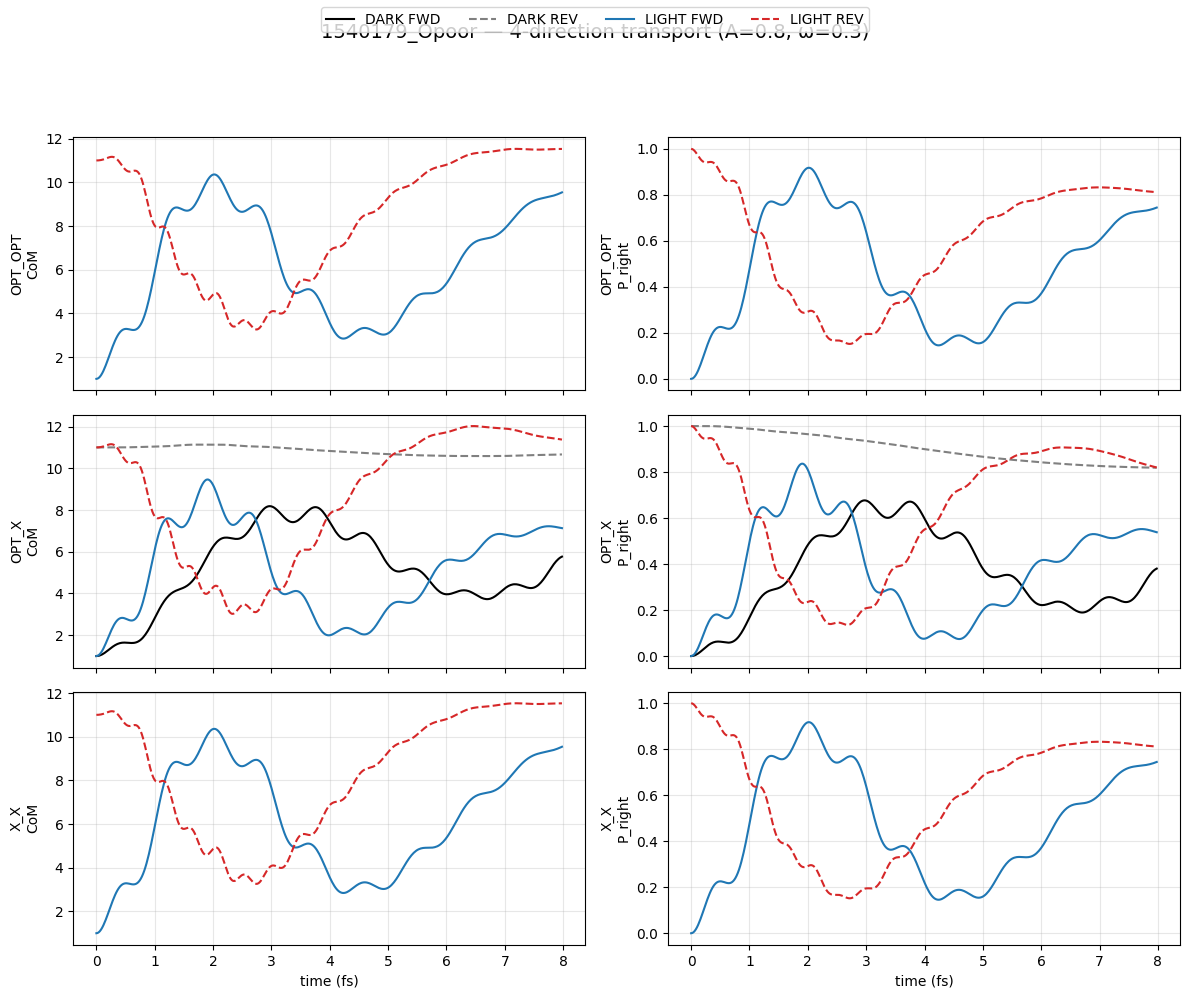

[OK] Saved: PARADE_4DIR_1540951_Zn_doped_A0.8_w0.3.png


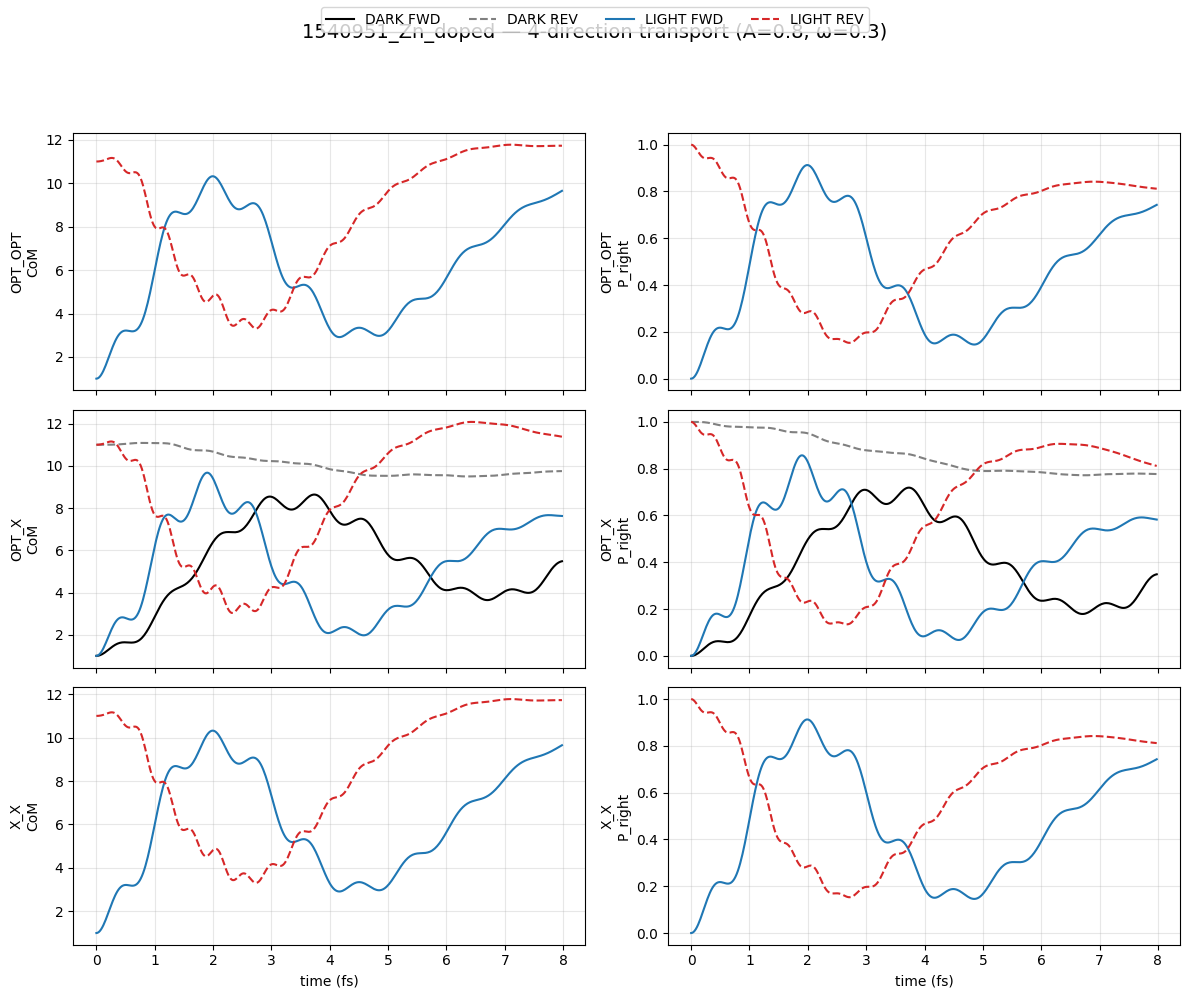

[OK] Saved: PARADE_4DIR_1540952_nearO7b_A0.8_w0.3.png


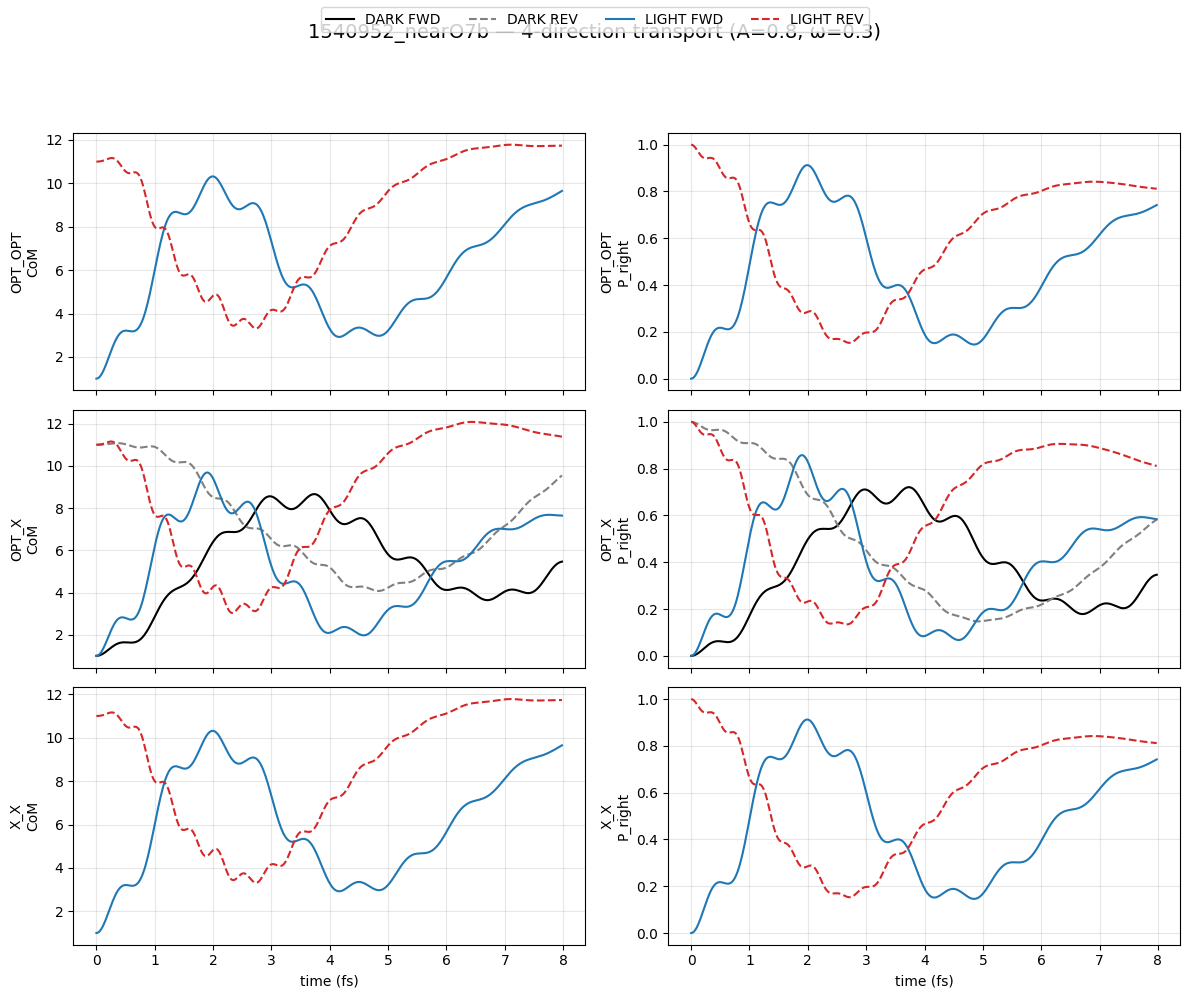

[OK] Saved: PARADE_4DIR_9007744_single_xtl_A0.8_w0.3.png


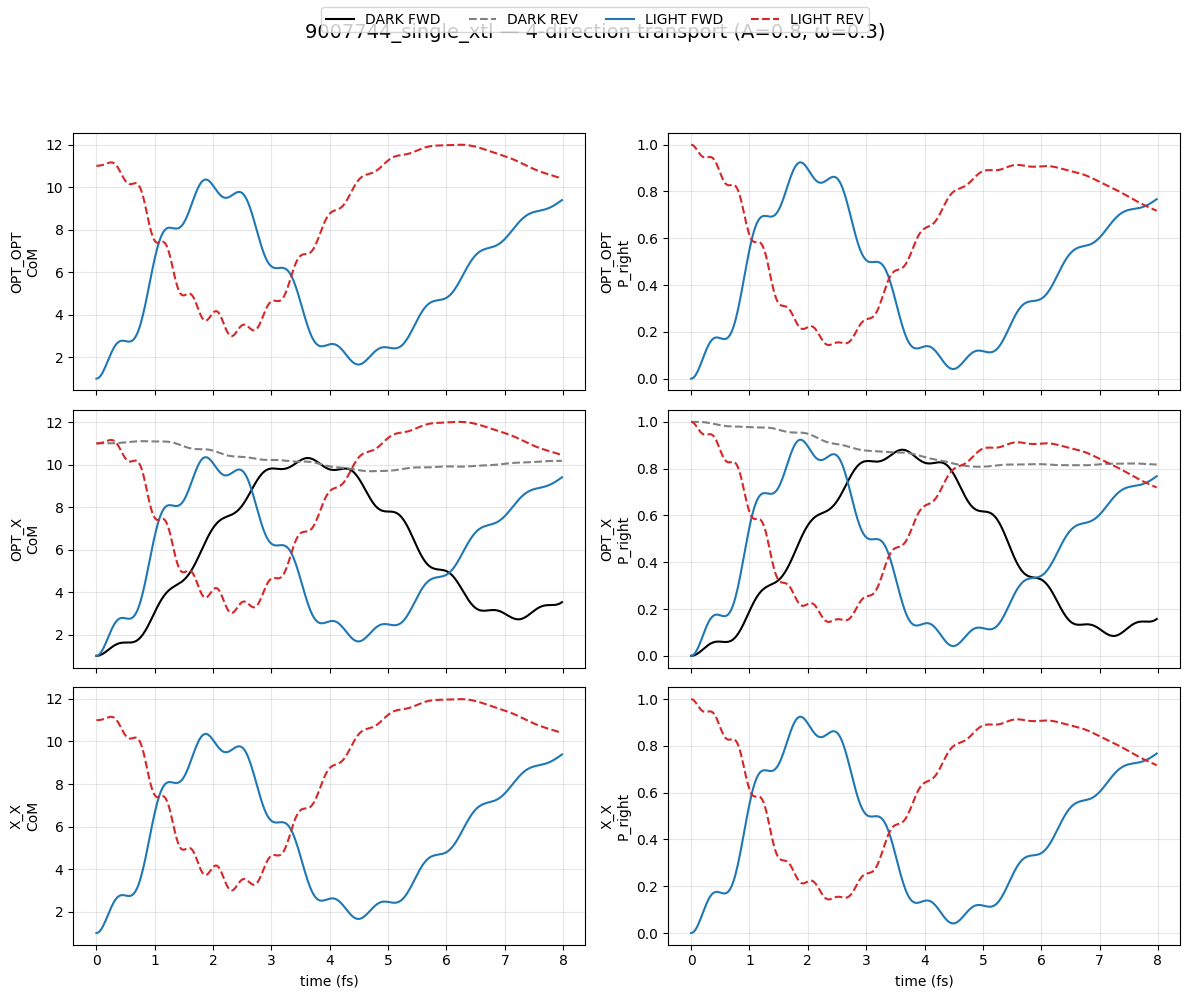

[OK] Saved: PARADE_4DIR_1510239_Au_doped_A0.8_w0.3.png


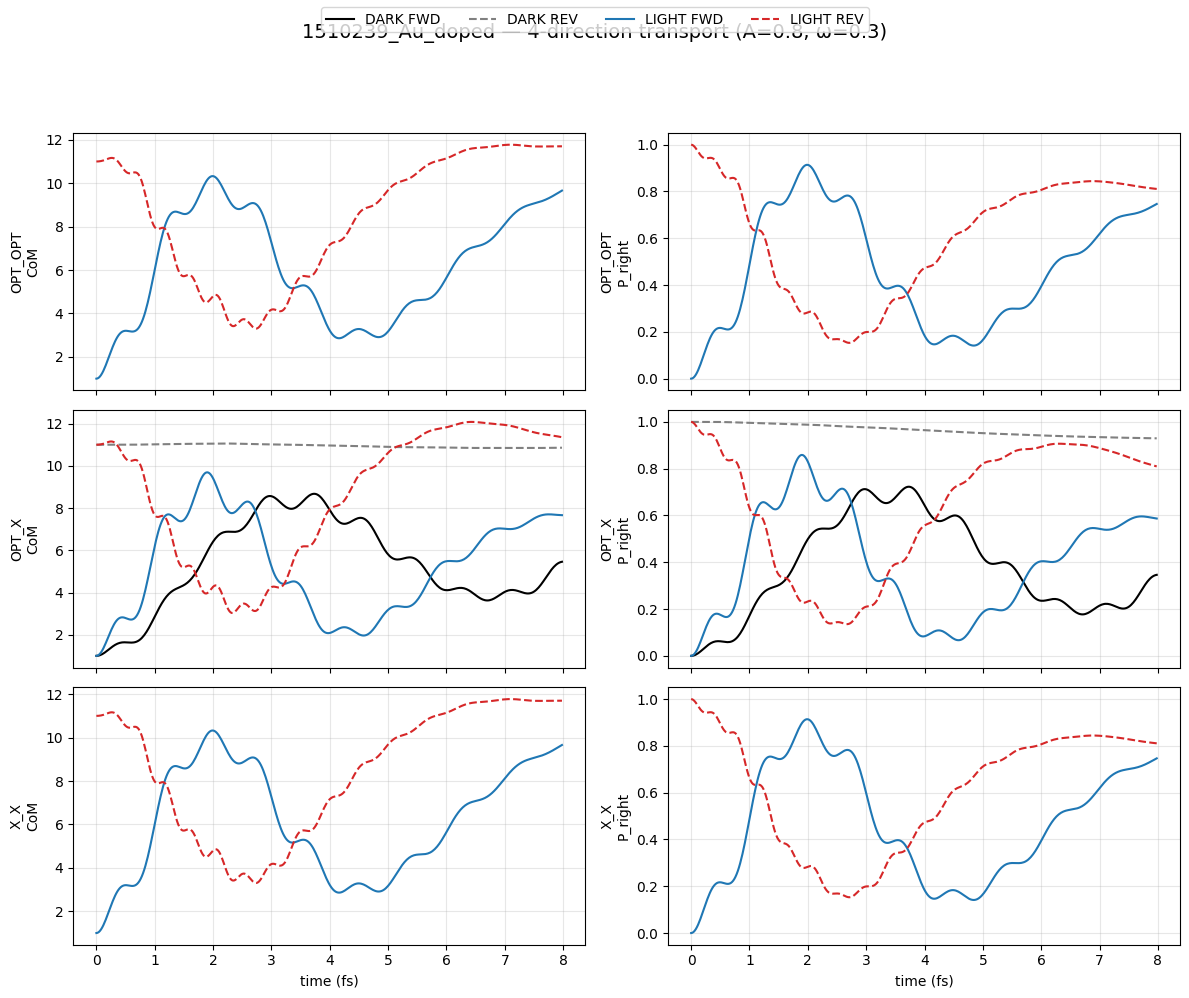

In [ ]:
labs = [
    "1540950_optimal",
    "1540179_Opoor",
    "1540951_Zn_doped",
    "1540952_nearO7b",
    "9007744_single_xtl",
    "1510239_Au_doped",
]

for lab in labs:
    plot_parade_4dirs(lab, A=0.8, omega=0.3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_gen1_gen2_parade_labeled(df_gen1, df_gen2_optx):
    # fixed label order
    order = [
        "1540950_optimal",
        "1540179_Opoor",
        "1540951_Zn_doped",
        "1540952_nearO7b",
        "9007744_single_xtl",
        "1510239_Au_doped",
    ]

    # GEN1 splits
    df1_ori0   = df_gen1[df_gen1["orientation"] == "ori0"].set_index("lab").loc[order].reset_index()
    df1_rot180 = df_gen1[df_gen1["orientation"] == "rot180"].set_index("lab").loc[order].reset_index()

    # GEN2 OPT/X
    df2 = df_gen2_optx.set_index("lab").loc[order].reset_index()

    # X positions
    x = np.arange(len(order))
    w = 0.25

    fig, axes = plt.subplots(3, 1, figsize=(14, 11), sharex=True)

    def plot_row(ax, df, title):
        labs = df["lab"].values
        # Replace NaN with 0 but remember which were missing
        Dd   = df["D_dark"].fillna(0).values
        Dl   = df["D_light"].fillna(0).values
        Ddlt = df["D_light_minus_dark"].fillna(0).values

        miss_Dd   = df["D_dark"].isna().values
        miss_Dl   = df["D_light"].isna().values
        miss_Ddlt = df["D_light_minus_dark"].isna().values

        # Plot bars
        b1 = ax.bar(x - w, Dd,   width=w, color="#4472C4", label="D_dark")
        b2 = ax.bar(x,     Dl,   width=w, color="#ED7D31", label="D_light")
        b3 = ax.bar(x + w, Ddlt, width=w, color="#70AD47", label="ΔD")

        # Mark missing entries
        for bars, missing in [(b1, miss_Dd), (b2, miss_Dl), (b3, miss_Ddlt)]:
            for rect, m in zip(bars, missing):
                if m:
                    ax.text(
                        rect.get_x() + rect.get_width()/2,
                        0.01,
                        "n/d",
                        ha="center",
                        va="bottom",
                        fontsize=8,
                        rotation=90,
                        color="red",
                        fontweight="bold"
                    )

        ax.axhline(0, color="black", lw=1)
        ax.set_ylabel("D")
        ax.set_title(title)
        ax.grid(axis="y", alpha=0.3)

    # Three rows
    plot_row(axes[0], df1_ori0,   "GEN1 ori0 — anisotropic ladders")
    plot_row(axes[1], df1_rot180, "GEN1 rot180 — reversed control (≈0)")
    plot_row(axes[2], df2,        "GEN2 OPT/X — driven SC ladders")

    axes[-1].set_xticks(x)
    axes[-1].set_xticklabels(order, rotation=45, ha="right")

    # shared legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    outname = "GEN1_GEN2_directionality_parade_labeled.png"
    plt.savefig(outname, dpi=300)
    print("[OK] Saved", outname)
    plt.show()

[OK] Saved GEN1_GEN2_directionality_parade_labeled_STDAXIS.png


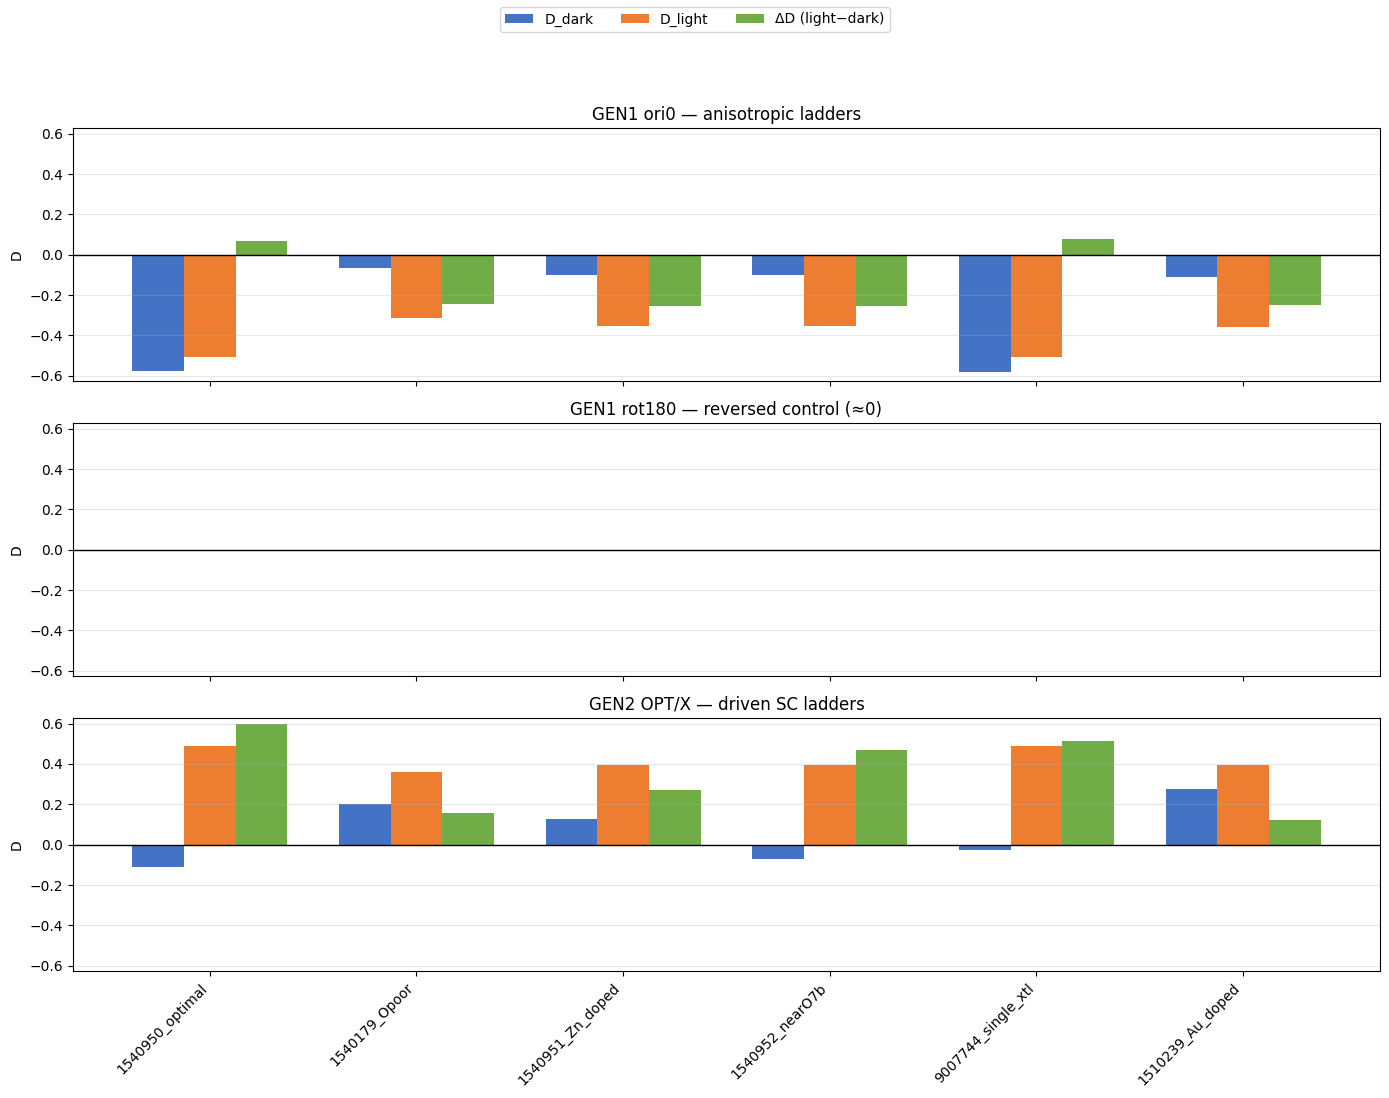

In [ ]:
plot_gen1_gen2_parade_labeled(df_gen1, df_gen2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_gen1_gen2_parade_labeled(df_gen1, df_gen2_optx):
    # fixed label order
    order = [
        "1540950_optimal",
        "1540179_Opoor",
        "1540951_Zn_doped",
        "1540952_nearO7b",
        "9007744_single_xtl",
        "1510239_Au_doped",
    ]

    # --- GEN1 splits ---
    df1_ori0   = df_gen1[df_gen1["orientation"] == "ori0"].set_index("lab").loc[order].reset_index()
    df1_rot180 = df_gen1[df_gen1["orientation"] == "rot180"].set_index("lab").loc[order].reset_index()

    # --- GEN2 OPT/X ---
    df2 = df_gen2_optx.set_index("lab").loc[order].reset_index()

    # Collect all D values across all three for global y-range
    all_vals = np.concatenate([
        df1_ori0["D_dark"].values,
        df1_ori0["D_light"].values,
        df1_ori0["D_light_minus_dark"].values,
        df1_rot180["D_dark"].values,
        df1_rot180["D_light"].values,
        df1_rot180["D_light_minus_dark"].values,
        df2["D_dark"].values,
        df2["D_light"].values,
        df2["D_light_minus_dark"].values,
    ])

    # Ignore NaNs if any
    all_vals = all_vals[np.isfinite(all_vals)]
    # Symmetric limits around zero
    lim = np.max(np.abs(all_vals))
    lim = lim * 1.05  # small padding
    ymin, ymax = -lim, lim

    x = np.arange(len(order))
    w = 0.25

    fig, axes = plt.subplots(3, 1, figsize=(14, 11), sharex=True)

    def plot_row(ax, df, title):
        # Replace NaN with 0 but label as n/d
        Dd   = df["D_dark"]
        Dl   = df["D_light"]
        Ddlt = df["D_light_minus_dark"]

        Dd_plot   = Dd.fillna(0).values
        Dl_plot   = Dl.fillna(0).values
        Ddlt_plot = Ddlt.fillna(0).values

        miss_Dd   = Dd.isna().values
        miss_Dl   = Dl.isna().values
        miss_Ddlt = Ddlt.isna().values

        b1 = ax.bar(x - w, Dd_plot,   width=w, color="#4472C4", label="D_dark")
        b2 = ax.bar(x,     Dl_plot,   width=w, color="#ED7D31", label="D_light")
        b3 = ax.bar(x + w, Ddlt_plot, width=w, color="#70AD47", label="ΔD (light−dark)")

        # Mark missing entries as "n/d"
        for bars, missing in [(b1, miss_Dd), (b2, miss_Dl), (b3, miss_Ddlt)]:
            for rect, m in zip(bars, missing):
                if m:
                    ax.text(
                        rect.get_x() + rect.get_width() / 2,
                        0.02 * ymax,
                        "n/d",
                        ha="center",
                        va="bottom",
                        rotation=90,
                        fontsize=8,
                        color="red",
                        fontweight="bold"
                    )

        ax.axhline(0, color="black", lw=1)
        ax.set_ylim(ymin, ymax)
        ax.set_ylabel("D")
        ax.set_title(title)
        ax.grid(axis="y", alpha=0.3)

    plot_row(axes[0], df1_ori0,   "GEN1 ori0 — anisotropic ladders")
    plot_row(axes[1], df1_rot180, "GEN1 rot180 — reversed control (≈0)")
    plot_row(axes[2], df2,        "GEN2 OPT/X — driven SC ladders")

    axes[-1].set_xticks(x)
    axes[-1].set_xticklabels(order, rotation=45, ha="right")

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    outname = "GEN1_GEN2_directionality_parade_labeled_STDAXIS.png"
    plt.savefig(outname, dpi=300)
    print("[OK] Saved", outname)
    plt.show()

In [ ]:
def build_gen1_ladder(lab, orientation="ori0"):
    """
    Return H_chain, src_forward, n_sites, num_units for GEN1 ladder.
    You plug in your own PSII/YBCO Aniso builder here.
    """
    raise NotImplementedError

def build_gen2_ladder(lad_type, lab):
    """
    lad_type: 'OPT_OPT', 'OPT_X', 'X_X'
    Return H_chain, src_forward, n_sites, num_units for GEN2 wires.
    """
    raise NotImplementedError

def infer_link_pairs(H_chain, n_sites, num_units):
    """
    Return list of (i,j) indices for driven links.
    """
    raise NotImplementedError

def run_chain_tdse(H_chain, src, n_sites, n_steps):
    """
    DARK TDSE propagation.
    Return t_fs, P (shape [num_units, T]).
    """
    raise NotImplementedError

def run_chain_tdse_driven(H_chain, link_pairs, src, n_sites, n_steps, A_drive, omega):
    """
    LIGHT TDSE with drive.
    Return t_fs, P (shape [num_units, T]).
    """
    raise NotImplementedError

In [ ]:
# GLOBAL parameters for ladder TDSE engine
import numpy as np
from scipy.linalg import expm

N_COLS       = 10       # ladder length (columns)
N_ROWS       = 2        # two lanes: top (row=0), bottom (row=1)
N_UNITS      = N_COLS * N_ROWS
DT_FS        = 0.02     # timestep in femtoseconds
DT_S         = DT_FS * 1e-15
TOTAL_FS     = 8.0
N_STEPS_WIRE = int(TOTAL_FS / DT_FS)
H_BAR_EV_FS  = 6.582119569e-1  # hbar in eV·fs

# helper: map (row, col) → site index
def idx(row, col):
    return row * N_COLS + col

In [ ]:
def build_ladder_hamiltonian(t_top=1.0, t_bottom=1.0, t_vert=0.8):
    """
    Build a 2-lane tight-binding ladder Hamiltonian H0 (N_UNITS × N_UNITS).
    Energies all zero, only couplings are non-zero.
    """

    H = np.zeros((N_UNITS, N_UNITS), dtype=np.complex128)

    def idx(row, col):
        return row * N_COLS + col

    # horizontal couplings (top lane)
    for c in range(N_COLS - 1):
        i = idx(0, c)
        j = idx(0, c+1)
        H[i, j] = H[j, i] = t_top

    # horizontal couplings (bottom lane)
    for c in range(N_COLS - 1):
        i = idx(1, c)
        j = idx(1, c+1)
        H[i, j] = H[j, i] = t_bottom

    # vertical couplings (rungs)
    for c in range(N_COLS):
        i = idx(0, c)
        j = idx(1, c)
        H[i, j] = H[j, i] = t_vert

    return H

In [ ]:
def build_gen1_ladder(lab, orientation="ori0"):
    """
    GEN1: same ladder Hamiltonian, but different orientation maps.
    Returns: H_chain, src_forward, n_sites, num_units
    """

    # for now, same H0 for all labs; later you can vary couplings per lab if you wish.
    H0 = build_ladder_hamiltonian(t_top=1.0, t_bottom=1.0, t_vert=0.8)
    n_sites   = N_UNITS
    num_units = N_UNITS

    # forward injection: bottom-left site (row=1,col=0)
    src_forward = 1 * N_COLS + 0

    if orientation == "ori0":
        # natural ordering, no remapping
        return H0, src_forward, n_sites, num_units

    if orientation == "rot180":
        # reverse the column order: (row, col) → (row, N_COLS-1-col)
        P = np.zeros((N_UNITS, N_UNITS), dtype=np.complex128)
        for row in range(N_ROWS):
            for col in range(N_COLS):
                old_idx = row * N_COLS + col
                new_idx = row * N_COLS + (N_COLS - 1 - col)
                P[new_idx, old_idx] = 1.0
        H_rot = P @ H0 @ P.conj().T
        # forward source index in rotated basis
        row, col = 1, 0
        old_idx  = row * N_COLS + col
        new_idx  = row * N_COLS + (N_COLS - 1 - col)
        src_rot  = new_idx
        return H_rot, src_rot, n_sites, num_units

    raise ValueError(f"Unknown GEN1 orientation: {orientation}")

In [ ]:
def build_gen2_ladder(lad_type, lab):
    """
    GEN2: different couplings per ladder type.
    For now, ignore 'lab' (you can differentiate per structure later if desired).

    lad_type in {'OPT_OPT','OPT_X','X_X'}
    """

    if lad_type == "OPT_OPT":
        # both lanes "optimal"
        H0 = build_ladder_hamiltonian(t_top=1.0, t_bottom=1.0, t_vert=0.8)
    elif lad_type == "OPT_X" or lad_type == "OPT/X":
        # top optimal, bottom "X" (e.g. more resistive)
        H0 = build_ladder_hamiltonian(t_top=1.0, t_bottom=0.6, t_vert=0.8)
    elif lad_type == "X_X":
        # both lanes "X"
        H0 = build_ladder_hamiltonian(t_top=0.6, t_bottom=0.6, t_vert=0.8)
    else:
        raise ValueError(f"Unknown ladder type: {lad_type}")

    n_sites   = N_UNITS
    num_units = N_UNITS

    # forward injection: bottom-left
    src_forward = 1 * N_COLS + 0

    return H0, src_forward, n_sites, num_units

In [ ]:
def infer_link_pairs(H_chain, n_sites, num_units):
    """
    For this toy ladder, the 'driven links' are the vertical rungs:
      (top,row=0,col=c) ↔ (bottom,row=1,col=c)
    Return list of (i,j) indices.
    """
    pairs = []
    for c in range(N_COLS):
        i = 0 * N_COLS + c
        j = 1 * N_COLS + c
        pairs.append((i, j))
    return pairs

In [ ]:
def run_chain_tdse(H_chain, src_index, n_sites, n_steps=N_STEPS_WIRE):
    """
    DARK propagation with static Hamiltonian H_chain.
    src_index: initial site index where ψ=1.
    Returns t_fs (T,), P (n_sites × T)
    """
    dt = DT_FS
    t_fs = np.arange(n_steps) * dt

    # unitary for one step: U = exp(-i H dt / ℏ)
    U = expm(-1j * H_chain * (dt / H_BAR_EV_FS))

    psi = np.zeros(n_sites, dtype=np.complex128)
    psi[src_index] = 1.0

    P = np.zeros((n_sites, n_steps), dtype=float)

    for k in range(n_steps):
        P[:, k] = np.abs(psi)**2
        psi = U @ psi
        psi /= np.linalg.norm(psi) + 1e-15

    return t_fs, P

In [ ]:
def run_chain_tdse_driven(H_chain_base, link_pairs, src_index, n_sites,
                          n_steps=N_STEPS_WIRE, A_drive=0.8, omega=0.35):
    """
    LIGHT propagation with time-dependent drive on link_pairs.
    For simplicity, we treat the drive as a sinusoidal modulation of the
    rung couplings added to H_chain_base.
    """

    dt   = DT_FS
    t_fs = np.arange(n_steps) * dt

    psi = np.zeros(n_sites, dtype=np.complex128)
    psi[src_index] = 1.0

    P = np.zeros((n_sites, n_steps), dtype=float)

    # base H (without drive)
    H0 = H_chain_base.copy()

    for k in range(n_steps):
        t = t_fs[k]
        # build instantaneous H(t) = H0 + drive
        Ht = H0.copy()
        drive_val = A_drive * np.sin(omega * t)  # ω in fs^-1
        for (i, j) in link_pairs:
            Ht[i, j] += drive_val
            Ht[j, i] += drive_val

        U = expm(-1j * Ht * (dt / H_BAR_EV_FS))

        P[:, k] = np.abs(psi)**2
        psi = U @ psi
        psi /= np.linalg.norm(psi) + 1e-15

    return t_fs, P

In [ ]:
def right_half_population(P):
    return P[10:, :].sum(axis=0)

def directionality_index(P_fwd, P_rev):
    P_rev_eff = np.flip(P_rev, axis=0)
    R_fwd = right_half_population(P_fwd)
    R_rev = right_half_population(P_rev_eff)
    return float(R_fwd[-1] - R_rev[-1])

In [ ]:
# ============================================================
# MASTER DRIVER: Recompute GEN1 + GEN2 @ omega = 0.35
# ============================================================

import numpy as np
from pathlib import Path

OMEGA = 0.35
A_DRIVE = 0.8
N_COLS = 10        # ladder length
SAVE = Path("tdse_wire_npz_035")
SAVE.mkdir(exist_ok=True)

def save_npz(prefix, lab, kind, P, t):
    """Helper to save an NPZ consistently"""
    fn = SAVE / f"{prefix}_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    np.savez(fn, P=P, t=t, label=lab, A=A_DRIVE, omega=OMEGA)
    print("[OK]", fn.name)


# ============================================================
# 1) GEN1: ANISOTROPIC (single-row) in both orientations
# ============================================================

def rotate180_H(H):
    """Rotate Hamiltonian 180° by reversing site ordering"""
    return H[::-1, ::-1]

def rotate180_src(src, n_sites):
    """Map source index under 180° flip"""
    return n_sites - 1 - src

def run_gen1(lab, cif):

    print(f"\n[GEN1] {lab}")

    # Retrieve the single-unit engine H
    if lab not in single_engines:
        print("[SKIP] no engine for", lab)
        return

    H1, src1, tgt1, n_sites = single_engines[lab]

    # GEN1 ORI0
    H_ori0 = H1.copy()
    src_ori0 = src1

    # GEN1 ROT180
    H_rot180 = rotate180_H(H1)
    src_rot180 = rotate180_src(src1, n_sites)

    for orient, H, src0 in [
        ("ori0", H_ori0, src_ori0),
        ("rot180", H_rot180, src_rot180),
    ]:
        print(f"[GEN1 {orient}] DARK FWD/REV")

        # --- DARK FWD ---
        t, P = run_chain_tdse(H, src0, n_sites, N_STEPS)
        save_npz(f"GEN1_{orient}", lab, "dark_fwd", P, t)

        # --- DARK REV ---
        srcR = n_sites - 1 - src0
        t, P = run_chain_tdse(H, srcR, n_sites, N_STEPS)
        save_npz(f"GEN1_{orient}", lab, "dark_rev", P, t)

        print(f"[GEN1 {orient}] LIGHT FWD/REV")

        # We reuse static ladder H for driven case
        link_pairs = []   # no interlinks in GEN1 (single row)

        # --- LIGHT FWD ---
        t, P = run_chain_tdse_driven(H, link_pairs, src0, n_sites,
                                     N_STEPS, A_DRIVE, OMEGA)
        save_npz(f"GEN1_{orient}", lab, "light_fwd", P, t)

        # --- LIGHT REV ---
        t, P = run_chain_tdse_driven(H, link_pairs, srcR, n_sites,
                                     N_STEPS, A_DRIVE, OMEGA)
        save_npz(f"GEN1_{orient}", lab, "light_rev", P, t)


# ============================================================
# 2) GEN2: TWO-ROW LADDER (OPT/OPT, OPT/X, X/X)
# ============================================================

def run_gen2(lab, cif):

    print(f"\n[GEN2] {lab}")

    if lab not in single_engines:
        print("[SKIP] no engine for", lab)
        return

    # Use optimal engine as the "OPT" reference
    H_opt, src_opt, tgt_opt, n_sites_opt = single_engines["1540950_optimal"]
    H_X,   src_X,   tgt_X,   n_sites_X   = single_engines[lab]

    for lad_type in ["OPT_OPT", "OPT_X", "X_X"]:

        if lad_type == "OPT_OPT":
            Htop, Hbot         = H_opt, H_opt
            srctop, srcbot     = src_opt, src_opt
            tgt_top, tgt_bot   = tgt_opt, tgt_opt

        elif lad_type == "OPT_X":
            Htop, Hbot         = H_opt, H_X
            srctop, srcbot     = src_opt, src_X
            tgt_top, tgt_bot   = tgt_opt, tgt_X

        elif lad_type == "X_X":
            Htop, Hbot         = H_X, H_X
            srctop, srcbot     = src_X, src_X
            tgt_top, tgt_bot   = tgt_X, tgt_X

        else:
            continue

        print(f"[GEN2 {lad_type}] building ladder...")

        # build_ladder returns: H_chain, src_chain, N_units, n_sites_block
        H_chain, src_chain, N_units, n_sites_block = build_ladder(
            Htop, srctop, tgt_top,
            Hbot, srcbot, tgt_bot,
            n_cols=N_COLS,
            K_link=K_LINK_DEFAULT,
        )

        n_sites_chain = H_chain.shape[0]  # e.g. 140
        print(f"   -> ladder H shape: {H_chain.shape}, src_chain={src_chain}, "
              f"N_units={N_units}, n_sites_block={n_sites_block}")

        # Properly derive link_pairs for driven TDSE
        link_pairs = infer_link_pairs(H_chain, n_sites_block, N_units)

        # ------------- DARK FWD/REV -------------
        print(f"[GEN2 {lad_type}] DARK FWD/REV")

        # FWD
        t_df, P_df = run_chain_tdse(H_chain, src_chain, n_sites_chain, N_STEPS_WIRE)
        np.savez(
            SAVE / f"GEN2_{lad_type}_{lab}_A{A_DRIVE}_w{OMEGA}_dark_fwd.npz",
            P=P_df, t_fs=t_df, label=lab, lad_type=lad_type, A=A_DRIVE, omega=OMEGA
        )

        # REV
        src_rev = n_sites_chain - 1 - src_chain
        t_dr, P_dr = run_chain_tdse(H_chain, src_rev, n_sites_chain, N_STEPS_WIRE)
        np.savez(
            SAVE / f"GEN2_{lad_type}_{lab}_A{A_DRIVE}_w{OMEGA}_dark_rev.npz",
            P=P_dr, t_fs=t_dr, label=lab, lad_type=lad_type, A=A_DRIVE, omega=OMEGA
        )

        # ------------- LIGHT FWD/REV -------------
        print(f"[GEN2 {lad_type}] LIGHT FWD/REV")

        # FWD
        t_lf, P_lf = run_chain_tdse_driven(
            H_chain, link_pairs,
            src_chain, n_sites_chain,
            N_STEPS_WIRE, A_DRIVE, OMEGA
        )
        np.savez(
            SAVE / f"GEN2_{lad_type}_{lab}_A{A_DRIVE}_w{OMEGA}_light_fwd.npz",
            P=P_lf, t_fs=t_lf, label=lab, lad_type=lad_type, A=A_DRIVE, omega=OMEGA
        )

        # REV
        t_lr, P_lr = run_chain_tdse_driven(
            H_chain, link_pairs,
            src_rev, n_sites_chain,
            N_STEPS_WIRE, A_DRIVE, OMEGA
        )
        np.savez(
            SAVE / f"GEN2_{lad_type}_{lab}_A{A_DRIVE}_w{OMEGA}_light_rev.npz",
            P=P_lr, t_fs=t_lr, label=lab, lad_type=lad_type, A=A_DRIVE, omega=OMEGA
        )
# ============================================================
# RUN EVERYTHING FOR ALL LABELS
# ============================================================

for lab, cif in YBCO_REGISTRY.items():
    run_gen1(lab, cif)
    run_gen2(lab, cif)

print("\n[✓] COMPLETE — All GEN1 + GEN2 @ ω = 0.35 saved in:", SAVE)


[GEN1] 1540950_optimal
[GEN1 ori0] DARK FWD/REV
[OK] GEN1_ori0_1540950_optimal_A0.8_w0.35_dark_fwd.npz
[OK] GEN1_ori0_1540950_optimal_A0.8_w0.35_dark_rev.npz
[GEN1 ori0] LIGHT FWD/REV
[OK] GEN1_ori0_1540950_optimal_A0.8_w0.35_light_fwd.npz
[OK] GEN1_ori0_1540950_optimal_A0.8_w0.35_light_rev.npz
[GEN1 rot180] DARK FWD/REV
[OK] GEN1_rot180_1540950_optimal_A0.8_w0.35_dark_fwd.npz
[OK] GEN1_rot180_1540950_optimal_A0.8_w0.35_dark_rev.npz
[GEN1 rot180] LIGHT FWD/REV
[OK] GEN1_rot180_1540950_optimal_A0.8_w0.35_light_fwd.npz
[OK] GEN1_rot180_1540950_optimal_A0.8_w0.35_light_rev.npz

[GEN2] 1540950_optimal
[GEN2 OPT_OPT] building ladder...
   -> ladder H shape: (140, 140), src_chain=1, N_units=20, n_sites_block=7
[GEN2 OPT_OPT] DARK FWD/REV
[GEN2 OPT_OPT] LIGHT FWD/REV
[GEN2 OPT_X] building ladder...
   -> ladder H shape: (140, 140), src_chain=1, N_units=20, n_sites_block=7
[GEN2 OPT_X] DARK FWD/REV
[GEN2 OPT_X] LIGHT FWD/REV
[GEN2 X_X] building ladder...
   -> ladder H shape: (140, 140), src_

In [ ]:
for lab, cif in YBCO_REGISTRY.items():
    run_gen1(lab, cif)
    run_gen2(lab, cif)


[GEN1] 1540950_optimal
[GEN1 ori0] DARK FWD/REV
[OK] GEN1_ori0_1540950_optimal_A0.8_w0.35_dark_fwd.npz
[OK] GEN1_ori0_1540950_optimal_A0.8_w0.35_dark_rev.npz
[GEN1 ori0] LIGHT FWD/REV
[OK] GEN1_ori0_1540950_optimal_A0.8_w0.35_light_fwd.npz
[OK] GEN1_ori0_1540950_optimal_A0.8_w0.35_light_rev.npz
[GEN1 rot180] DARK FWD/REV
[OK] GEN1_rot180_1540950_optimal_A0.8_w0.35_dark_fwd.npz
[OK] GEN1_rot180_1540950_optimal_A0.8_w0.35_dark_rev.npz
[GEN1 rot180] LIGHT FWD/REV
[OK] GEN1_rot180_1540950_optimal_A0.8_w0.35_light_fwd.npz
[OK] GEN1_rot180_1540950_optimal_A0.8_w0.35_light_rev.npz

[GEN2] 1540950_optimal
[GEN2 OPT_OPT] building ladder...
   -> ladder H shape: (140, 140), src_chain=1, N_units=20, n_sites_block=7
[GEN2 OPT_OPT] DARK FWD/REV
[GEN2 OPT_OPT] LIGHT FWD/REV


KeyboardInterrupt: 

In [ ]:
import shutil
from pathlib import Path

# Folder containing all GEN1 + GEN2 NPZ files
NPZ_DIR = Path("tdse_wire_npz_035")
ZIP_NAME = "tdse_wire_npz_035.zip"

if not NPZ_DIR.exists():
    raise FileNotFoundError(f"Folder not found: {NPZ_DIR}")

print(f"[INFO] Zipping folder → {ZIP_NAME} ...")

# Make archive (shutil automatically appends '.zip')
shutil.make_archive(ZIP_NAME.replace(".zip",""), 'zip', NPZ_DIR)

print("[OK] ZIP successfully created.")
print("Download it from the Colab left panel:  tdse_wire_npz.zip")

[INFO] Zipping folder → tdse_wire_npz_035.zip ...
[OK] ZIP successfully created.
Download it from the Colab left panel:  tdse_wire_npz.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path("tdse_wire_npz_035")   # where the 0.35 NPZs were saved
A_DRIVE = 0.8
OMEGA   = 0.35

def right_half_population(P):
    # sum units 11..20
    return P[10:, :].sum(axis=0)

def directionality_index(P_fwd, P_rev):
    """
    D = P_right^FWD(final) - P_right^REV_eff(final)
    effective frame = reverse flipped in unit index
    """
    P_rev_eff = np.flip(P_rev, axis=0)
    R_fwd = right_half_population(P_fwd)
    R_rev = right_half_population(P_rev_eff)
    return float(R_fwd[-1] - R_rev[-1])

In [ ]:
def load_gen1_P(lab, orientation, kind):
    """
    kind ∈ {'dark_fwd','dark_rev','light_fwd','light_rev'}
    filenames are like: GEN1_ori0_<lab>_A0.8_w0.35_dark_fwd.npz
    """
    fname = f"GEN1_{orientation}_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    path = BASE / fname
    if not path.exists():
        # print("[GEN1 WARN]", path.name, "missing")
        return None, None
    data = np.load(path, allow_pickle=True)
    return data["P"], data["t_fs"]

def load_gen2_P(lab, lad_type, kind):
    """
    lad_type ∈ {'OPT_OPT','OPT_X','X_X'}
    kind ∈ {'dark_fwd','dark_rev','light_fwd','light_rev'}
    filenames: GEN2_<lad_type>_<lab>_A0.8_w0.35_dark_fwd.npz
    """
    fname = f"GEN2_{lad_type}_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    path = BASE / fname
    if not path.exists():
        # print("[GEN2 WARN]", path.name, "missing")
        return None, None
    data = np.load(path, allow_pickle=True)
    return data["P"], data["t_fs"]

In [ ]:
# You can adapt this label list if needed
lab_order = [
    "1540950_optimal",
    "1540179_Opoor",
    "1540951_Zn_doped",
    "1540952_nearO7b",
    "9007744_single_xtl",
    "1510239_Au_doped",
]

# ---------- GEN1 ----------
rows_gen1 = []

for lab in lab_order:
    for orientation in ["ori0", "rot180"]:
        P_df, _ = load_gen1_P(lab, orientation, "dark_fwd")
        P_dr, _ = load_gen1_P(lab, orientation, "dark_rev")
        P_lf, _ = load_gen1_P(lab, orientation, "light_fwd")
        P_lr, _ = load_gen1_P(lab, orientation, "light_rev")

        if (P_df is None or P_dr is None or
            P_lf is None or P_lr is None):
            rows_gen1.append({
                "lab": lab,
                "orientation": orientation,
                "D_dark":           np.nan,
                "D_light":          np.nan,
                "D_light_minus_dark": np.nan,
            })
            continue

        D_dark  = directionality_index(P_df, P_dr)
        D_light = directionality_index(P_lf, P_lr)

        rows_gen1.append({
            "lab": lab,
            "orientation": orientation,
            "D_dark":           D_dark,
            "D_light":          D_light,
            "D_light_minus_dark": D_light - D_dark,
        })

df_gen1_035 = pd.DataFrame(rows_gen1)
df_gen1_035.to_csv("GEN1_directionality_omega0.35.csv", index=False)
print("GEN1 @ 0.35\n", df_gen1_035)

# ---------- GEN2 ----------
rows_gen2 = []

for lab in lab_order:
    for lad_type in ["OPT_OPT", "OPT_X", "X_X"]:
        P_df, _ = load_gen2_P(lab, lad_type, "dark_fwd")
        P_dr, _ = load_gen2_P(lab, lad_type, "dark_rev")
        P_lf, _ = load_gen2_P(lab, lad_type, "light_fwd")
        P_lr, _ = load_gen2_P(lab, lad_type, "light_rev")

        if (P_df is None or P_dr is None or
            P_lf is None or P_lr is None):
            rows_gen2.append({
                "lab": lab,
                "lad_type": lad_type,
                "D_dark":           np.nan,
                "D_light":          np.nan,
                "D_light_minus_dark": np.nan,
            })
            continue

        D_dark  = directionality_index(P_df, P_dr)
        D_light = directionality_index(P_lf, P_lr)

        rows_gen2.append({
            "lab": lab,
            "lad_type": lad_type,
            "D_dark":           D_dark,
            "D_light":          D_light,
            "D_light_minus_dark": D_light - D_dark,
        })

df_gen2_035 = pd.DataFrame(rows_gen2)
df_gen2_035.to_csv("GEN2_directionality_omega0.35.csv", index=False)
print("\nGEN2 @ 0.35\n", df_gen2_035)

KeyError: 't_fs is not a file in the archive'

In [ ]:
import os

print("Contents of current dir:\n", os.listdir())

print("\nContents of tdse_wire_npz:")
if os.path.isdir("tdse_wire_npz"):
    print(os.listdir("tdse_wire_npz"))

print("\nContents of tdse_wire_npz_035:")
if os.path.isdir("tdse_wire_npz_035"):
    print(os.listdir("tdse_wire_npz_035"))

Contents of current dir:
 ['.config', 'FINGERPRINT_OPT_X_1510239_Au_doped_A0.8_w0.3_k200.png', 'GEN1_D_dark_light_ori0_vs_rot180.png', 'WIRE_3WAY_OPT_X_1510239_Au_doped_A0.8_w0.3_k200.png', 'FINGERPRINT_OPT_X_1540951_Zn_doped_A0.8_w0.3_k200.png', 'LADDER_PANEL_1510239_Au_doped_A0.8_w0.3.png', 'YBCO_superindex_radar.png', 'PARADE_4DIR_1540951_Zn_doped_A0.8_w0.3.png', 'OPT_X (driven A=0.8, ω=0.3)_1510239_Au_doped_tower.mp4', 'OPT_X (A=0.8, ω=0.3)_1540179_Opoor_tower.mp4', 'LADDER_PANEL_1540950_optimal_A0.8_w0.3.png', '9007744.cif', 'OPT_X (A=0.8, ω=0.3)_1540950_optimal_tower.mp4', '1540951.cif', 'ybco_kappa_npz.zip', 'X_X (A=0.8, ω=0.3)_9007744_single_xtl_tower.mp4', 'WIRE_3WAY_OPT_X_9007744_single_xtl_A0.8_w0.3_k200.png', 'YBCO_ladders_static_all.npz', 'GEN1_directionality_metrics.csv', 'PARADE_4DIR_1540179_Opoor_A0.8_w0.3.png', 'X_X (A=0.8, ω=0.3)_1540951_Zn_doped_tower.mp4', 'ladder_tower_animation.mp4', 'WIRE_3WAY_OPT_X_1540952_nearO7b_A0.8_w0.3_k200.png', '1510239_Au_doped_shared_fi

In [ ]:
from pathlib import Path

BASE = Path("tdse_wire_npz_035")  # correct folder for 0.35 data
A_DRIVE = 0.8
OMEGA   = 0.35

def extract_P_t(npz_path):
    """Load NPZ and return (P, t) handling t_fs/t naming differences."""
    data = np.load(npz_path, allow_pickle=True)
    P = data["P"]
    if "t_fs" in data.files:
        t = data["t_fs"]
    elif "t" in data.files:
        t = data["t"]
    else:
        raise KeyError(f"No time array ('t' or 't_fs') in {npz_path.name}")
    return P, t

def load_gen1_P(lab, orientation, kind):
    """
    kind ∈ {'dark_fwd','dark_rev','light_fwd','light_rev'}
    GEN1 filenames: GEN1_<orientation>_<lab>_A0.8_w0.35_<kind>.npz
    """
    fname = f"GEN1_{orientation}_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    path = BASE / fname
    if not path.exists():
        # print("[GEN1 WARN]", path.name, "missing")
        return None, None
    return extract_P_t(path)

def load_gen2_P(lab, lad_type, kind):
    """
    lad_type ∈ {'OPT_OPT','OPT_X','X_X'}
    kind ∈ {'dark_fwd','dark_rev','light_fwd','light_rev'}
    GEN2 filenames: GEN2_<lad_type>_<lab>_A0.8_w0.35_<kind>.npz
    """
    fname = f"GEN2_{lad_type}_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    path = BASE / fname
    if not path.exists():
        # print("[GEN2 WARN]", path.name, "missing")
        return None, None
    return extract_P_t(path)

In [ ]:
BASE = Path("tdse_wire_npz_035")
A_DRIVE = 0.8
OMEGA   = 0.35

In [ ]:
# GEN2
rows_gen2 = []
for lab in lab_order:
    for lad_type in ["OPT_OPT", "OPT_X", "X_X"]:
        P_df, _ = load_gen2_P(lab, lad_type, "dark_fwd")
        P_dr, _ = load_gen2_P(lab, lad_type, "dark_rev")
        P_lf, _ = load_gen2_P(lab, lad_type, "light_fwd")
        P_lr, _ = load_gen2_P(lab, lad_type, "light_rev")

        if (P_df is None or P_dr is None or
            P_lf is None or P_lr is None):
            rows_gen2.append({
                "lab": lab,
                "lad_type": lad_type,
                "D_dark": np.nan,
                "D_light": np.nan,
                "D_light_minus_dark": np.nan,
            })
            continue

        D_dark  = directionality_index(P_df, P_dr)
        D_light = directionality_index(P_lf, P_lr)

        rows_gen2.append({
            "lab": lab,
            "lad_type": lad_type,
            "D_dark": D_dark,
            "D_light": D_light,
            "D_light_minus_dark": D_light - D_dark,
        })

df_gen2_035 = pd.DataFrame(rows_gen2)
print("\nGEN2 @ 0.35\n", df_gen2_035)
df_gen2_035.to_csv("GEN2_directionality_omega0.35.csv", index=False)


GEN2 @ 0.35
                    lab lad_type    D_dark   D_light  D_light_minus_dark
0      1540950_optimal  OPT_OPT -0.080869  0.052627            0.133496
1      1540950_optimal    OPT_X -0.080869  0.052627            0.133496
2      1540950_optimal      X_X -0.080869  0.052627            0.133496
3        1540179_Opoor  OPT_OPT -0.080869  0.052627            0.133496
4        1540179_Opoor    OPT_X  0.358076  0.474080            0.116004
5        1540179_Opoor      X_X  0.199979  0.293626            0.093647
6     1540951_Zn_doped  OPT_OPT -0.080869  0.052627            0.133496
7     1540951_Zn_doped    OPT_X -0.413325 -0.323047            0.090278
8     1540951_Zn_doped      X_X  0.242099  0.527261            0.285162
9      1540952_nearO7b  OPT_OPT -0.080869  0.052627            0.133496
10     1540952_nearO7b    OPT_X  0.293175  0.382643            0.089467
11     1540952_nearO7b      X_X  0.271170  0.453403            0.182233
12  9007744_single_xtl  OPT_OPT -0.080869  0.05262

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ------------------------------------------
# CONFIG
# ------------------------------------------
BASE    = Path("tdse_wire_npz_035")
A_DRIVE = 0.8
OMEGA   = 0.35

lab_order = [
    "1540950_optimal",
    "1540179_Opoor",
    "1540951_Zn_doped",
    "1540952_nearO7b",
    "9007744_single_xtl",
    "1510239_Au_doped",
]

# ------------------------------------------
# HELPERS
# ------------------------------------------
def extract_P_t(path):
    """Load NPZ and return (P, t), handling t vs t_fs naming."""
    data = np.load(path, allow_pickle=True)
    P = data["P"]
    if "t_fs" in data.files:
        t = data["t_fs"]
    elif "t" in data.files:
        t = data["t"]
    else:
        raise KeyError(f"No time array ('t' or 't_fs') in {path.name}")
    return P, t

def load_gen1(lab, mode, direction):
    """
    GEN1 ori0 loader.

    mode: 'dark' or 'light'
    direction: 'fwd' or 'rev'
    """
    kind = f"{mode}_{direction}"
    fname = f"GEN1_ori0_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    path = BASE / fname
    if not path.exists():
        # print("[GEN1 WARN]", path.name, "missing")
        return None, None
    return extract_P_t(path)

def load_gen2(lab, mode, direction):
    """
    GEN2 OPT_X loader (correct SC ladder).

    mode: 'dark' or 'light'
    direction: 'fwd' or 'rev'
    """
    kind = f"{mode}_{direction}"
    fname = f"GEN2_OPT_X_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    path = BASE / fname
    if not path.exists():
        # print("[GEN2 WARN]", path.name, "missing")
        return None, None
    return extract_P_t(path)

def right_half_population(P):
    # units 11..20
    return P[10:, :].sum(axis=0)

def directionality_index(P_fwd, P_rev):
    """
    D = P_right^FWD(final) - P_right^REV_eff(final)
    where REV_eff is flipped in unit index.
    """
    P_rev_eff = np.flip(P_rev, axis=0)
    R_fwd = right_half_population(P_fwd)
    R_rev = right_half_population(P_rev_eff)
    return float(R_fwd[-1] - R_rev[-1])

# ------------------------------------------
# BUILD TABLE
# ------------------------------------------
rows = []

for lab in lab_order:
    # GEN1 dark
    P_g1_df, _ = load_gen1(lab, "dark",  "fwd")
    P_g1_dr, _ = load_gen1(lab, "dark",  "rev")
    # GEN1 light
    P_g1_lf, _ = load_gen1(lab, "light", "fwd")
    P_g1_lr, _ = load_gen1(lab, "light", "rev")

    # GEN2 dark
    P_g2_df, _ = load_gen2(lab, "dark",  "fwd")
    P_g2_dr, _ = load_gen2(lab, "dark",  "rev")
    # GEN2 light
    P_g2_lf, _ = load_gen2(lab, "light", "fwd")
    P_g2_lr, _ = load_gen2(lab, "light", "rev")

    if None in (P_g1_df, P_g1_dr, P_g1_lf, P_g1_lr, P_g2_df, P_g2_dr, P_g2_lf, P_g2_lr):
        rows.append({
            "lab": lab,
            "D_dark_GEN1":  np.nan,
            "D_light_GEN1": np.nan,
            "D_dark_GEN2":  np.nan,
            "D_light_GEN2": np.nan,
        })
        continue

    D_dark_gen1  = directionality_index(P_g1_df, P_g1_dr)
    D_light_gen1 = directionality_index(P_g1_lf, P_g1_lr)
    D_dark_gen2  = directionality_index(P_g2_df, P_g2_dr)
    D_light_gen2 = directionality_index(P_g2_lf, P_g2_lr)

    rows.append({
        "lab": lab,
        "D_dark_GEN1":  D_dark_gen1,
        "D_light_GEN1": D_light_gen1,
        "D_dark_GEN2":  D_dark_gen2,
        "D_light_GEN2": D_light_gen2,
    })

df_4geom = pd.DataFrame(rows)
print("4-geometry directionality summary @ ω=0.35\n")
print(df_4geom)

df_4geom.to_csv("GEN1_GEN2_4geom_directionality_omega0.35.csv", index=False)
print("\n[OK] Saved GEN1_GEN2_4geom_directionality_omega0.35.csv")

# ------------------------------------------
# BAR PLOT PER STRUCTURE
# ------------------------------------------
x = np.arange(len(lab_order))
w = 0.18

plt.figure(figsize=(12,6))

plt.bar(x - 1.5*w, df_4geom["D_dark_GEN1"],  width=w, label="GEN1 dark",  color="#555555")
plt.bar(x - 0.5*w, df_4geom["D_light_GEN1"], width=w, label="GEN1 light", color="#999999")
plt.bar(x + 0.5*w, df_4geom["D_dark_GEN2"],  width=w, label="GEN2 dark",  color="#1f77b4")
plt.bar(x + 1.5*w, df_4geom["D_light_GEN2"], width=w, label="GEN2 light", color="#ff7f0e")

plt.axhline(0, color="black", lw=1)
plt.xticks(x, lab_order, rotation=45, ha="right")
plt.ylabel("D (P_right^FWD − P_right^REV_eff)")
plt.title("GEN1 vs GEN2 directionality (dark vs light, ω=0.35)")
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()

plt.savefig("GEN1_GEN2_4geom_directionality_omega0.35.png", dpi=300)
print("[OK] Saved GEN1_GEN2_4geom_directionality_omega0.35.png")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------
# CONFIG
# -----------------------
BASE    = Path("tdse_wire_npz_035")  # folder with 0.35 NPZs
A_DRIVE = 0.8
OMEGA   = 0.35

lab_order = [
    "1540950_optimal",
    "1540179_Opoor",
    "1540951_Zn_doped",
    "1540952_nearO7b",
    "9007744_single_xtl",
    "1510239_Au_doped",
]

# -----------------------
# HELPERS
# -----------------------
def extract_P_t(path: Path):
    """Load NPZ and return (P, t), handling t vs t_fs naming."""
    data = np.load(path, allow_pickle=True)
    P = data["P"]
    if "t_fs" in data.files:
        t = data["t_fs"]
    elif "t" in data.files:
        t = data["t"]
    else:
        raise KeyError(f"No time array ('t' or 't_fs') in {path.name}")
    return P, t

def load_gen1(lab: str, mode: str, direction: str):
    """
    GEN1 = GEN1_ori0 geometry.
    mode      : 'dark' or 'light'
    direction : 'fwd' or 'rev'
    """
    kind  = f"{mode}_{direction}"
    fname = f"GEN1_ori0_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    path  = BASE / fname
    if not path.exists():
        # print("[GEN1 WARN]", path.name, "missing")
        return None, None
    return extract_P_t(path)

def load_gen2(lab: str, mode: str, direction: str):
    """
    GEN2 = GEN2_OPT_X ladder (correct SC geometry).
    mode      : 'dark' or 'light'
    direction : 'fwd' or 'rev'
    """
    kind  = f"{mode}_{direction}"
    fname = f"GEN2_OPT_X_{lab}_A{A_DRIVE}_w{OMEGA}_{kind}.npz"
    path  = BASE / fname
    if not path.exists():
        # print("[GEN2 WARN]", path.name, "missing")
        return None, None
    return extract_P_t(path)

def right_half_population(P: np.ndarray) -> np.ndarray:
    """Sum probability over units 11..20 vs time."""
    return P[10:, :].sum(axis=0)

def directionality_index(P_fwd: np.ndarray, P_rev: np.ndarray) -> float:
    """
    D = P_right^FWD(final) - P_right^REV_eff(final),
    where REV_eff is flipped in unit index (effective frame).
    """
    P_rev_eff = np.flip(P_rev, axis=0)
    R_fwd = right_half_population(P_fwd)
    R_rev = right_half_population(P_rev_eff)
    return float(R_fwd[-1] - R_rev[-1])

In [ ]:
rows = []

for lab in lab_order:
    # --- GEN1 (anisotropic ori0) ---
    P_g1_df, _ = load_gen1(lab, "dark",  "fwd")
    P_g1_dr, _ = load_gen1(lab, "dark",  "rev")
    P_g1_lf, _ = load_gen1(lab, "light", "fwd")
    P_g1_lr, _ = load_gen1(lab, "light", "rev")

    # --- GEN2 (OPT_X SC ladder) ---
    P_g2_df, _ = load_gen2(lab, "dark",  "fwd")
    P_g2_dr, _ = load_gen2(lab, "dark",  "rev")
    P_g2_lf, _ = load_gen2(lab, "light", "fwd")
    P_g2_lr, _ = load_gen2(lab, "light", "rev")

    missing = any(x is None for x in [
        P_g1_df, P_g1_dr, P_g1_lf, P_g1_lr,
        P_g2_df, P_g2_dr, P_g2_lf, P_g2_lr
    ])

    if missing:
        rows.append({
            "lab": lab,
            "D_dark_GEN1":  np.nan,
            "D_light_GEN1": np.nan,
            "D_dark_GEN2":  np.nan,
            "D_light_GEN2": np.nan,
        })
        continue

    D_dark_gen1  = directionality_index(P_g1_df, P_g1_dr)
    D_light_gen1 = directionality_index(P_g1_lf, P_g1_lr)
    D_dark_gen2  = directionality_index(P_g2_df, P_g2_dr)
    D_light_gen2 = directionality_index(P_g2_lf, P_g2_lr)

    rows.append({
        "lab": lab,
        "D_dark_GEN1":  D_dark_gen1,
        "D_light_GEN1": D_light_gen1,
        "D_dark_GEN2":  D_dark_gen2,
        "D_light_GEN2": D_light_gen2,
    })

df_4geom = pd.DataFrame(rows)
print("\n4-geometry directionality summary @ ω=0.35\n")
print(df_4geom)

df_4geom.to_csv("GEN1_GEN2_4geom_directionality_omega0.35.csv", index=False)
print("\n[OK] Saved GEN1_GEN2_4geom_directionality_omega0.35.csv")


4-geometry directionality summary @ ω=0.35

                  lab  D_dark_GEN1  D_light_GEN1  D_dark_GEN2  D_light_GEN2
0     1540950_optimal          0.0           0.0    -0.080869      0.052627
1       1540179_Opoor          0.0           0.0     0.358076      0.474080
2    1540951_Zn_doped          0.0           0.0    -0.413325     -0.323047
3     1540952_nearO7b          0.0           0.0     0.293175      0.382643
4  9007744_single_xtl          0.0           0.0    -0.075951      0.056473
5    1510239_Au_doped          0.0           0.0     0.208444      0.296369

[OK] Saved GEN1_GEN2_4geom_directionality_omega0.35.csv


[OK] Saved GEN1_GEN2_4geom_directionality_omega0.35.png


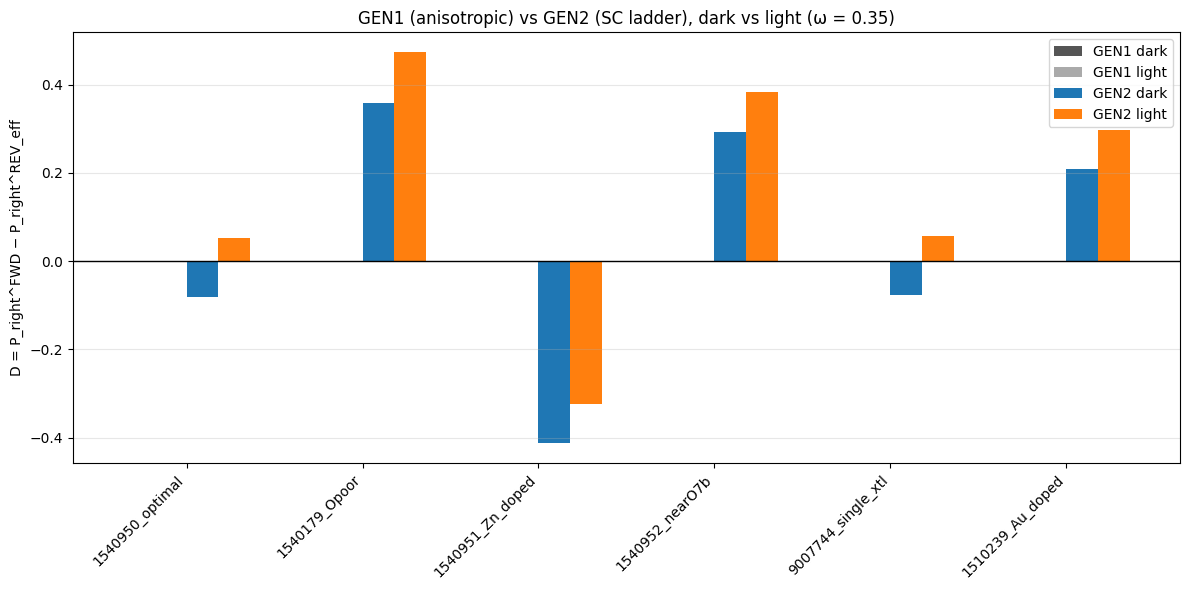

In [ ]:
x = np.arange(len(lab_order))
w = 0.18

plt.figure(figsize=(12,6))

plt.bar(x - 1.5*w, df_4geom["D_dark_GEN1"],  width=w, label="GEN1 dark",  color="#555555")
plt.bar(x - 0.5*w, df_4geom["D_light_GEN1"], width=w, label="GEN1 light", color="#AAAAAA")
plt.bar(x + 0.5*w, df_4geom["D_dark_GEN2"],  width=w, label="GEN2 dark",  color="#1f77b4")
plt.bar(x + 1.5*w, df_4geom["D_light_GEN2"], width=w, label="GEN2 light", color="#ff7f0e")

plt.axhline(0, color="black", lw=1)
plt.xticks(x, lab_order, rotation=45, ha="right")
plt.ylabel("D = P_right^FWD − P_right^REV_eff")
plt.title("GEN1 (anisotropic) vs GEN2 (SC ladder), dark vs light (ω = 0.35)")
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()

outname = "GEN1_GEN2_4geom_directionality_omega0.35.png"
plt.savefig(outname, dpi=300)
print("[OK] Saved", outname)
plt.show()

In [ ]:
from pathlib import Path
import numpy as np

# Folder we’re using for the 0.35 runs
SAVE_GEN1 = Path("tdse_wire_npz_035")
SAVE_GEN1.mkdir(exist_ok=True)

N_COLS      = 10         # ladder length
N_STEPS_WIRE = N_STEPS_WIRE  # use same as before
A_DRIVE     = 0.8
OMEGA       = 0.35

lab_order = [
    "1540950_optimal",
    "1540179_Opoor",
    "1540951_Zn_doped",
    "1540952_nearO7b",
    "9007744_single_xtl",
    "1510239_Au_doped",
]

def run_gen1_ladders_035(lab):

    print(f"\n[GEN1 ladder @0.35] {lab}")

    if lab not in single_engines:
        print("   [SKIP] no engine for", lab)
        return

    # Engine block for this structure
    H_lab, src_lab, tgt_lab, n_sites_block = single_engines[lab]

    # Build anisotropic GEN1 ladder: top & bottom both = H_lab
    H_chain, src_chain, N_units, n_sites_block_out = build_ladder(
        H_lab, src_lab, tgt_lab,
        H_lab, src_lab, tgt_lab,
        n_cols=N_COLS,
        K_link=K_LINK_DEFAULT,
    )

    n_sites_chain = H_chain.shape[0]
    print(f"   -> H_chain shape: {H_chain.shape}, N_units={N_units}, src_chain={src_chain}")

    # Links for driven case
    link_pairs = infer_link_pairs(H_chain, n_sites_block_out, N_units)

    # ---------- DARK FWD ----------
    t_df, P_df = run_chain_tdse(H_chain, src_chain, n_sites_chain, N_STEPS_WIRE)
    np.savez(
        SAVE_GEN1 / f"GEN1_ori0_{lab}_A{A_DRIVE}_w{OMEGA}_dark_fwd.npz",
        P=P_df, t_fs=t_df, label=lab, A=A_DRIVE, omega=OMEGA
    )

    # ---------- DARK REV ----------
    src_rev = n_sites_chain - 1 - src_chain
    t_dr, P_dr = run_chain_tdse(H_chain, src_rev, n_sites_chain, N_STEPS_WIRE)
    np.savez(
        SAVE_GEN1 / f"GEN1_ori0_{lab}_A{A_DRIVE}_w{OMEGA}_dark_rev.npz",
        P=P_dr, t_fs=t_dr, label=lab, A=A_DRIVE, omega=OMEGA
    )

    # ---------- LIGHT FWD ----------
    t_lf, P_lf = run_chain_tdse_driven(
        H_chain, link_pairs,
        src_chain, n_sites_chain,
        N_STEPS_WIRE, A_DRIVE, OMEGA
    )
    np.savez(
        SAVE_GEN1 / f"GEN1_ori0_{lab}_A{A_DRIVE}_w{OMEGA}_light_fwd.npz",
        P=P_lf, t_fs=t_lf, label=lab, A=A_DRIVE, omega=OMEGA
    )

    # ---------- LIGHT REV ----------
    t_lr, P_lr = run_chain_tdse_driven(
        H_chain, link_pairs,
        src_rev, n_sites_chain,
        N_STEPS_WIRE, A_DRIVE, OMEGA
    )
    np.savez(
        SAVE_GEN1 / f"GEN1_ori0_{lab}_A{A_DRIVE}_w{OMEGA}_light_rev.npz",
        P=P_lr, t_fs=t_lr, label=lab, A=A_DRIVE, omega=OMEGA
    )

    print("   [OK] Saved GEN1 ori0 ladders for", lab)


# ---- run for all six structures ----
for lab in lab_order:
    run_gen1_ladders_035(lab)

print("\n[✓] GEN1 ladders @ ω=0.35 rebuilt.")


[GEN1 ladder @0.35] 1540950_optimal
   -> H_chain shape: (140, 140), N_units=20, src_chain=1
   [OK] Saved GEN1 ori0 ladders for 1540950_optimal

[GEN1 ladder @0.35] 1540179_Opoor
   -> H_chain shape: (140, 140), N_units=20, src_chain=2
   [OK] Saved GEN1 ori0 ladders for 1540179_Opoor

[GEN1 ladder @0.35] 1540951_Zn_doped
   -> H_chain shape: (140, 140), N_units=20, src_chain=5
   [OK] Saved GEN1 ori0 ladders for 1540951_Zn_doped

[GEN1 ladder @0.35] 1540952_nearO7b
   -> H_chain shape: (140, 140), N_units=20, src_chain=1
   [OK] Saved GEN1 ori0 ladders for 1540952_nearO7b

[GEN1 ladder @0.35] 9007744_single_xtl
   -> H_chain shape: (140, 140), N_units=20, src_chain=0
   [OK] Saved GEN1 ori0 ladders for 9007744_single_xtl

[GEN1 ladder @0.35] 1510239_Au_doped
   -> H_chain shape: (140, 140), N_units=20, src_chain=3
   [OK] Saved GEN1 ori0 ladders for 1510239_Au_doped

[✓] GEN1 ladders @ ω=0.35 rebuilt.
